In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import pearsonr as pcor
from scipy.stats import fisher_exact
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm

Size of gene sets.

In [3]:
gene_set_sizes=None
for dname in ['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']:
    data=pd.read_csv('../results/genesets/single/csvs/%s.csv' % dname,sep=',',header=0,index_col=0)
    data=pd.DataFrame(data['Set'].value_counts())
    data['Name']=data.index
    data['Database']=dname
    gene_set_sizes=pd.concat([gene_set_sizes,data])

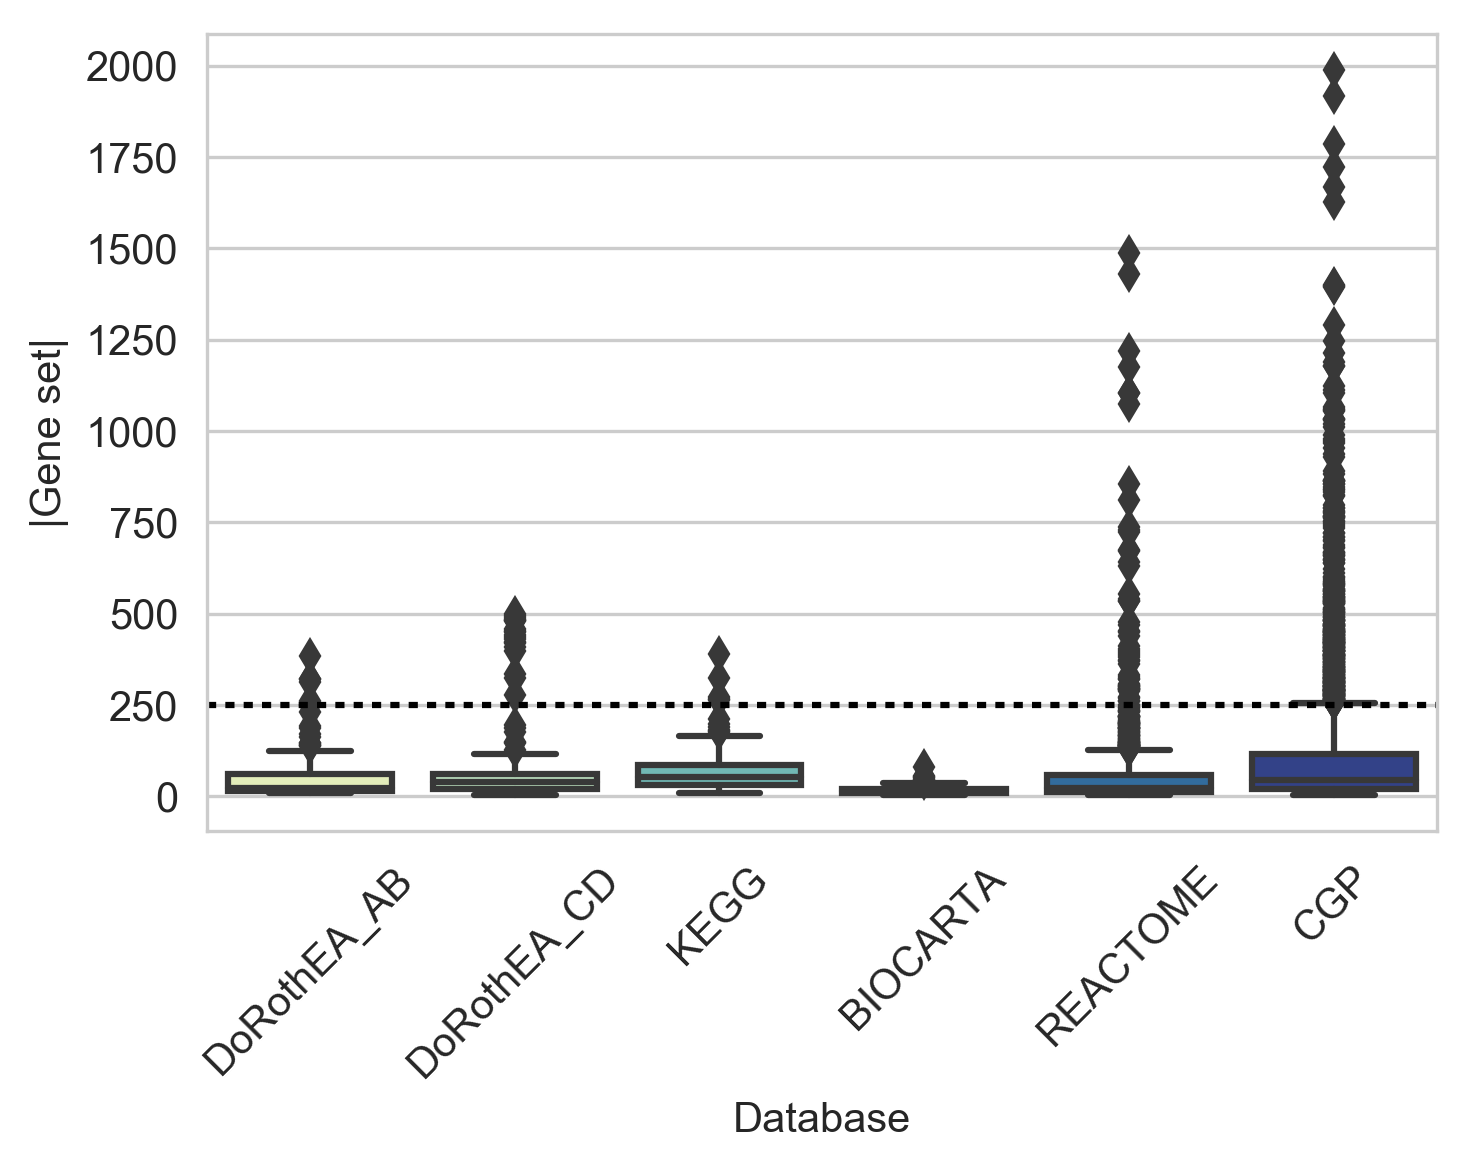

In [4]:
sns.set_palette('YlGnBu',6)
plt.figure(figsize=(5,4),dpi=300)
sns.boxplot(y='Set',x='Database',data=gene_set_sizes)
plt.plot([-0.5,5.5],[250,250],':k')
plt.ylabel('|Gene set|')
plt.xticks(range(6),['DoRothEA_AB','DoRothEA_CD','KEGG','BIOCARTA','REACTOME','CGP'],rotation=45)
plt.tight_layout()
plt.savefig('../figures/raw/SFig1.pdf')

Gene set similarity

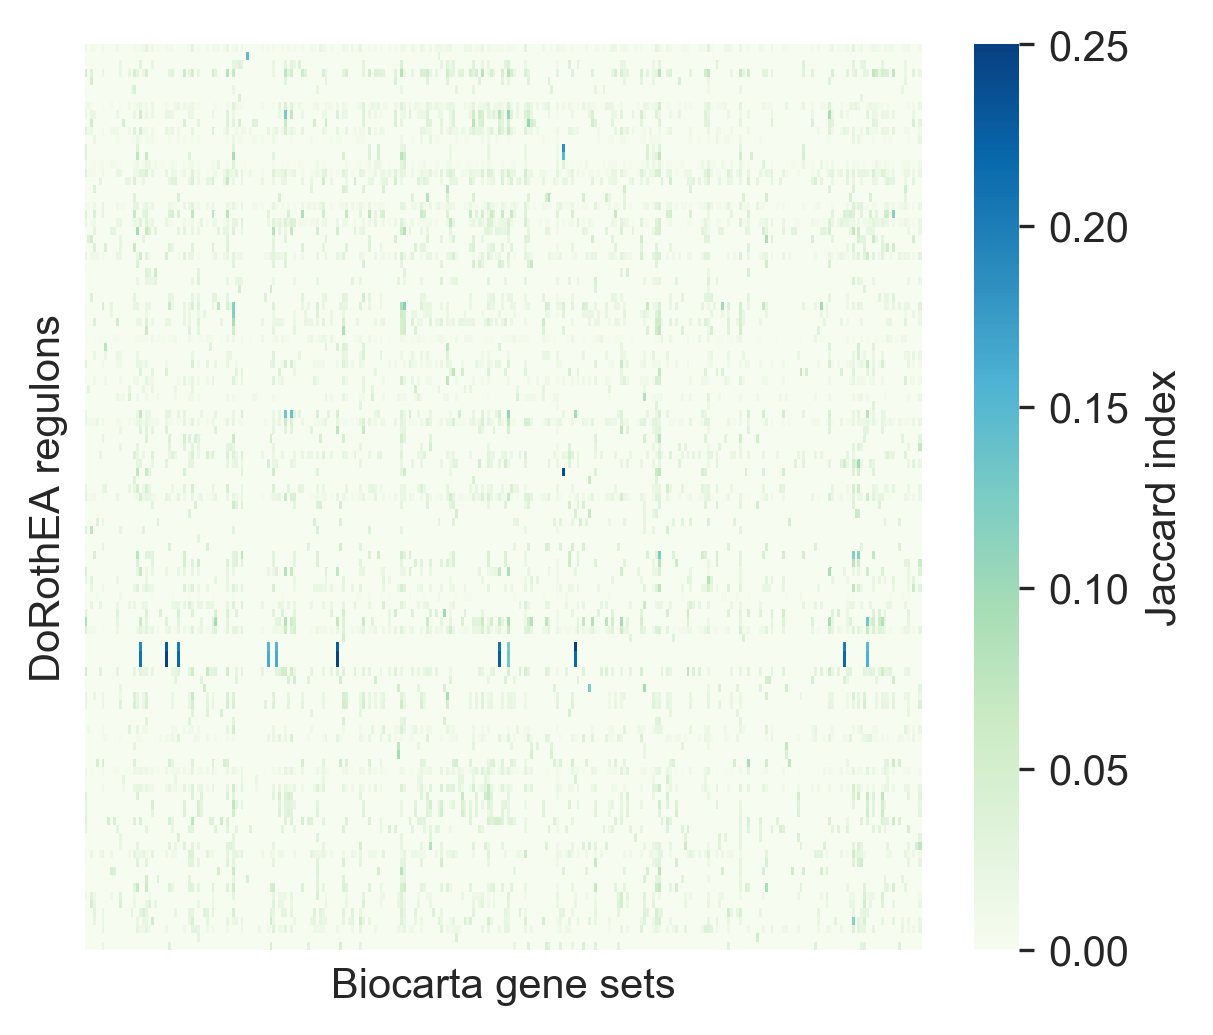

In [5]:
data=pd.read_csv('../results/similarity/BEST_dorothea_AB_filtered_BIOCARTA_filtered_jaccard.csv',
                 sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu',cbar_kws={'label': 'Jaccard index'})
plt.xticks([])
plt.yticks([])
plt.xlabel('Biocarta gene sets')
plt.ylabel('DoRothEA regulons')
plt.savefig('../figures/raw/Fig2A.pdf')

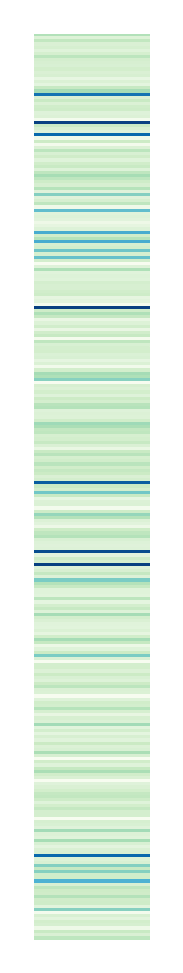

In [6]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai1.pdf')

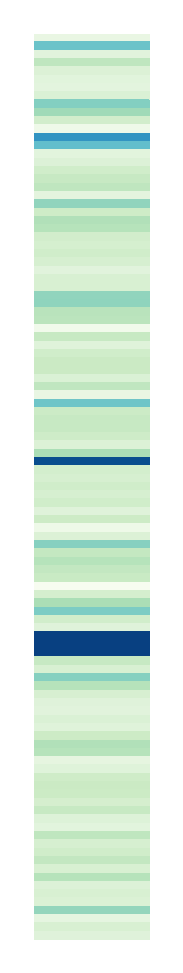

In [7]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig2Ai2.pdf')

Gene set similarity distribution

In [3]:
def make_similarity_distribution(fname,dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=False):
    similarities=pd.DataFrame(columns=['Database','Similarity','Random'])
    for dname2 in ['KEGG','BIOCARTA','REACTOME','CGP']:
        #readl
        data=pd.read_csv('../results/similarity/%s_filtered_%s_filtered_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim1=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim1['Database']=dname2
        max_sim1['Similarity']=data
        max_sim1['Random']='Real'
        similarities=pd.concat([similarities,max_sim1])
        #random
        data=pd.read_csv('../results/similarity/%s_filtered_%s_random_%s.csv' % (dname1,dname2,metric),
                         sep=',',header=0,index_col=0)
        data=data.max(1).values
        max_sim2=pd.DataFrame(index=range(len(data)),columns=similarities.columns)
        max_sim2['Database']=dname2
        max_sim2['Similarity']=data
        max_sim2['Random']='Random'
        similarities=pd.concat([similarities,max_sim2])

        print(dname1,dname2,mwu(max_sim1['Similarity'],max_sim2['Similarity']))
    sns.set_palette('YlGnBu',2)
    plt.figure(figsize=(5,4),dpi=300)
    sns.boxplot(x='Database',y='Similarity',hue='Random',data=similarities,)
    if metric=='jaccard':
        plt.ylabel('Jaccard index')
    else:
        plt.ylabel('Overlap coefficient')
    if force_ylim:
        plt.ylim(0,1.0)
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


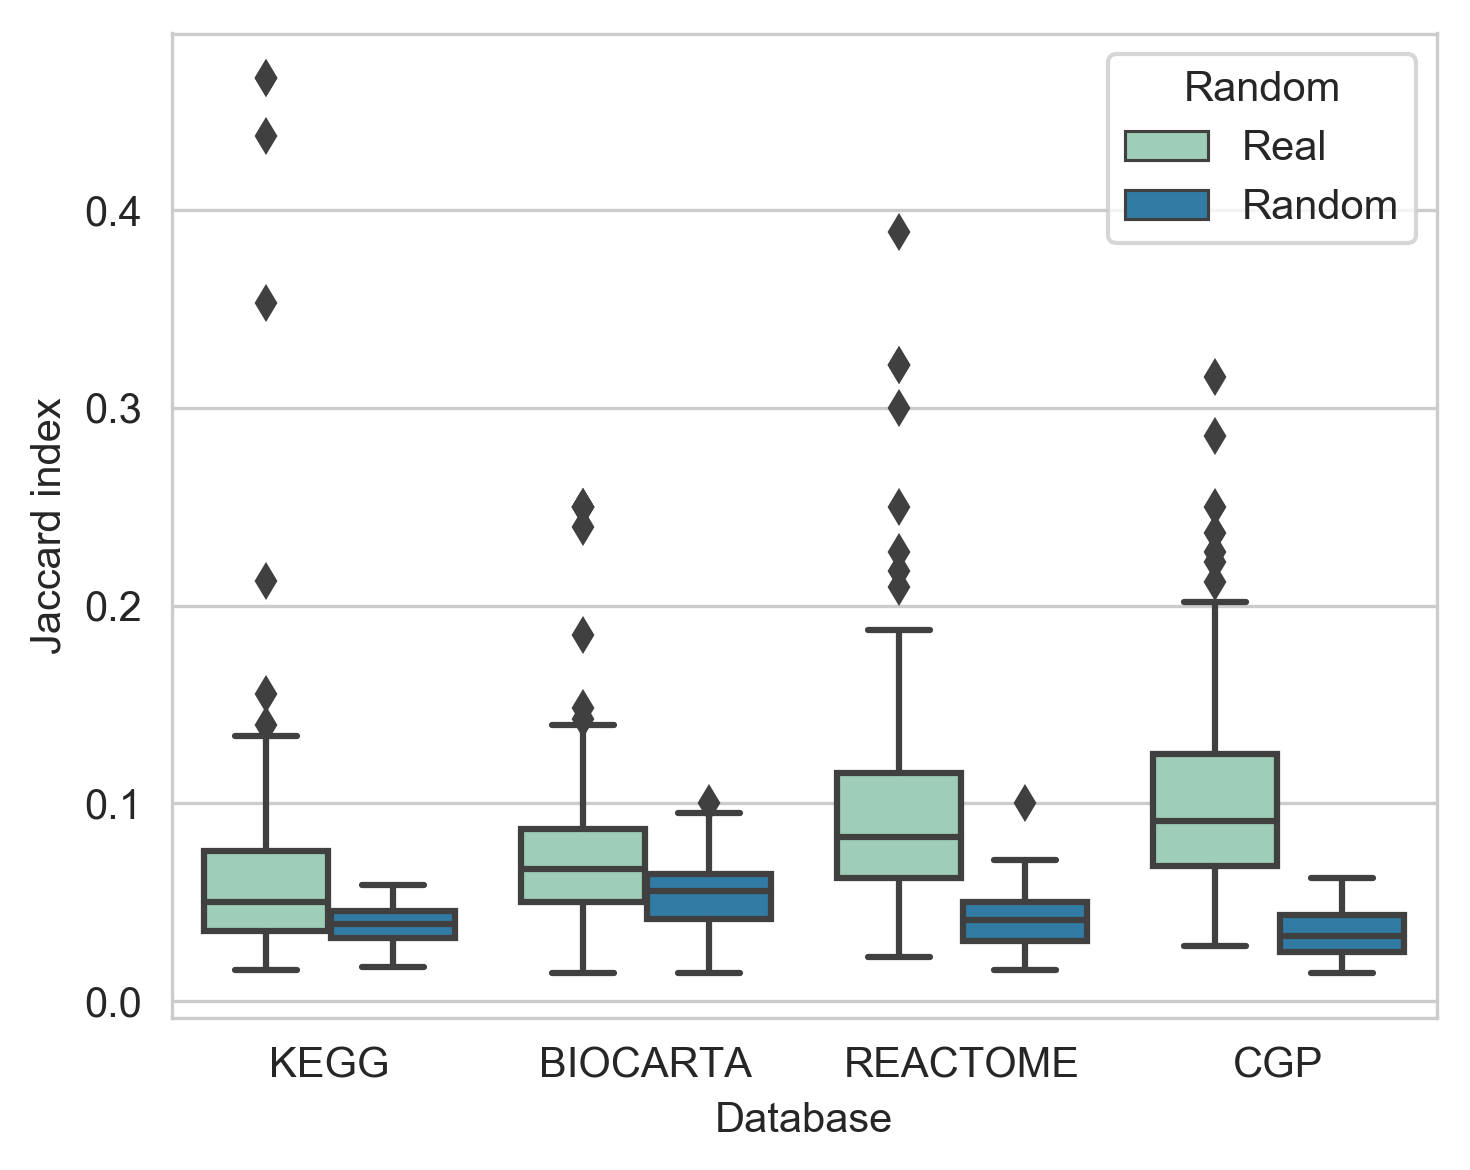

In [10]:
dname1='BEST_dorothea_CD'
metric='jaccard'
make_similarity_distribution('Fig2B.pdf')

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3598.5, pvalue=2.460750501034517e-07)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=3998.5, pvalue=1.5168970331225855e-05)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=1168.5, pvalue=5.959597276020933e-25)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=343.5, pvalue=1.393381537148282e-33)


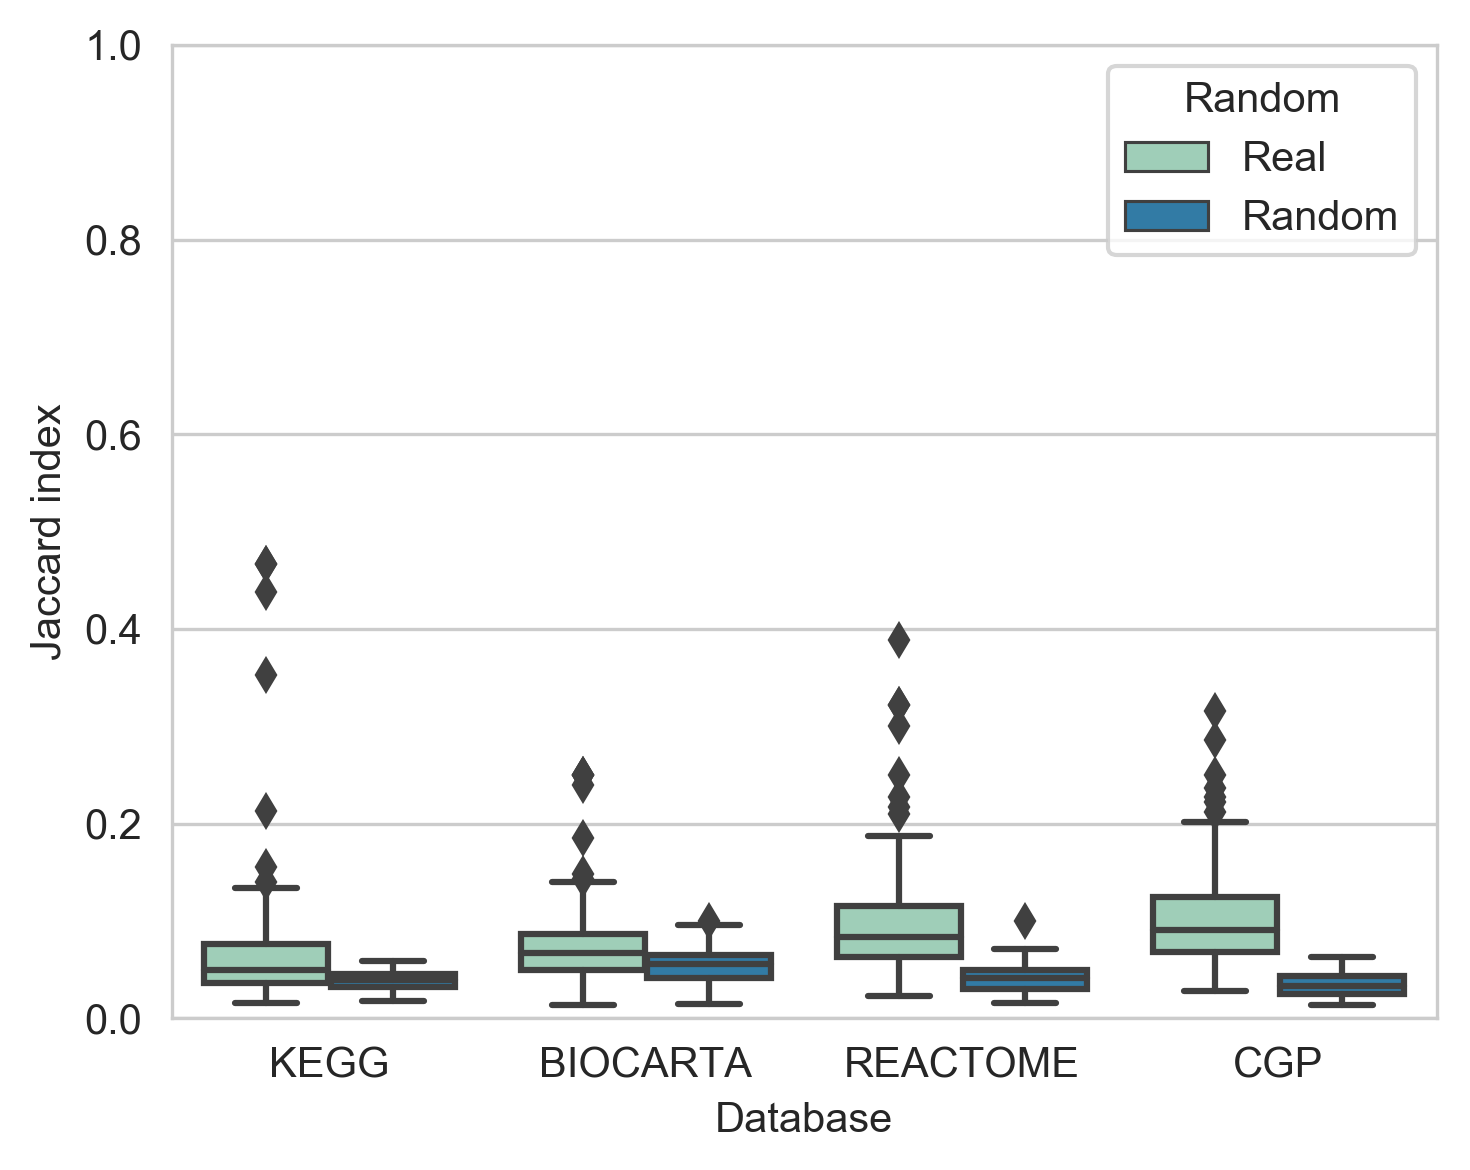

In [71]:
make_similarity_distribution('SFig2A.pdf',dname1='BEST_dorothea_AB',metric='jaccard',force_ylim=True)

BEST_dorothea_AB KEGG MannwhitneyuResult(statistic=3220.0, pvalue=2.5218968221402894e-09)
BEST_dorothea_AB BIOCARTA MannwhitneyuResult(statistic=4997.0, pvalue=0.020534276748425517)
BEST_dorothea_AB REACTOME MannwhitneyuResult(statistic=855.5, pvalue=1.120069377082686e-28)
BEST_dorothea_AB CGP MannwhitneyuResult(statistic=261.5, pvalue=1.315089708967561e-34)


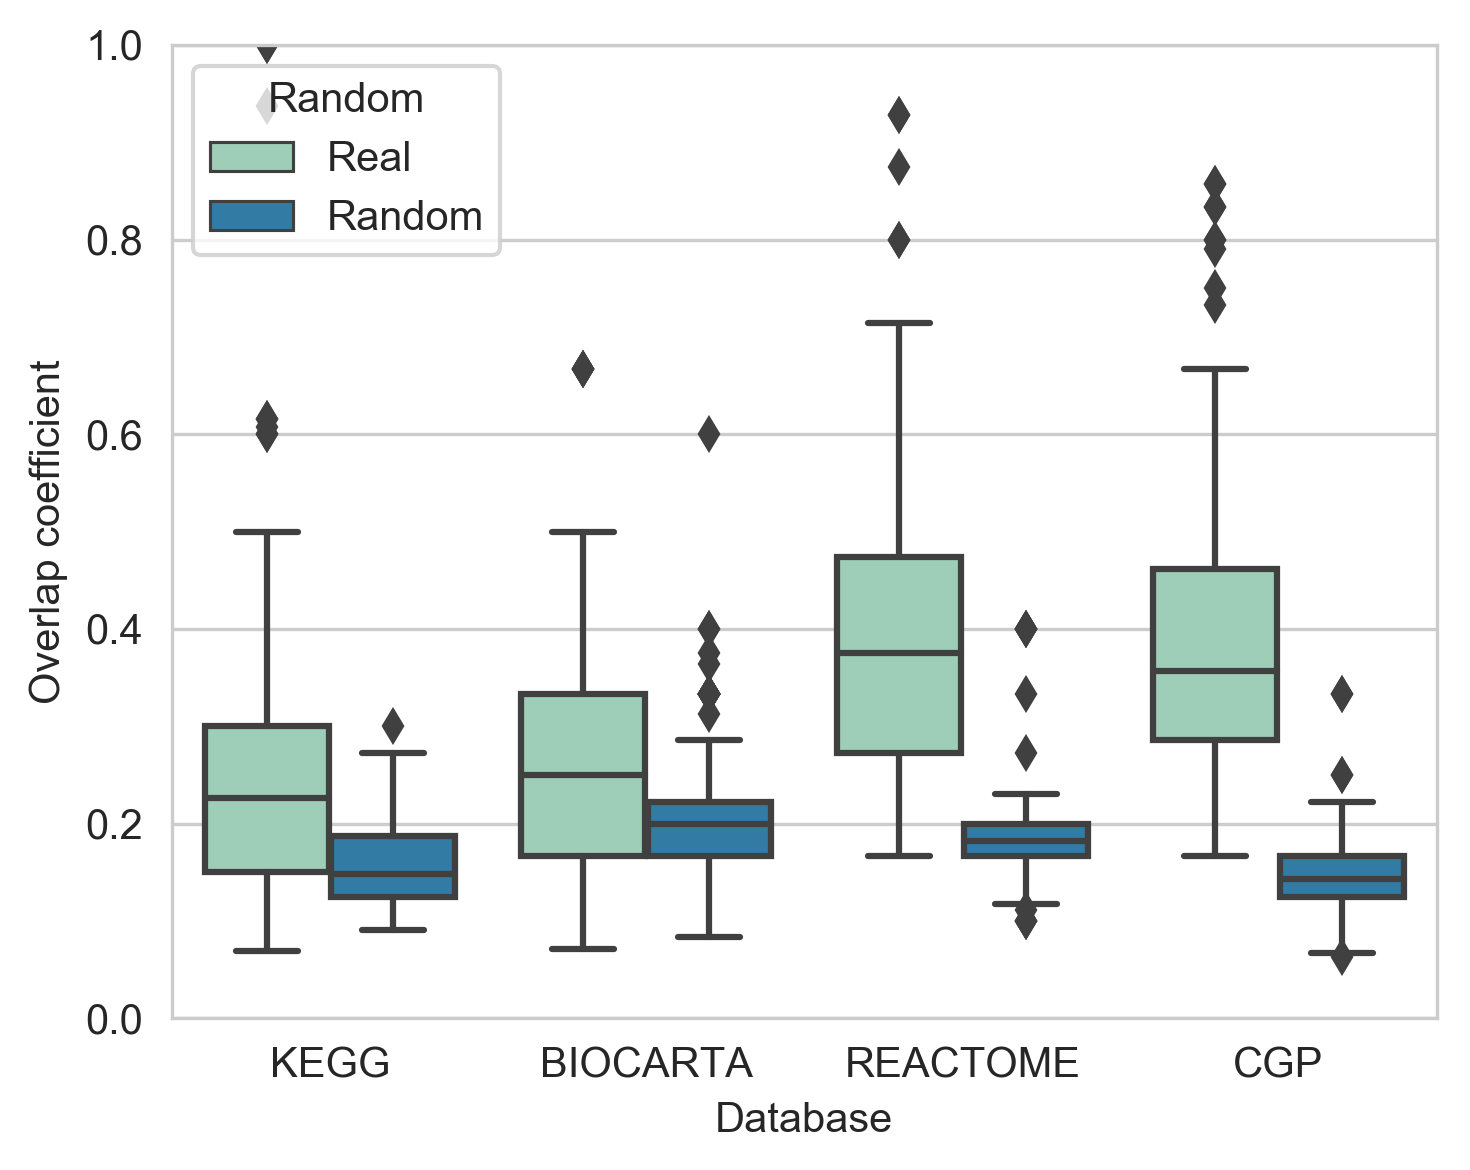

In [72]:
make_similarity_distribution('SFig2B.pdf',dname1='BEST_dorothea_AB',metric='overlap',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=26066.0, pvalue=0.001059444645452985)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=29125.5, pvalue=0.1214983383094177)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=19920.5, pvalue=2.5818771707499164e-12)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9899.0, pvalue=9.348774978947948e-40)


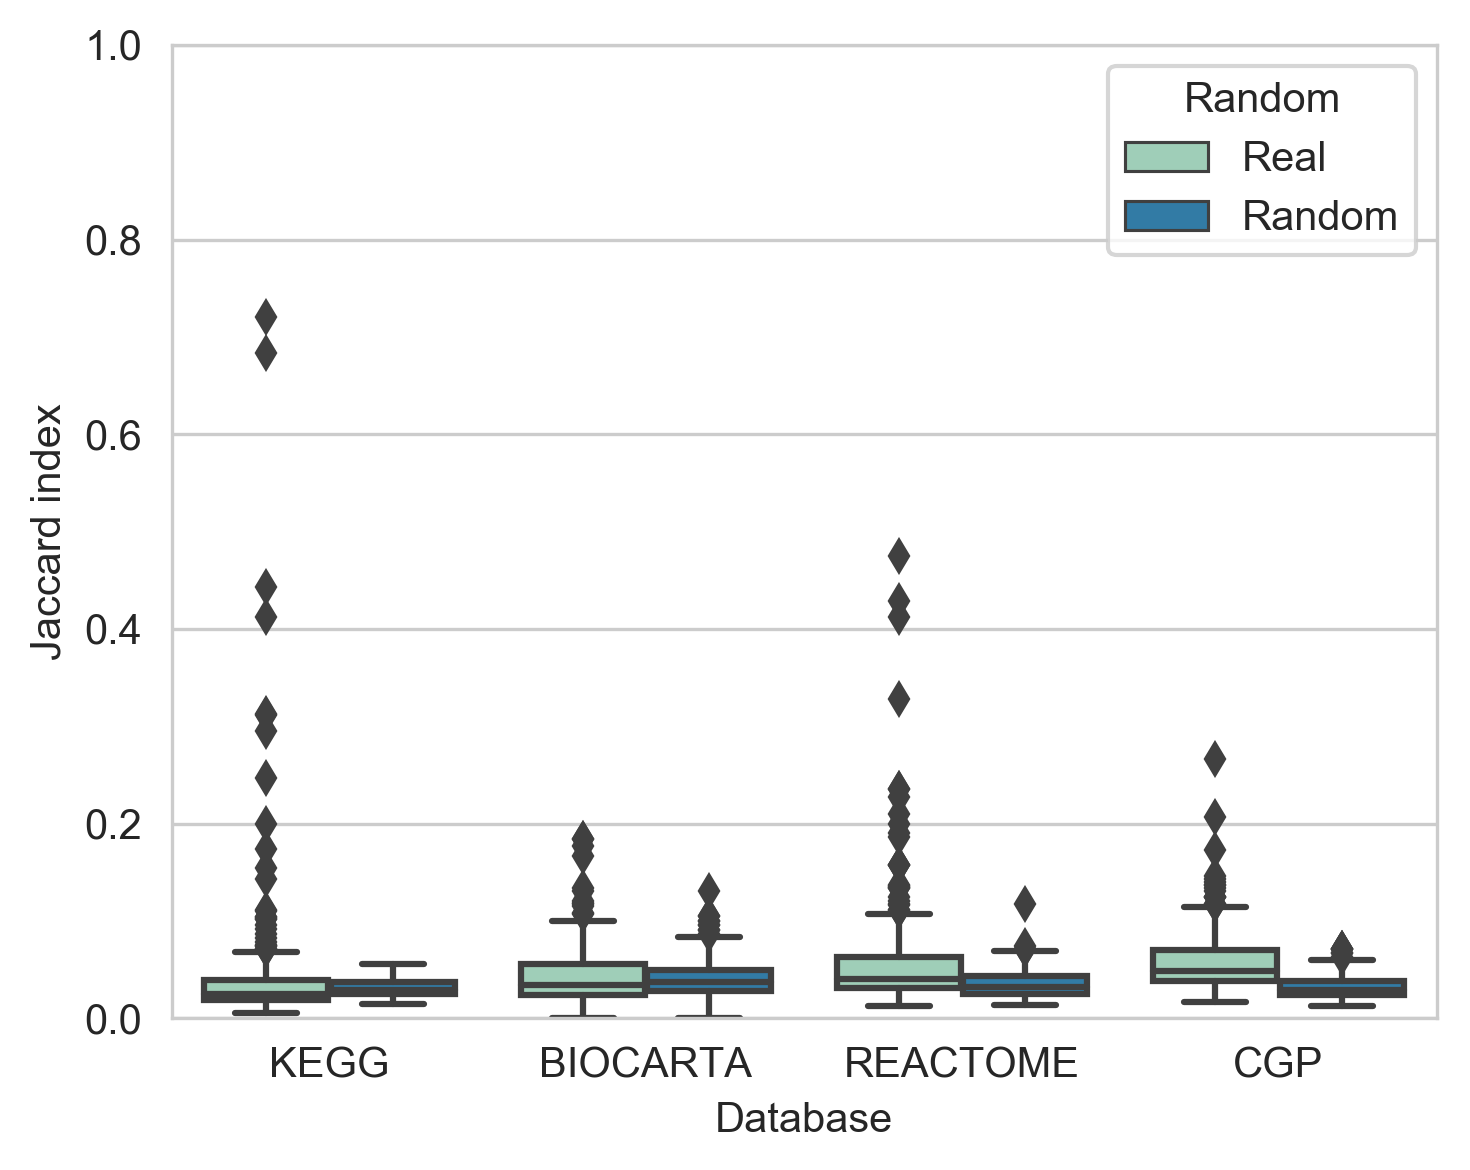

In [73]:
make_similarity_distribution('SFig2C.pdf',dname1='BEST_dorothea_CD',metric='jaccard',force_ylim=True)

BEST_dorothea_CD KEGG MannwhitneyuResult(statistic=25948.0, pvalue=0.0008091049757990906)
BEST_dorothea_CD BIOCARTA MannwhitneyuResult(statistic=28088.5, pvalue=0.03289285384830791)
BEST_dorothea_CD REACTOME MannwhitneyuResult(statistic=16050.0, pvalue=2.331663257730446e-23)
BEST_dorothea_CD CGP MannwhitneyuResult(statistic=9247.5, pvalue=5.14375156094892e-43)


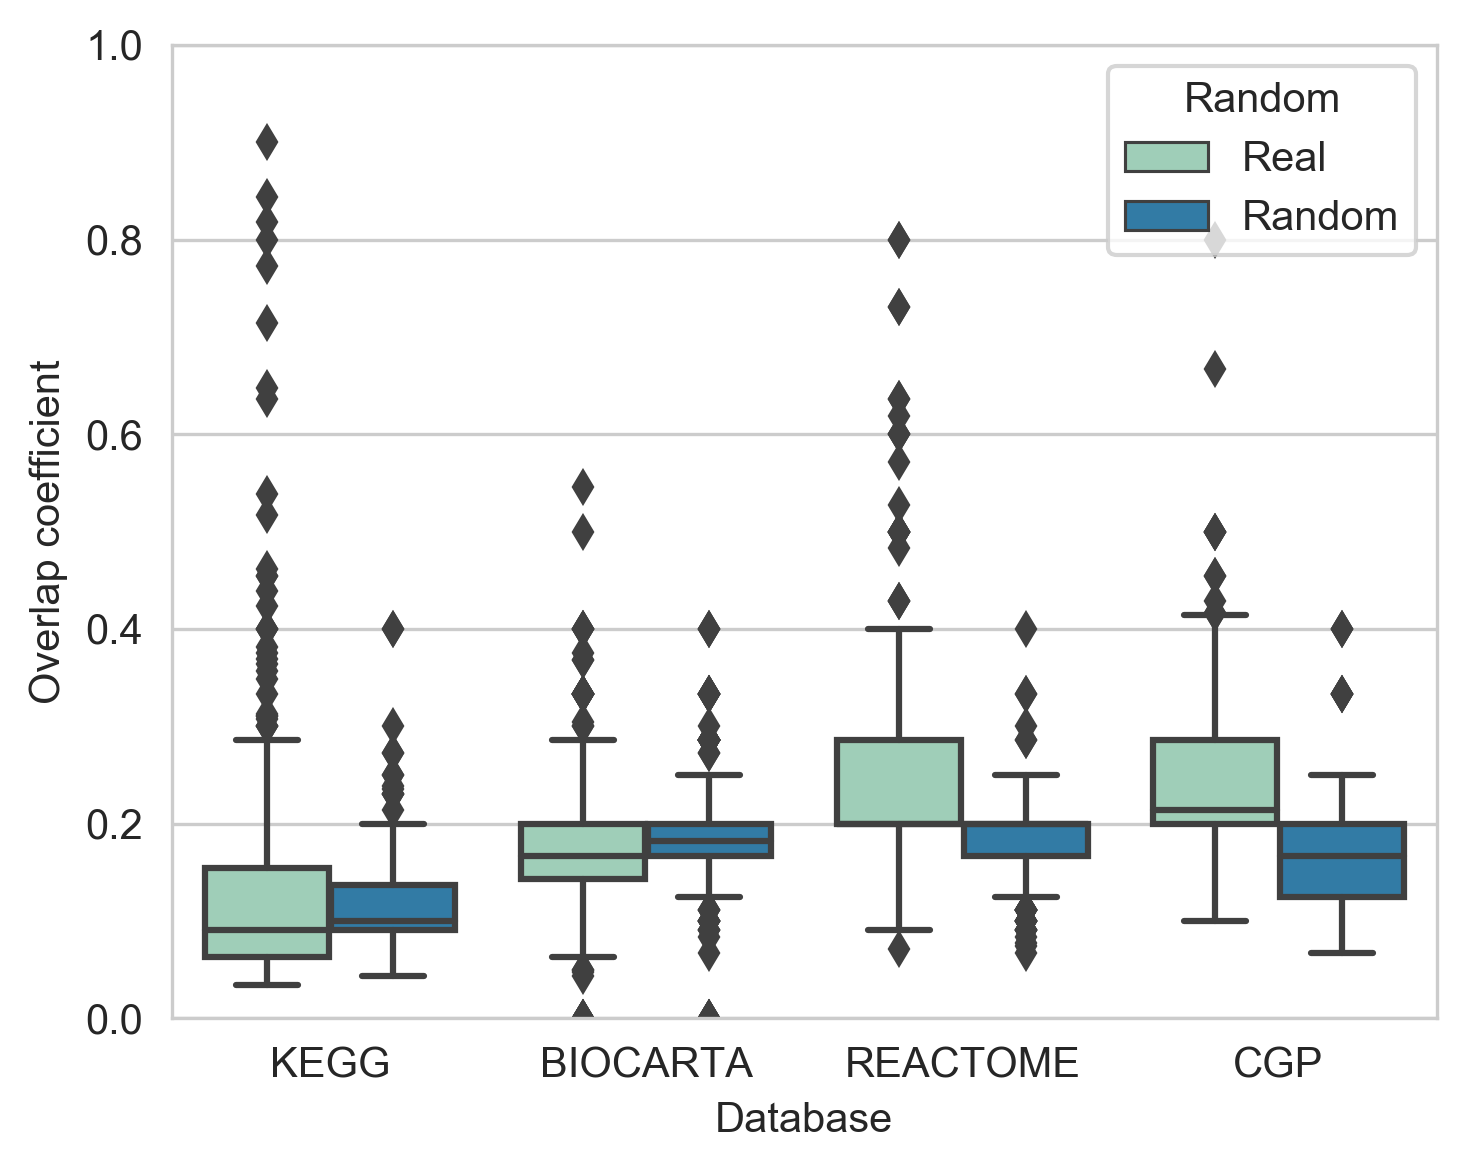

In [74]:
make_similarity_distribution('SFig2D.pdf',dname1='BEST_dorothea_CD',metric='overlap',force_ylim=True)

Shortest path distance

In [77]:
DM=pd.read_csv('../data/omnipath/DM_GC.csv',sep=',',header=0,index_col=0)
AM=pd.read_csv('../data/omnipath/AM_GC.csv',sep=',',header=0,index_col=0)

In [80]:
degree=(AM.sum()-1).astype(int)
degree_dict={}
for i in range(1,degree.max()+1):
    fil=degree==i
    degree_dict[i]=degree.index[fil]

In [118]:
def make_distance_distribution(fname,set_name='BEST_DoRothEA_AB',lab_name='DoRothEA'):
    gene_sets=pd.read_csv('../results/genesets/single/csvs/%s_filtered.csv' % set_name,
                          sep=',',header=0,index_col=0)
    #overlap with DM
    fil=np.in1d(gene_sets['Gene'],DM.index)
    gene_sets=gene_sets[fil]
    distances=[]
    bg=[]
    for gene_set in gene_sets['Set'].unique():
        fil=gene_sets['Set']==gene_set
        genes=gene_sets[fil]['Gene'].unique()
        if len(genes)>1:
            distances+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
            degree_counts=degree[genes].value_counts()
            genes=[]
            for d in degree_counts.index:
                genes+=list(np.random.choice(degree_dict[d],degree_counts[d],False))
            bg+=list(DM.loc[genes,genes].values[np.triu_indices_from(DM.loc[genes,genes],1)])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('YlGnBu',3)
    plt.hist([DM.values[np.triu_indices_from(DM,1)],bg,distances],normed=True)
    plt.xlabel('Shortest path distance')
    plt.ylabel('Density')
    plt.xlim(1,10)
    plt.legend(['all distances','degree matched background',lab_name+ ' distances'])
    plt.savefig('../figures/raw/'+fname)
    print('p value vs. all distances:',mwu(DM.values[np.triu_indices_from(DM,1)],distances))
    print('p value vs. bg distances:',mwu(bg,distances))

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9534279550.5, pvalue=0.0)


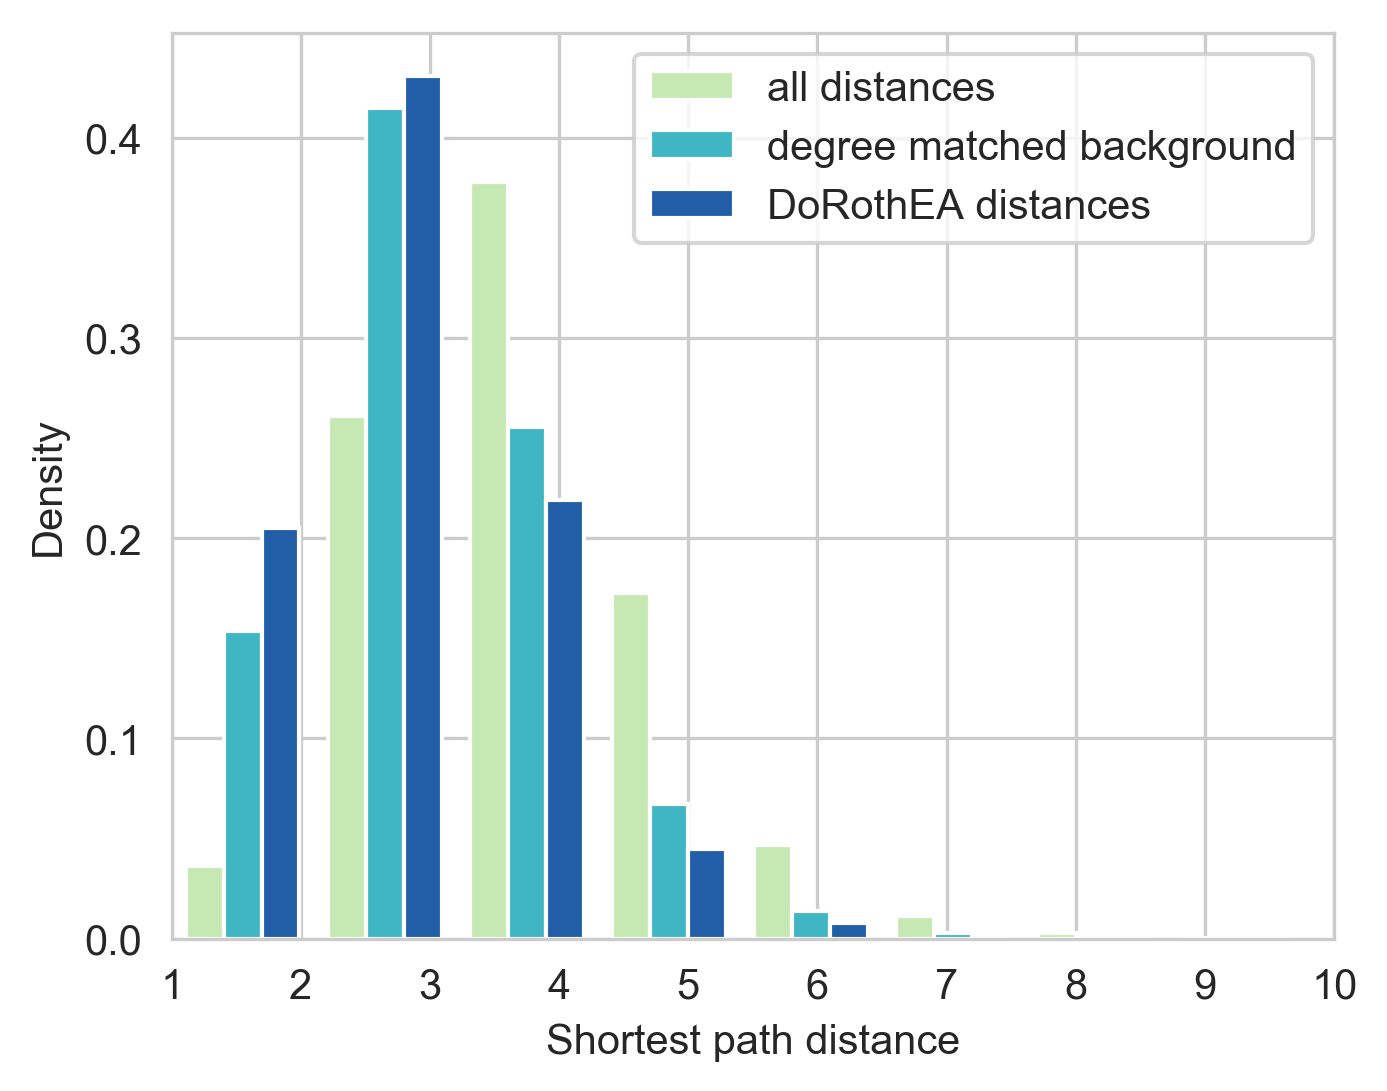

In [119]:
make_distance_distribution('Fig2C.pdf')

p value vs. all distances: MannwhitneyuResult(statistic=1477888059165.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=9621477243.5, pvalue=0.0)


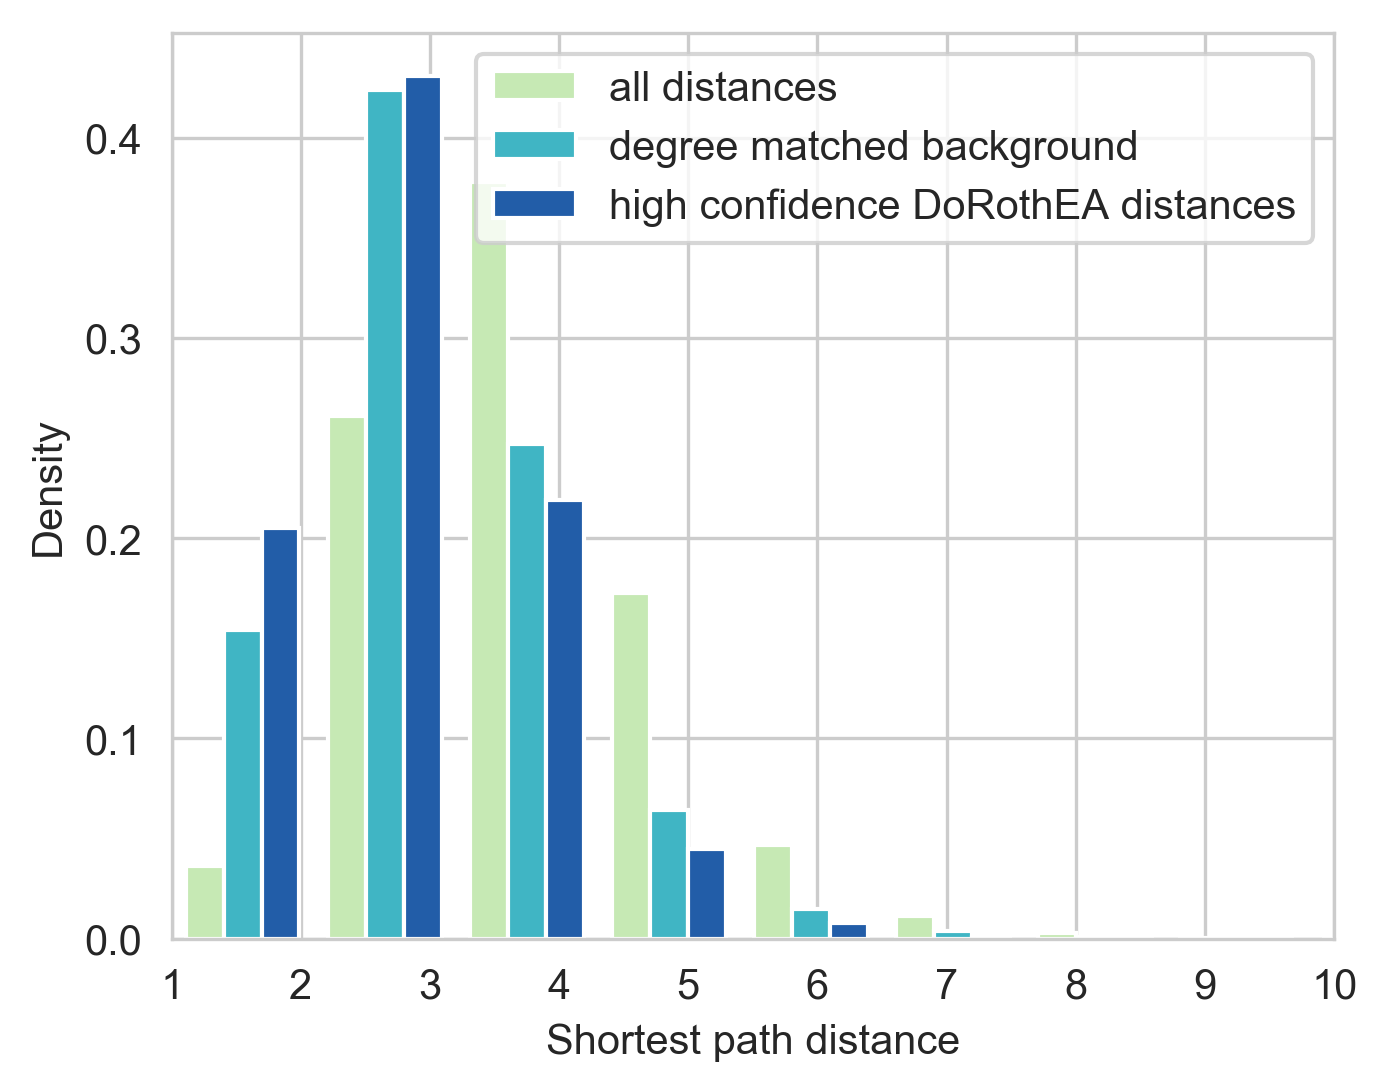

In [122]:
make_distance_distribution('SFig3A.pdf',set_name='BEST_DoRothEA_AB',lab_name='high confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=1875202701318.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8588397534.5, pvalue=0.0)


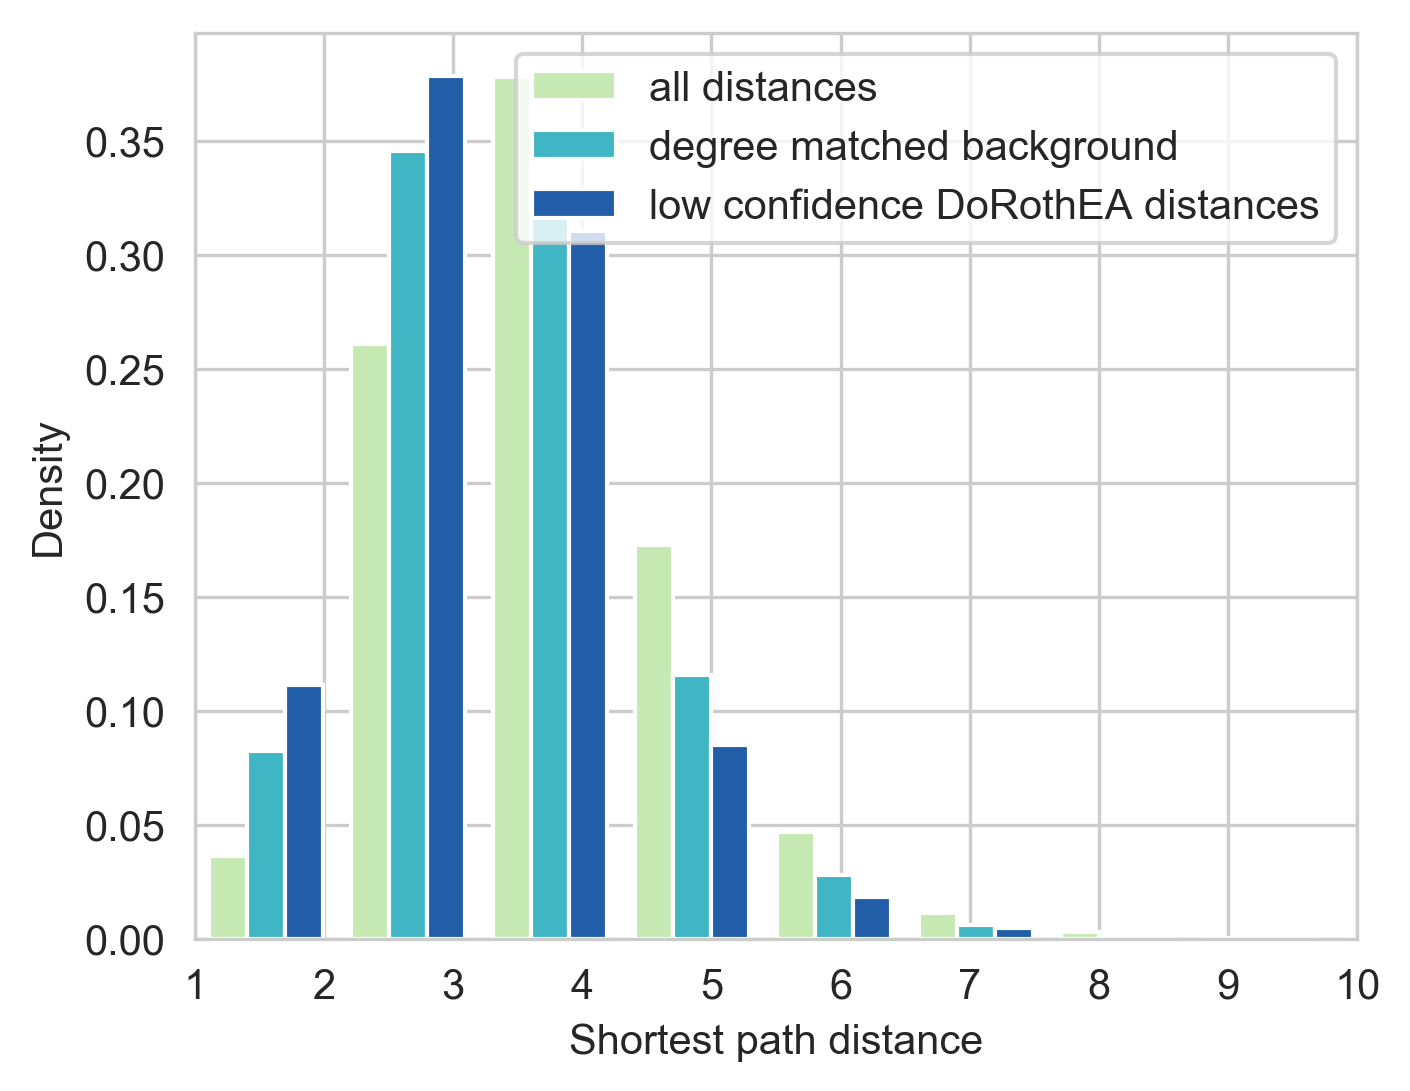

In [123]:
make_distance_distribution('SFig3B.pdf',set_name='BEST_DoRothEA_CD',lab_name='low confidence DoRothEA')

p value vs. all distances: MannwhitneyuResult(statistic=3004285610259.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=55209633449.0, pvalue=0.0)


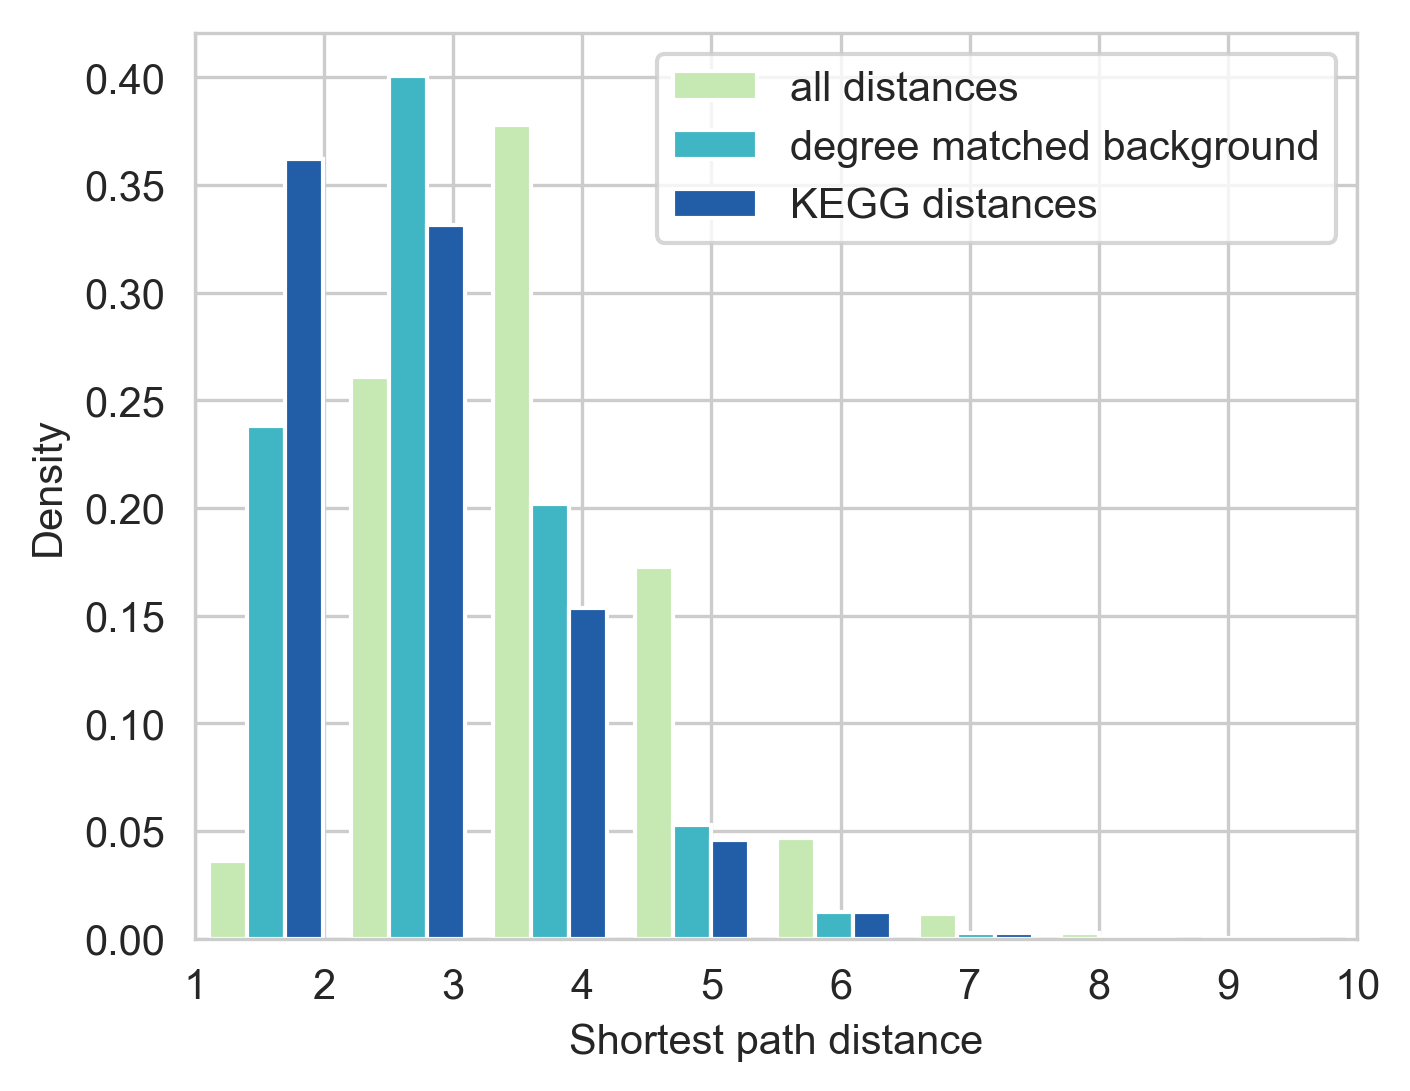

In [124]:
make_distance_distribution('SFig3C.pdf',set_name='KEGG',lab_name='KEGG')

p value vs. all distances: MannwhitneyuResult(statistic=148364150091.0, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=827976822.5, pvalue=0.0)


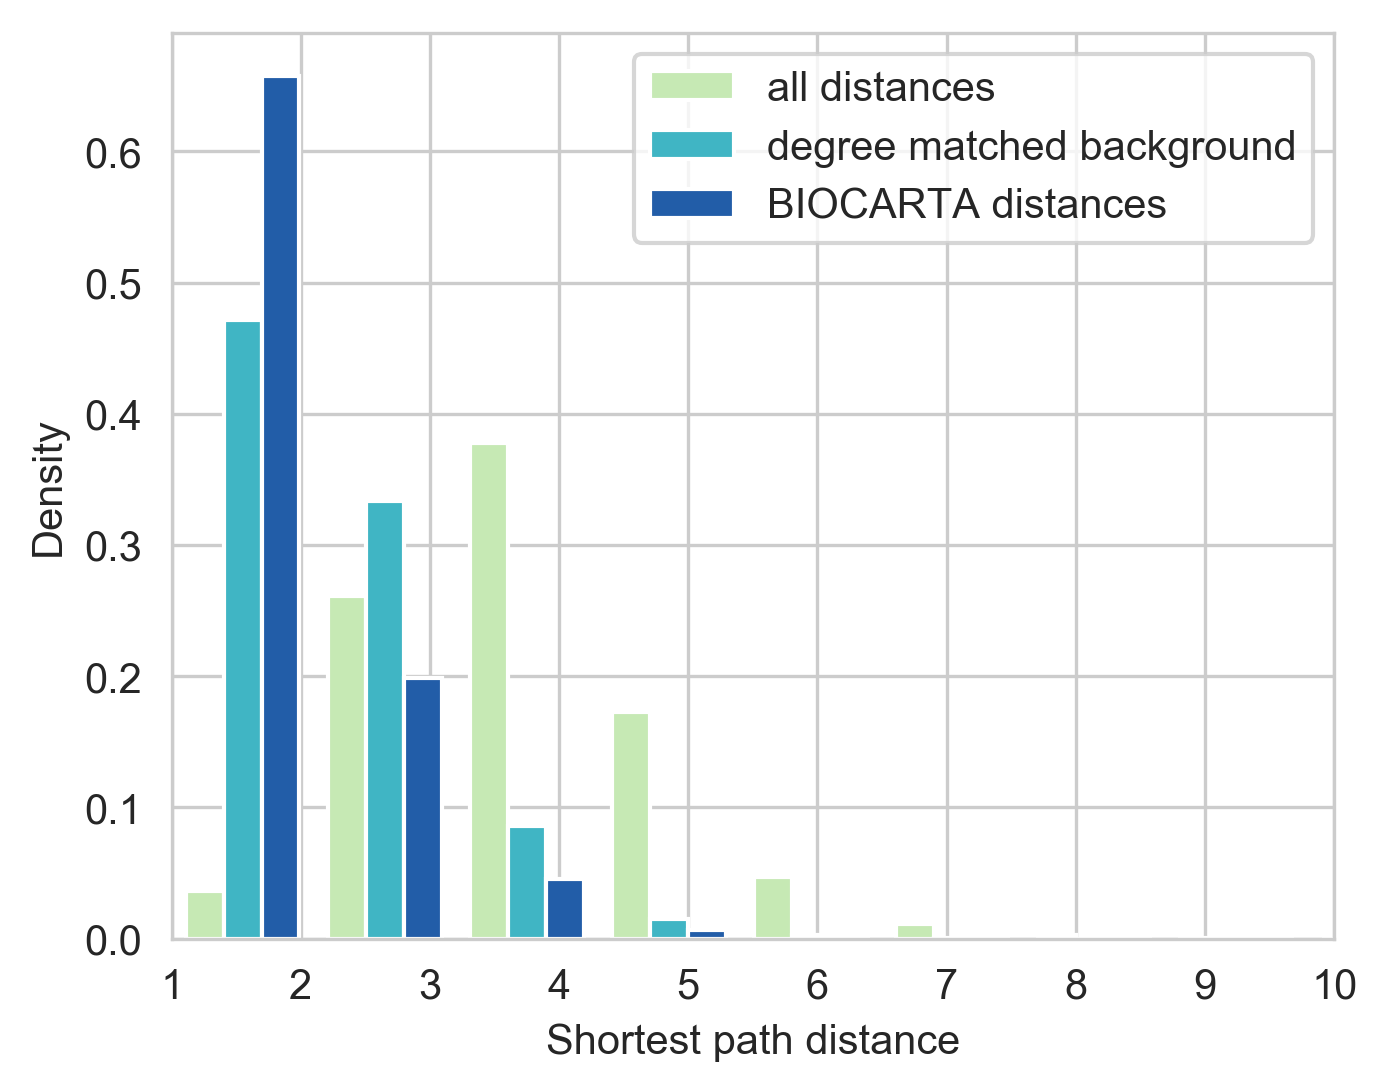

In [128]:
make_distance_distribution('SFig3D.pdf',set_name='BIOCARTA',lab_name='BIOCARTA')

p value vs. all distances: MannwhitneyuResult(statistic=12792509248376.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=790719361316.5, pvalue=0.0)


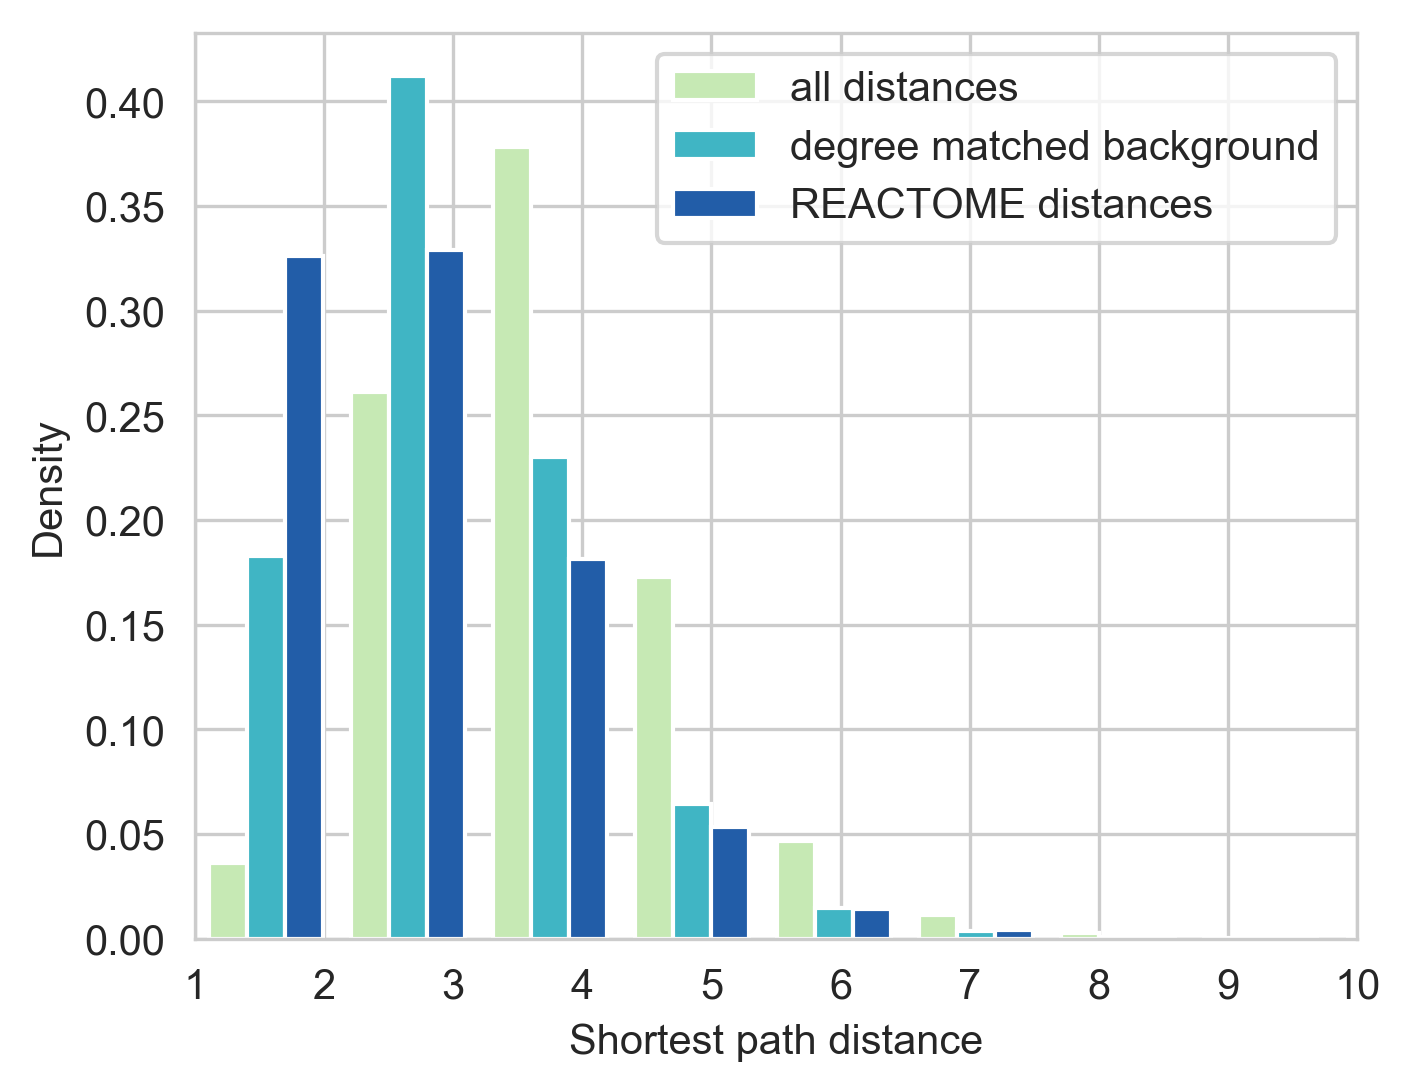

In [129]:
make_distance_distribution('SFig3E.pdf',set_name='REACTOME',lab_name='REACTOME')

p value vs. all distances: MannwhitneyuResult(statistic=62225351048753.5, pvalue=0.0)
p value vs. bg distances: MannwhitneyuResult(statistic=8544221811389.5, pvalue=0.0)


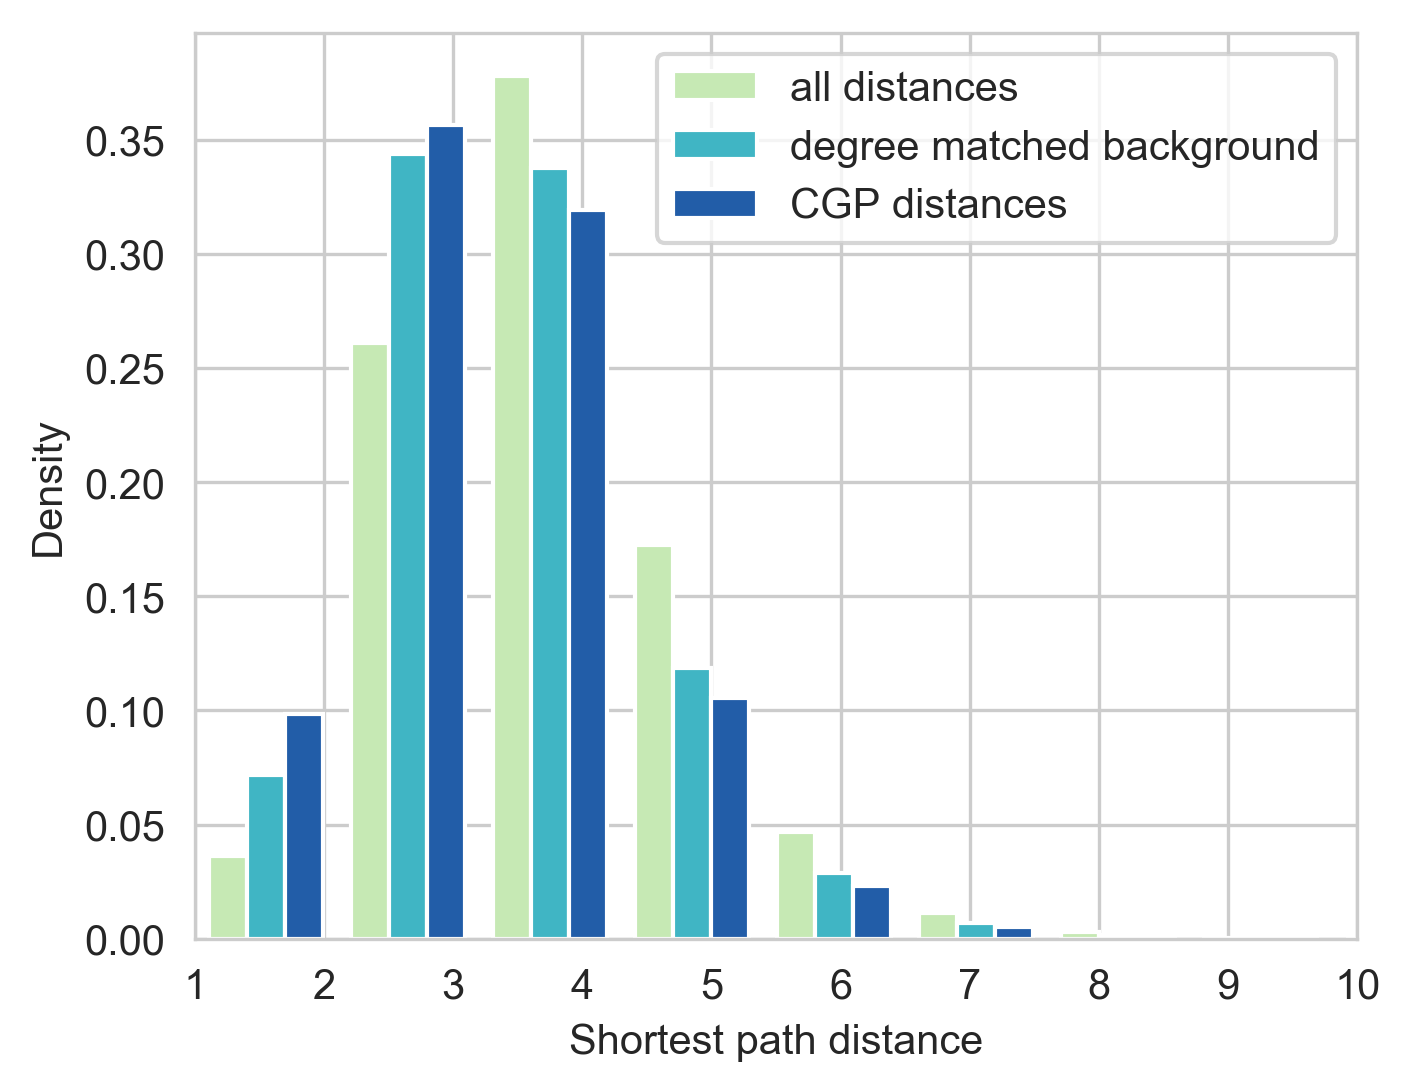

In [130]:
make_distance_distribution('SFig3F.pdf',set_name='CGP',lab_name='CGP')

Benchmark data

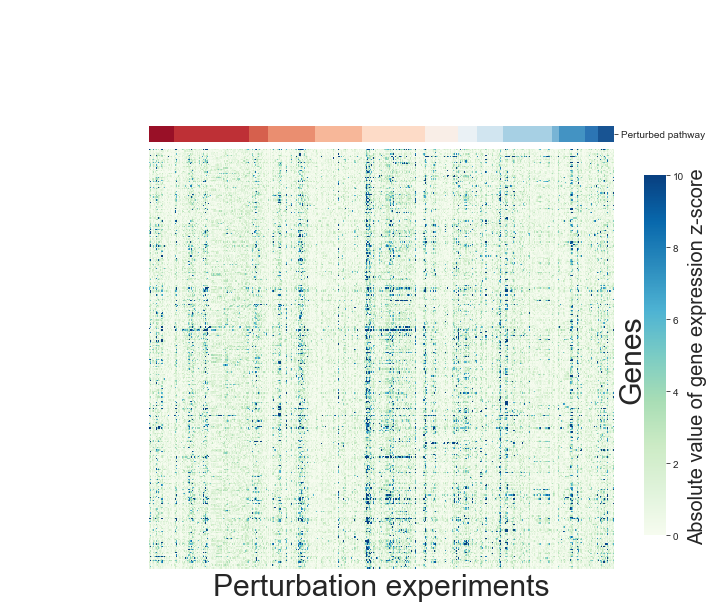

In [134]:
data=pd.read_csv('../results/benchmark/datasets/progeny_data.csv',sep=',',header=0,index_col=0).abs()
data[data<-10]=-10
data[data>10]=10
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
meta.columns=['Perturbed pathway']
col_col=dict(zip(meta['Perturbed pathway'].unique(), sns.color_palette('RdBu',14)))
g=sns.clustermap(data.iloc[:300,],cmap='GnBu',col_colors=meta['Perturbed pathway'].map(col_col),
               row_cluster=False,col_cluster=False,
               cbar_pos=(0.9, .25, .03, .5),rasterized=True)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xlabel('Perturbation experiments',size=30)
g.ax_heatmap.set_ylabel('Genes',size=30)
g.ax_cbar.set_ylabel('Absolute value of gene expression z-score',size=20)
plt.savefig('../figures/raw/Fig3A1.pdf')

In [14]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC

0.867385458682387 0.6752249457027615


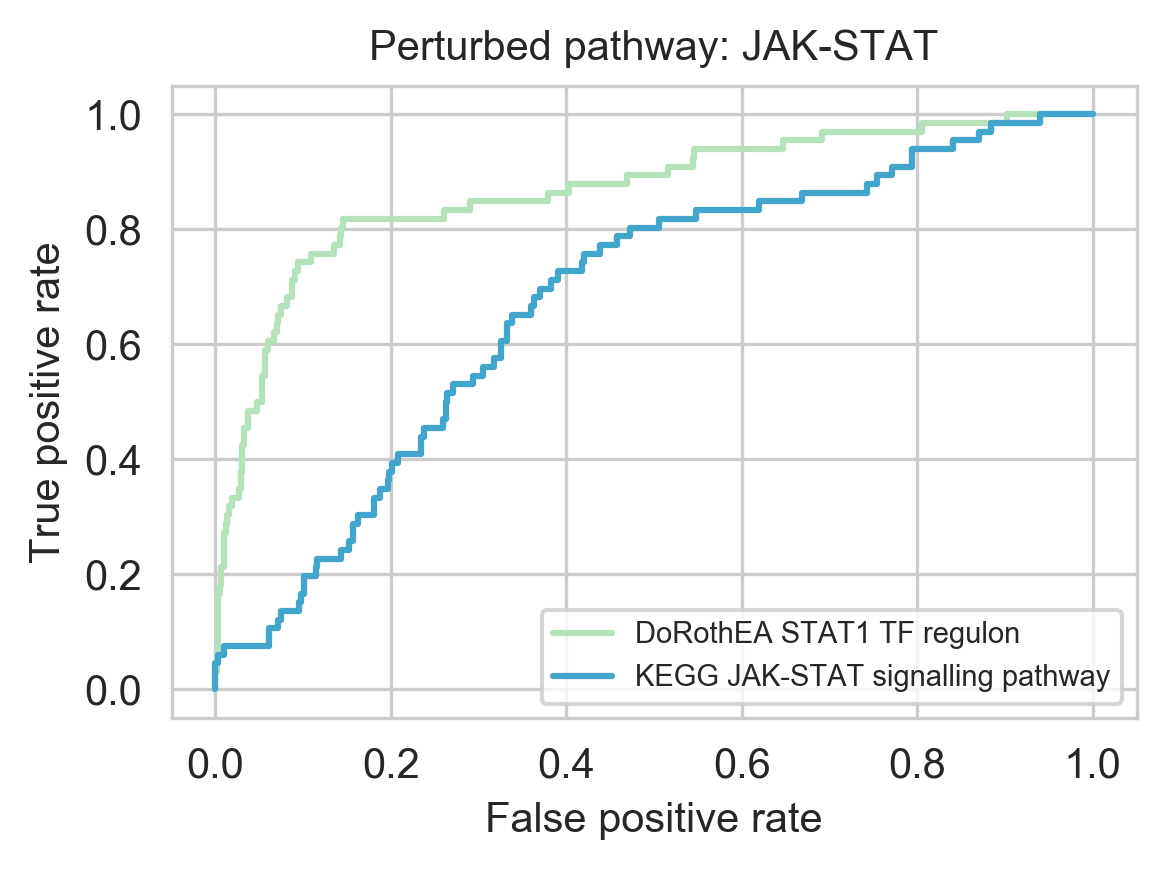

In [16]:
dorothea=pd.read_csv('../results/benchmark/scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
kegg=pd.read_csv('../results/benchmark/scores/progeny/single/KEGG_filtered_abs.csv',
                     sep=',',header=0,index_col=0)
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
y_pr1=dorothea.loc['STAT1']
y_pr2=kegg.loc['KEGG_JAK_STAT_SIGNALING_PATHWAY']
y_tr=(meta['pathway']=='JAK-STAT')*1
fpr1,tpr1,th=ROC(y_true=y_tr,y_score=y_pr1)
fpr2,tpr2,th=ROC(y_true=y_tr,y_score=y_pr2)
auc1=AUC(fpr1,tpr1)
auc2=AUC(fpr2,tpr2)
sns.set_palette('GnBu',2)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.xlabel('False positive rate',size=10)
plt.ylabel('True positive rate',size=10)
plt.title('Perturbed pathway: JAK-STAT',size=10)
plt.legend(['DoRothEA STAT1 TF regulon','KEGG JAK-STAT signalling pathway'],fontsize=7)
plt.tight_layout()
print(auc1,auc2)
plt.savefig('../figures/raw/Fig3A2.pdf')

In [17]:
data=pd.read_csv('../results/benchmark/z_scores/progeny/single/BEST_dorothea_AB_filtered_abs.csv',
                sep=',',header=0,index_col=0)
data=data.sort_index()

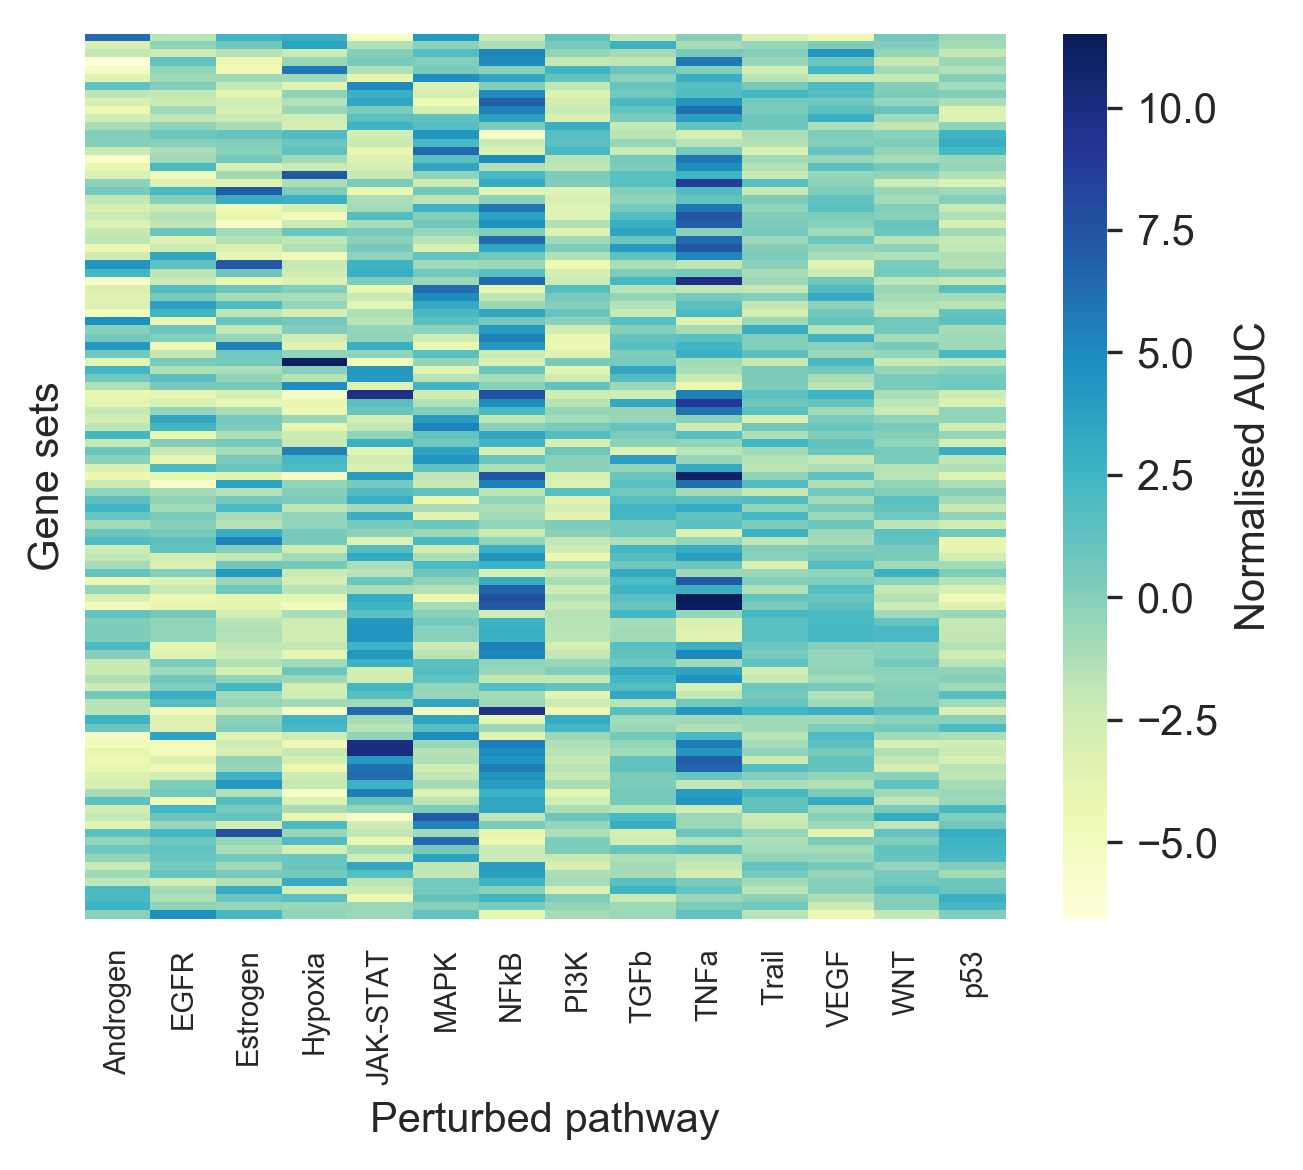

In [18]:
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data.T,cmap='YlGnBu',cbar_kws={'label': 'Normalised AUC'})
plt.xlabel('Perturbed pathway',size=10)
plt.ylabel('Gene sets',size=10)
plt.yticks([])
plt.xticks(size=7)
plt.tight_layout()
plt.savefig('../figures/raw/Fig3A3.pdf')

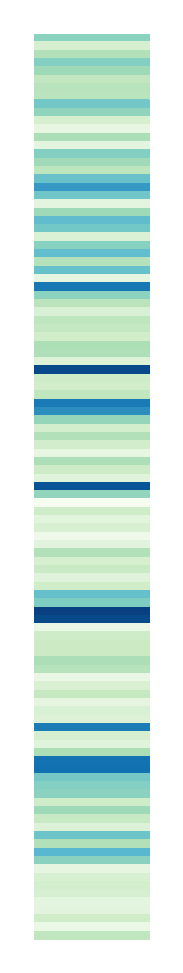

In [19]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.abs().max(0)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.savefig('../figures/raw/Fig3A4.pdf')

In [135]:
def get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs'):
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','CGP','KEGG','BIOCARTA','REACTOME']
    scores=[]
    for fname in datasets:
        data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,'_random',abstype),
                         sep=',',header=0,index_col=0)
        scores+=list(data.values.reshape((1,-1))[0])
    scores=np.array(scores)
    th=np.std(scores)*2.5
    m=np.mean(scores)
    print(m)
    results=pd.DataFrame(columns=['Rtype','Dataset','Informative','Total'])
    for rtype in ['_random','_filtered']:
        for fname in datasets:
            data=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,fname,rtype,abstype),
                             sep=',',header=0,index_col=0)
            p=((data.abs()>th).sum(0)>0).sum()
            n=data.shape[1]
            temp=pd.DataFrame(index=[len(results)],columns=results.columns)
            temp.loc[len(results)]=[rtype,fname,p,n]
            results=pd.concat([results,temp])
    results['Prop']=results['Informative']/results['Total']
    results['Non_informative']=results['Total']-results['Informative']
    results=results.sort_values(['Dataset','Rtype'])
    results.index=range(len(results))
    return results

In [144]:
def plot_lollipop(results,fname=False):
    plt.figure(figsize=(5,4),dpi=300)
    colors=sns.color_palette('GnBu',2)
    fil=results['Rtype']=='_filtered'
    plt.hlines(y=results.index[fil], xmin=0, xmax=results['Prop'][fil], color=colors[0])
    plt.hlines(y=results.index[~fil], xmin=0, xmax=results['Prop'][~fil], color=colors[1])
    plt.plot(results['Prop'][fil],results.index[fil],'o',color=colors[0])
    plt.plot(results['Prop'][~fil],results.index[~fil],'o',color=colors[1])
    dnames=['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME']
    plt.yticks((results.index[fil]+results.index[~fil])/2,dnames)
    plt.xlabel('Informative / non-informative ratio',size=13)
    plt.legend(['Real','Random'])
    plt.tight_layout()
    if fname:
        plt.savefig('../figures/raw/'+fname+'.pdf')

In [137]:
def make_fisher_test(data):
    fil=results['Rtype']=='_filtered'
    a=results['Informative'][fil].sum()
    b=results['Informative'][~fil].sum()
    c=results['Non_informative'][fil].sum()
    d=results['Non_informative'][~fil].sum()
    print('vs. random:',fisher_exact([[a,b],[c,d]]))
    for dataset in data['Dataset'].unique():
        fil=results['Rtype']=='_filtered'
        fil1=(results['Dataset']=='BEST_dorothea_AB')&fil
        fil2=(results['Dataset']==dataset)&fil
        a=results['Informative'][fil1].sum()
        b=results['Informative'][fil2].sum()
        c=results['Non_informative'][fil1].sum()
        d=results['Non_informative'][fil2].sum()
        print('Dorothea vs. ',dataset,fisher_exact([[a,b],[c,d]]))

-0.013246926042144856
vs. random: (2.7603475602250813, 9.409076993897767e-122)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.344710723795691, 0.0003797428092137405)
Dorothea vs.  BIOCARTA (1.454194792671167, 0.11285753068156079)
Dorothea vs.  CGP (1.4261395876678646, 0.07700462862129548)
Dorothea vs.  KEGG (1.6290408055113939, 0.05160847638619953)
Dorothea vs.  REACTOME (2.2303697734801684, 9.521660745376138e-05)


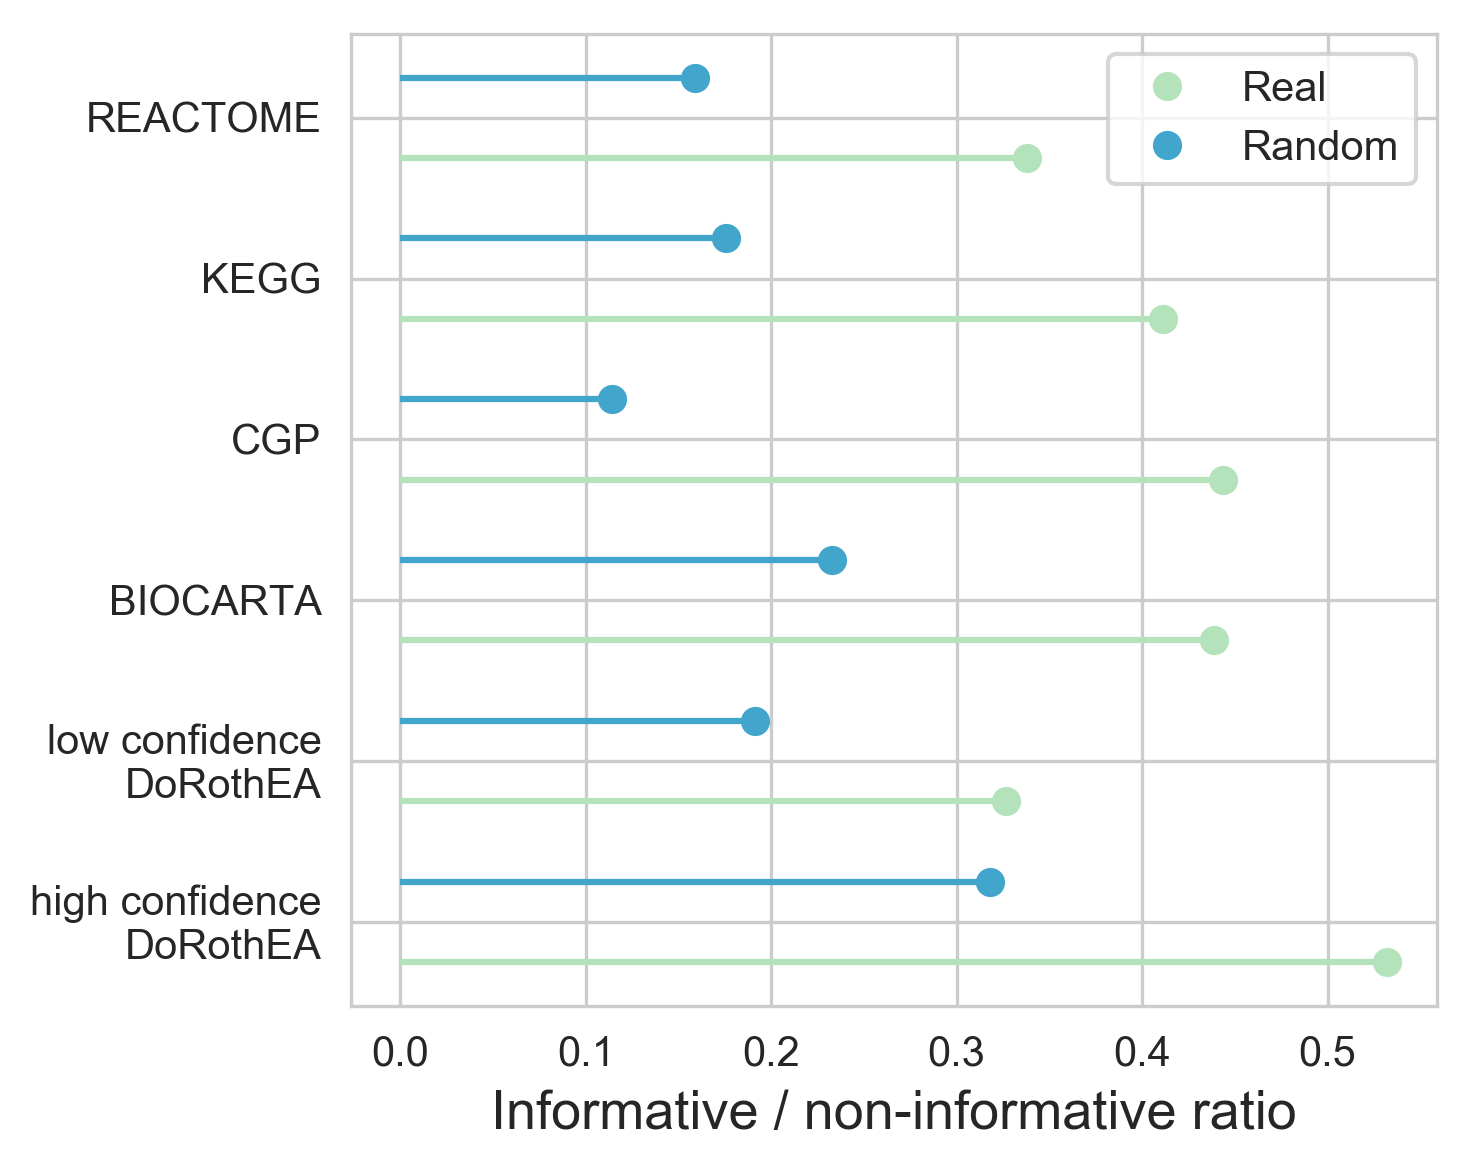

In [150]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='_abs')
plot_lollipop(results,'Fig3B')
make_fisher_test(results)

-0.02991655321601201
vs. random: (1.3835938615419014, 5.356454848062025e-16)
Dorothea vs.  BEST_dorothea_AB (1.0, 1.0)
Dorothea vs.  BEST_dorothea_CD (2.1850299401197604, 0.005058295266152969)
Dorothea vs.  BIOCARTA (2.9410919540229883, 4.753711536466407e-05)
Dorothea vs.  CGP (1.5421198156682028, 0.09275477740412211)
Dorothea vs.  KEGG (1.7457692307692307, 0.06732295438230555)
Dorothea vs.  REACTOME (3.0480163360560093, 2.0469321909684364e-06)


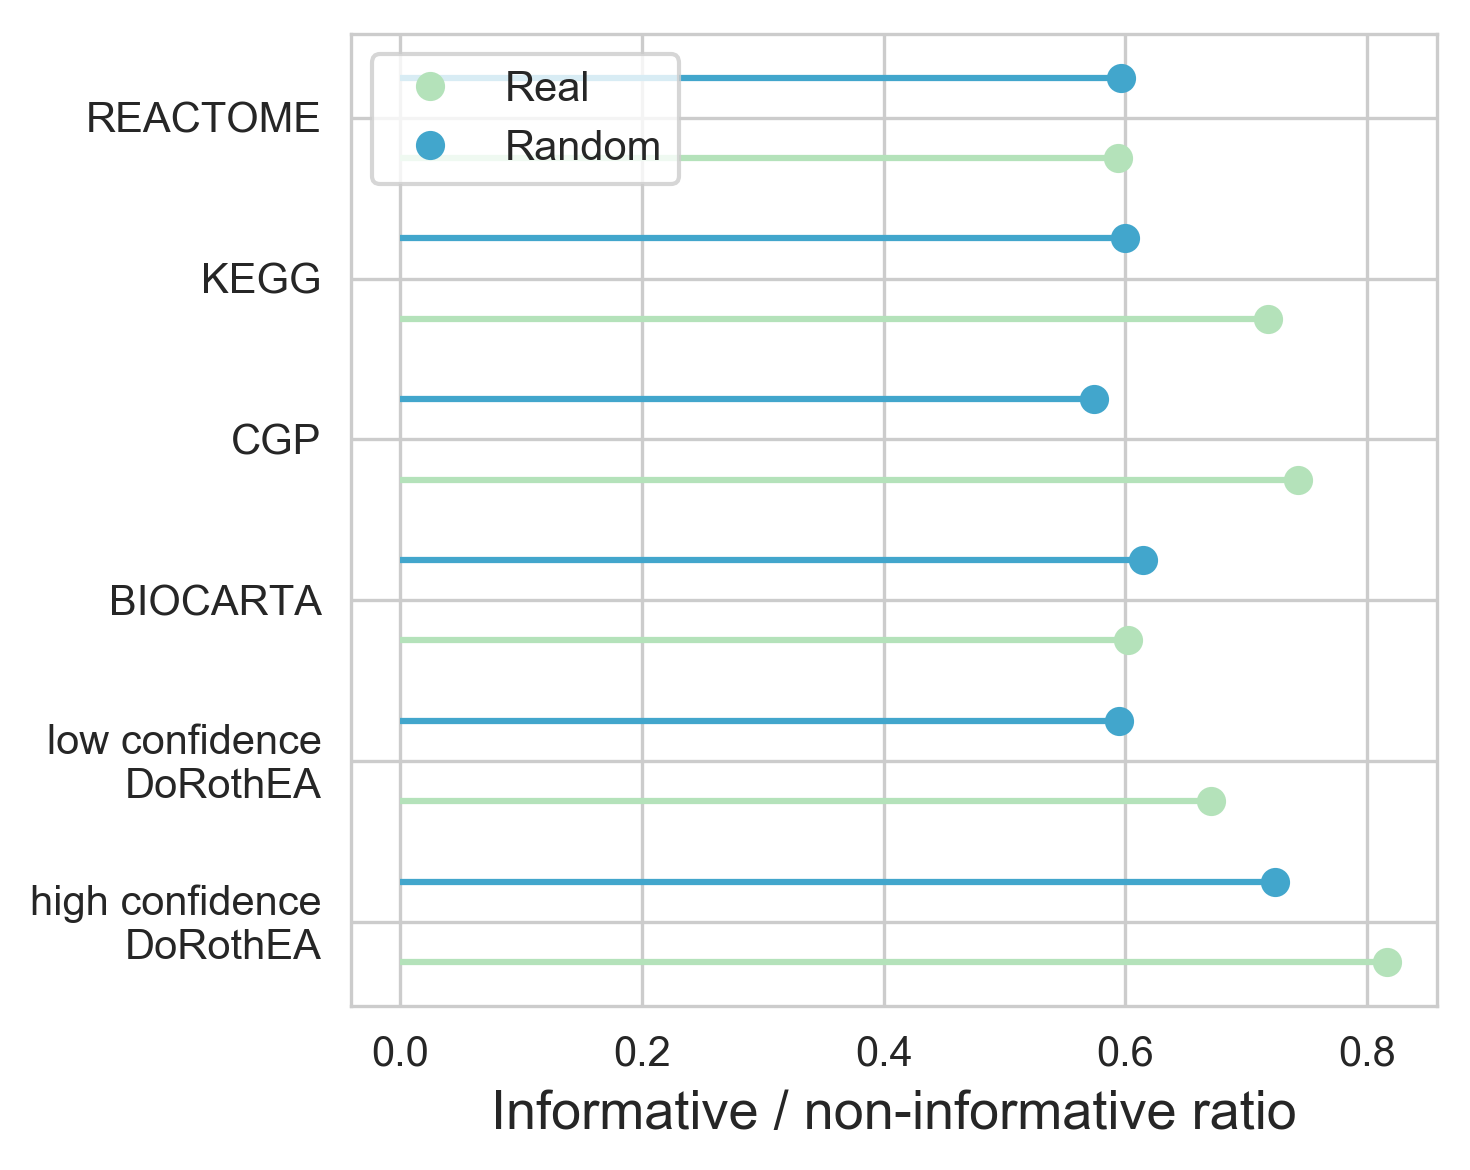

In [149]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='_abs')
plot_lollipop(results,'Fig3C')
make_fisher_test(results)

-0.04333389154584836


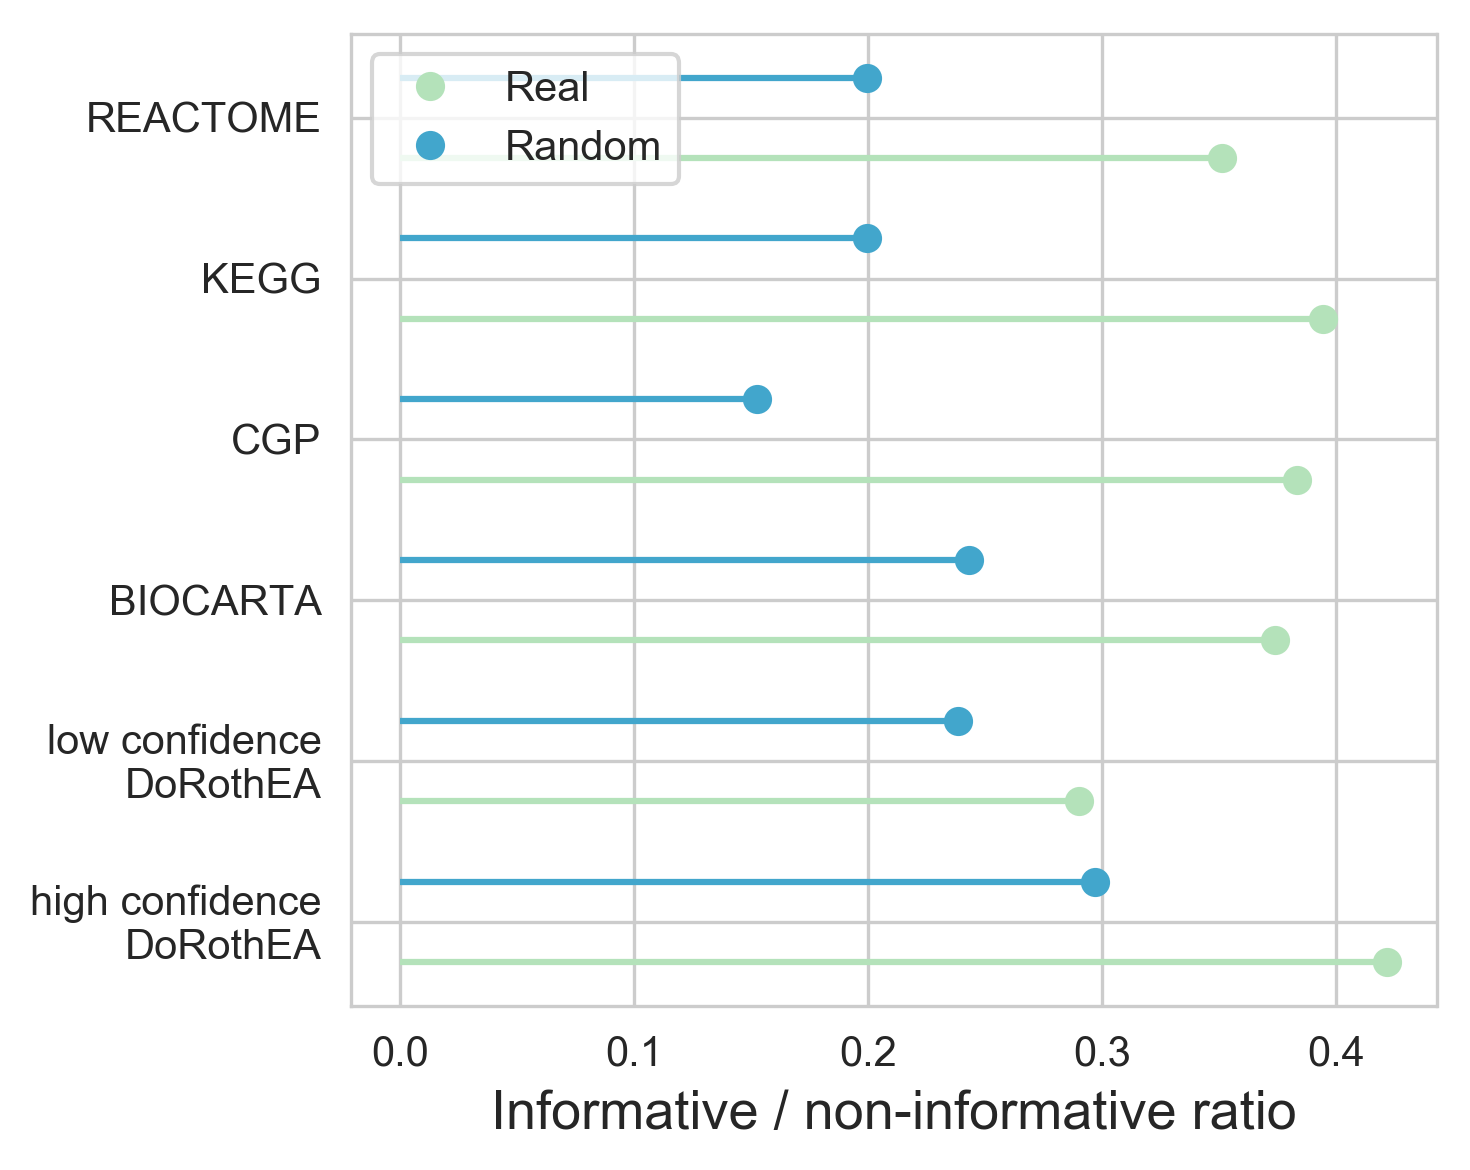

In [151]:
results=get_number_of_informative_gene_sets(bname='progeny',abstype='')
plot_lollipop(results,'SFig5A')

-0.21467888372146707


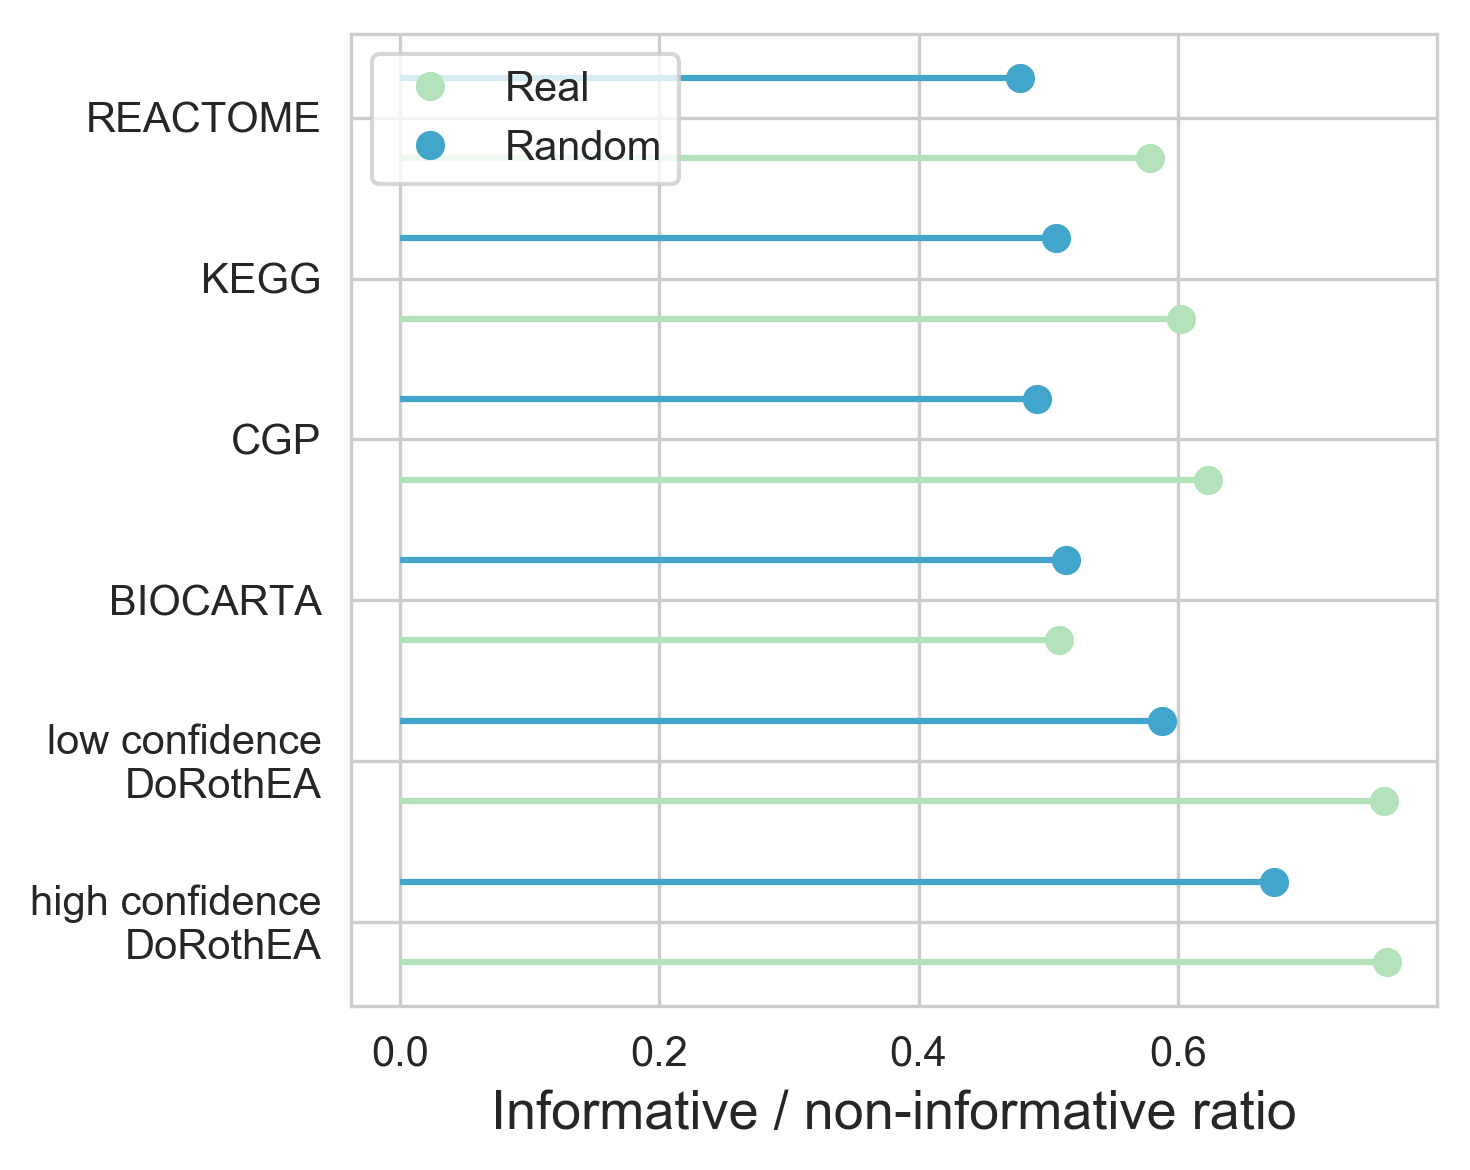

In [152]:
results=get_number_of_informative_gene_sets(bname='gdsc',abstype='')
plot_lollipop(results,'SFig5B')

In [3]:
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','BIOCARTA',
         'KEGG','REACTOME','CGP']
results=pd.DataFrame(columns=['Dataset','Rtype','r'])

In [4]:
for fname in datasets:
    data1=pd.read_csv('../results/benchmark/scores/progeny/single/'+fname+'_filtered_abs.csv',
                  sep=',',header=0,index_col=0).abs().max(1)
    data2=pd.read_csv('../results/benchmark/scores/gdsc/single/'+fname+'_filtered_abs.csv',
                      sep=',',header=0,index_col=0).abs().max(1)
    sets=list(set(data1.index)&set(data2.index))
    data1=data1[sets]
    data2=data2[sets]
    temp=pd.DataFrame(index=[len(results)],columns=results.columns)
    temp.loc[len(results)]=fname,'real',pcor(data1,data2)[0]
    results=pd.concat([results,temp])
results=results.sort_values(['Dataset','Rtype'])

In [9]:
results

Dataset Rtype         r
0  BEST_dorothea_AB  real  0.797089
1  BEST_dorothea_CD  real  0.384027
2          BIOCARTA  real    0.4464
5               CGP  real   0.71781
3              KEGG  real  0.524283
4          REACTOME  real  0.539995

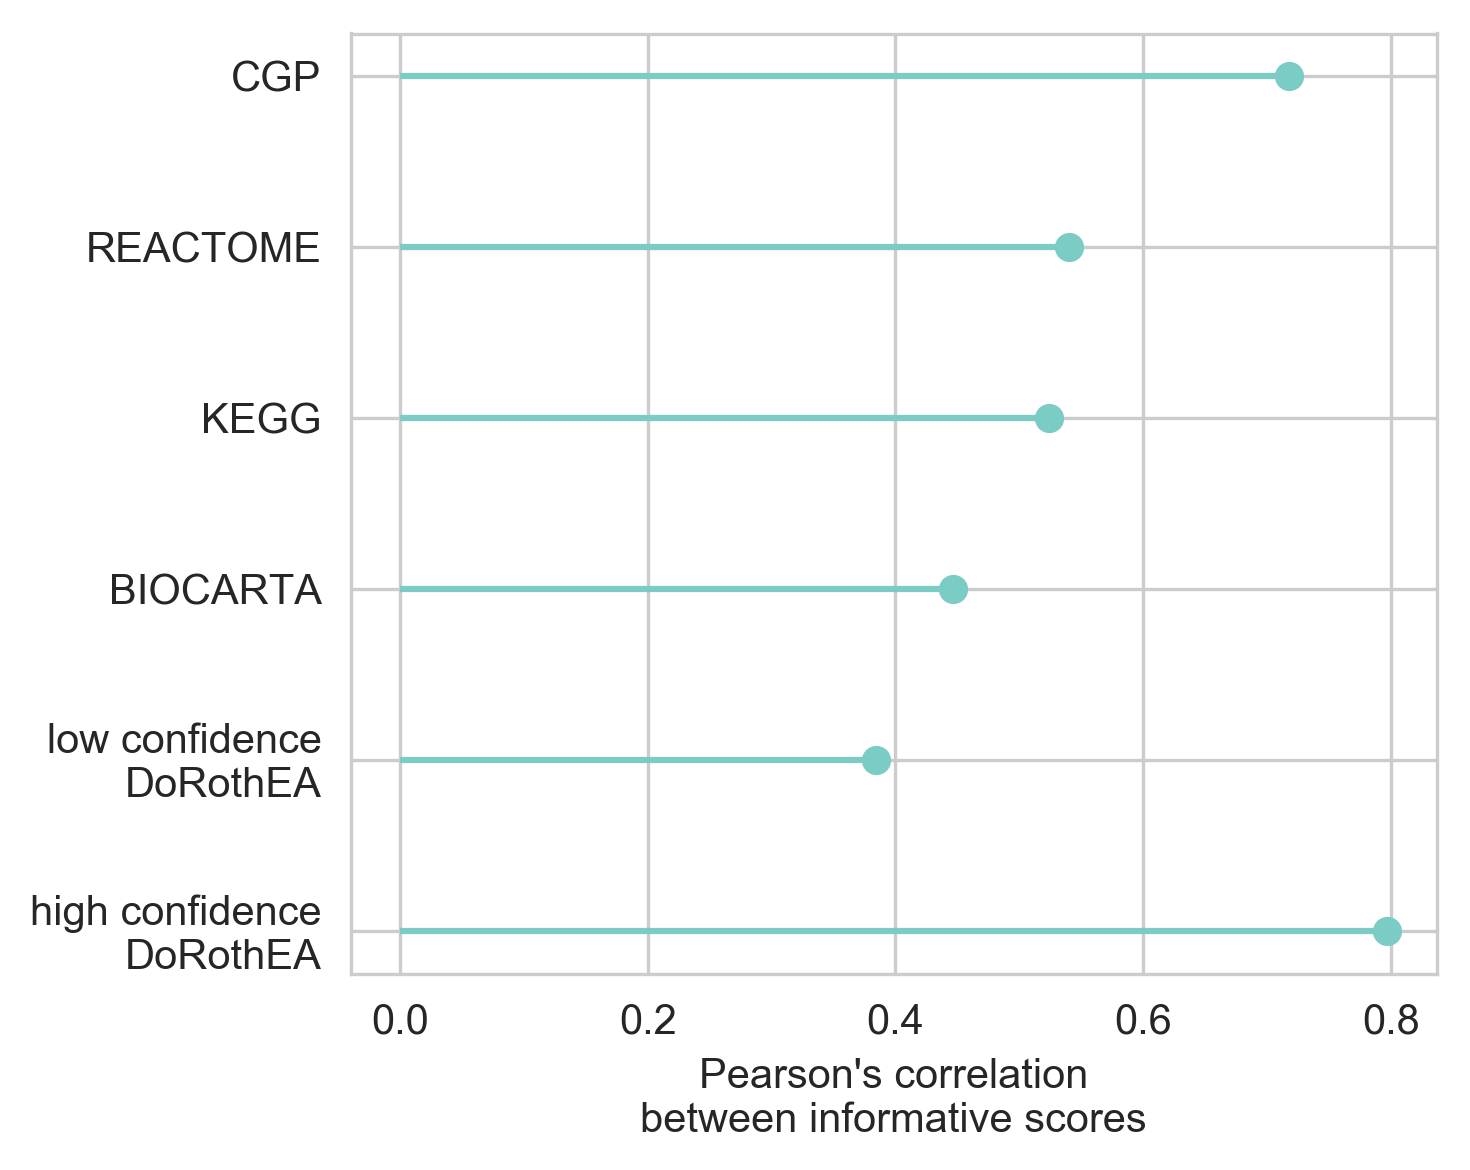

In [25]:
plt.figure(figsize=(5,4),dpi=300)
colors=sns.color_palette('GnBu',1)
plt.hlines(y=results.index, xmin=0, xmax=results['r'],colors=colors[0])
plt.plot(results['r'], results.index, "o",color=colors[0])
plt.xlabel("Pearson's correlation\nbetween informative scores")
plt.yticks(results.index,['high confidence\nDoRothEA','low confidence\nDoRothEA','BIOCARTA','CGP','KEGG','REACTOME'])
plt.tight_layout()
plt.savefig('../figures/raw/SFig4.pdf')

In [3]:
def plot_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type,name1,name2):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    colors=sns.color_palette('GnBu',2)
    f,axs=plt.subplots(1,2,figsize=(8,4),dpi=300)
    sns.regplot(similarity1,activity1,ax=axs[0],color=colors[0])
    axs[0].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name1,name2))
    axs[0].set_ylabel('Informative score of %s gene sets' % name1)

    sns.regplot(similarity2,activity2,ax=axs[1],color=colors[1])
    axs[1].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name2,name1))
    axs[1].set_ylabel('Informative score of %s gene sets' % name2)
    print(pcor(similarity1,activity1))
    print(pcor(similarity2,activity2))
    plt.tight_layout()

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-0.010514947338572085, 0.9135858866211439)
(0.3333956879829957, 1.2149958933631959e-08)


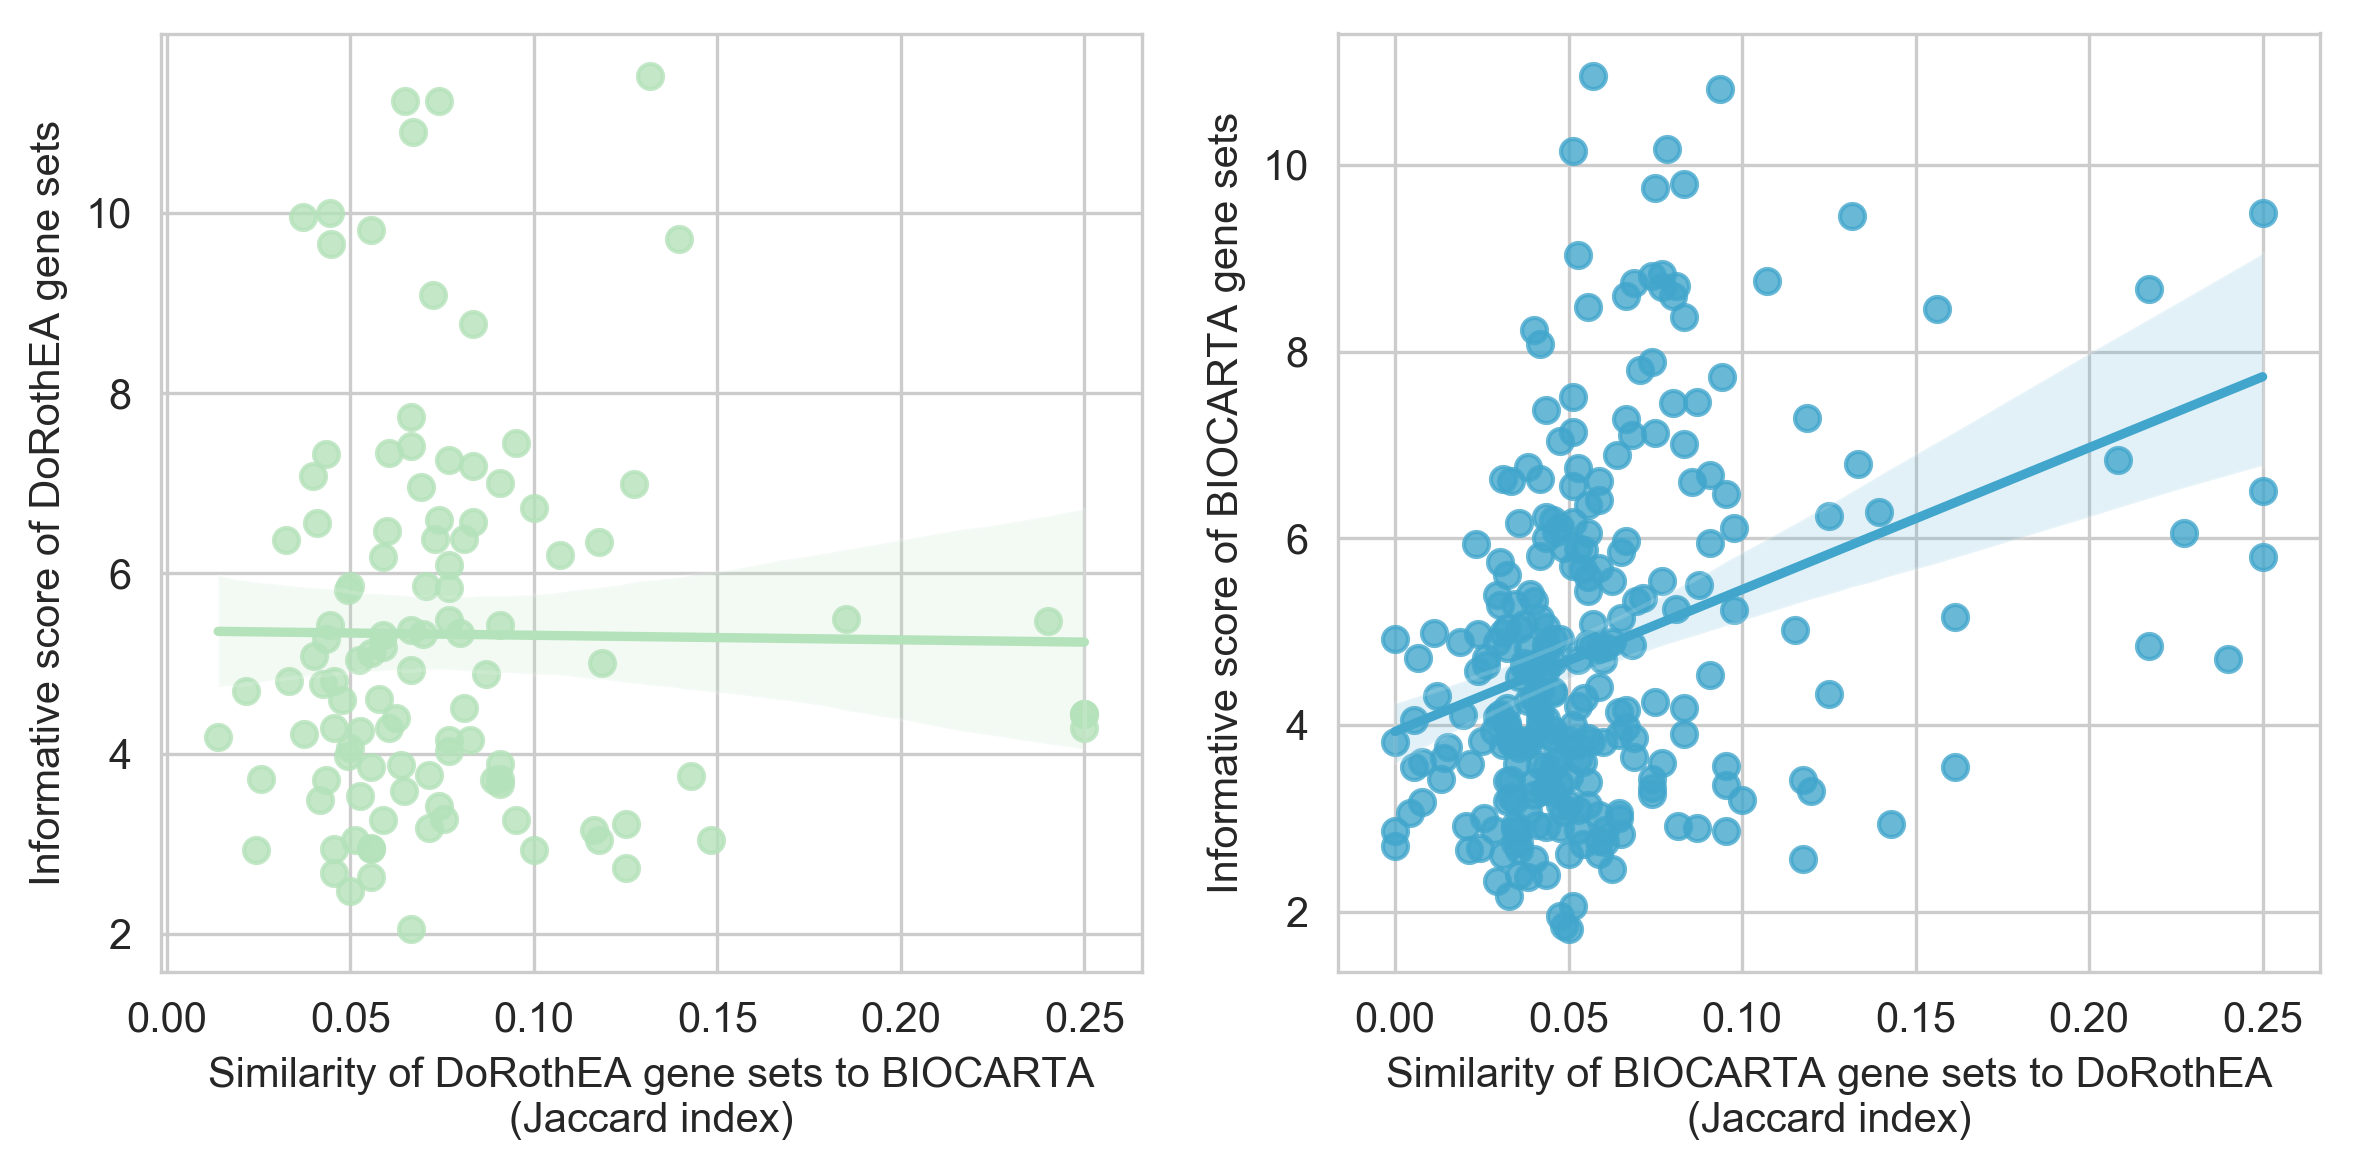

In [4]:
plot_correaltions('BEST_dorothea_AB','BIOCARTA','_abs','_filtered','progeny','jaccard',
                  'DoRothEA','BIOCARTA')
plt.savefig('../figures/raw/Fig4A.pdf')

In [80]:
def get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    sets1=np.random.choice(sets1,100,False)
    sets2=np.random.choice(sets2,100,False)
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    return pcor(similarity1,activity1),pcor(similarity2,activity2)

In [20]:
def analyse_pairwise_correaltions(abs_type='_abs',rnd_fil='_filtered',bname='progeny',sim_type='jaccard'):
    results=pd.DataFrame(columns=['data1','data2','r'])
    datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
    for dname1 in datasets:
        for dname2 in datasets:
            if dname1<dname2:
                r1,r2=get_correaltions(dname1,dname2,abs_type,rnd_fil,bname,sim_type)
                temp=pd.DataFrame(index=range(2),columns=results.columns)
                temp.loc[0]=[dname1,dname2,r1]
                temp.loc[1]=[dname2,dname1,r2]
                results=pd.concat([results,temp])
    results.index=range(len(results.index)) 
    results['r']=results['r'].astype(float)
    fil=np.in1d(results['data2'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['Data driven gene set']=False
    results.loc[results.index[fil],'Data driven gene set']=True
    fil=np.in1d(results['data1'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
    results['data_driven_from']=0
    results.loc[results.index[fil],'data_driven_from']=1
    results.columns=['Similarity of','Similarity to','Correaltion between similarity\nand informative score',
                    'Data driven gene set','data_driven_from']
    results=results.sort_values(['Similarity to','Similarity of'])
    plt.figure(figsize=(5,4),dpi=300)
    sns.set_palette('GnBu',6)
    #sns.boxplot(y='Correaltion between similarity\nand informative score',
    #            x='Data driven gene set',hue='Similarity to',data=results)
    sns.boxplot(y='Correaltion between similarity\nand informative score',whis=100,
                x='Similarity to',data=results)
    sns.swarmplot(y='Correaltion between similarity\nand informative score',color='k',
                x='Similarity to',data=results,)
    
    plt.xticks([0,1,2,3,4,5],['high confidence\nDoROthEA',
                             'low confidence\nDoRothEA',
                             'Biocarta',
                             'CGP',
                             'KEGG',
                             'Reactome'],rotation=45)
    plt.tight_layout()
    results.columns=['of','to','r','dd_to','dd_from']
    model = ols('r ~ of + dd_to',data=results).fit()
    print(sm.stats.anova_lm(model))
    print('')
    model = ols('r ~ to',data=results).fit()
    print(model.pvalues)
    print('')
    print(model.params)
    return results

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.108254  0.021651  1.474054  0.236679
dd_to      1.0  0.091508  0.091508  6.230162  0.020170
Residual  23.0  0.337822  0.014688       NaN       NaN

Intercept                 0.000053
to[T.BEST_dorothea_CD]    0.101053
to[T.BIOCARTA]            0.153158
to[T.CGP]                 0.864730
to[T.KEGG]                0.029217
to[T.REACTOME]            0.005332
dtype: float64

Intercept                 0.259826
to[T.BEST_dorothea_CD]   -0.127742
to[T.BIOCARTA]           -0.110506
to[T.CGP]                -0.012899
to[T.KEGG]               -0.173729
to[T.REACTOME]           -0.229498
dtype: float64


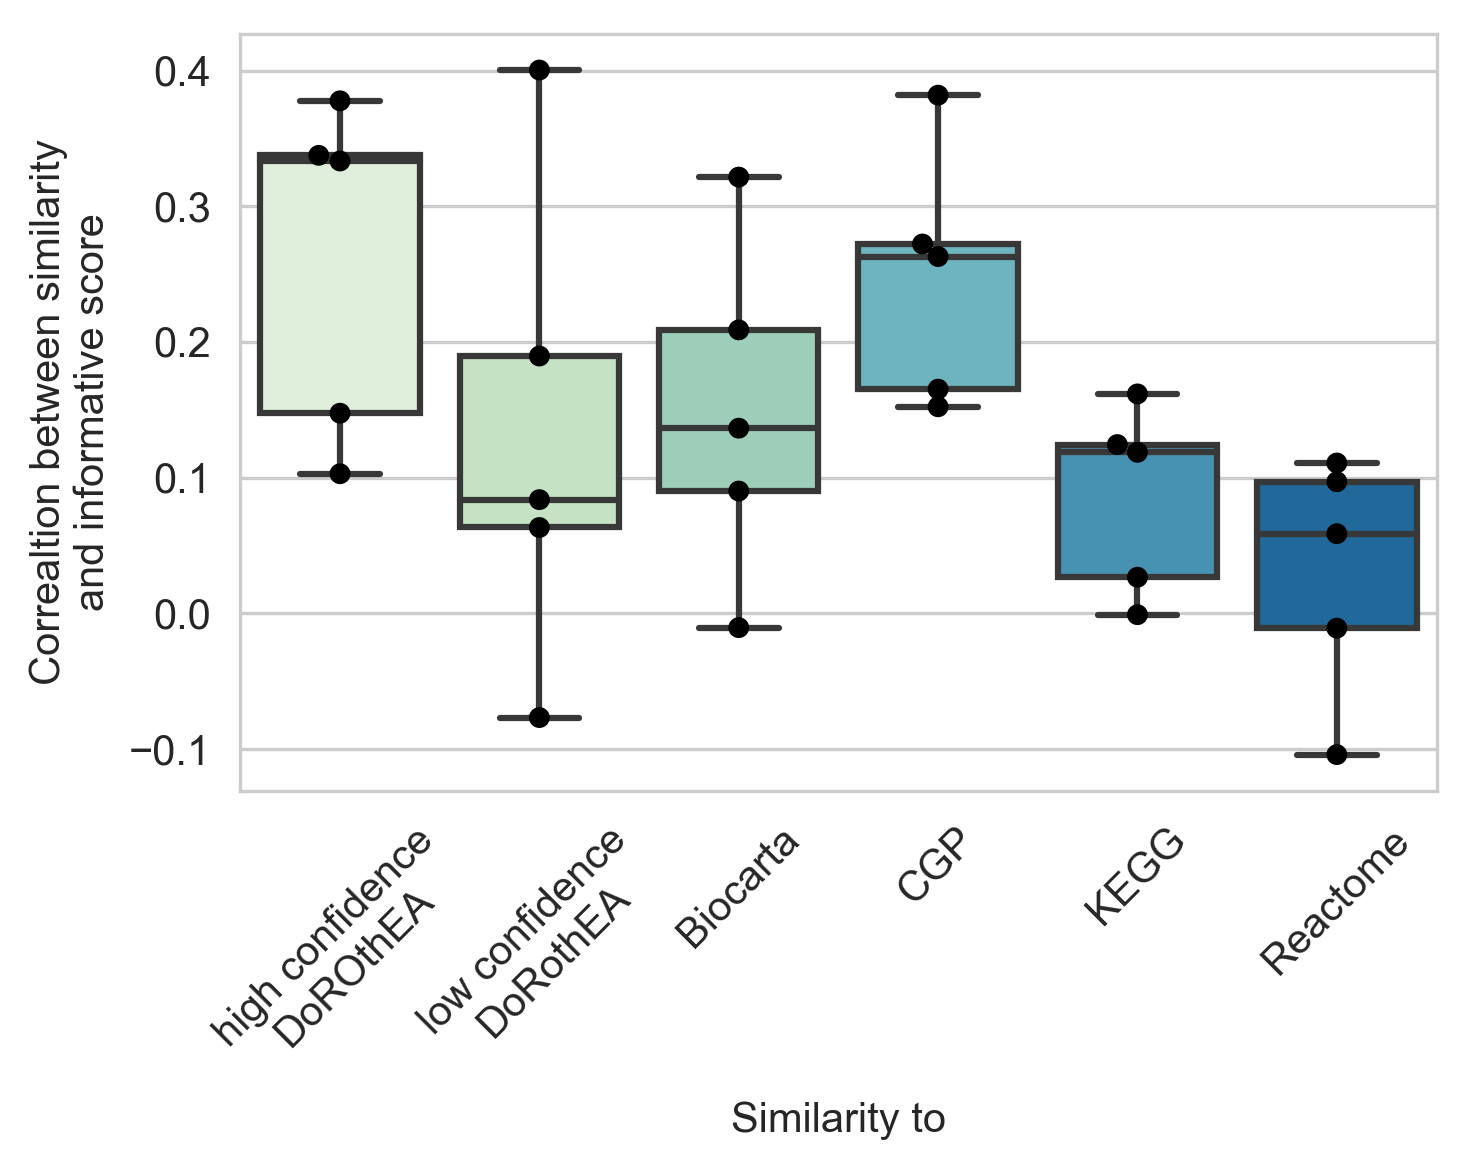

In [21]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='jaccard')
#plt.savefig('../figures/raw/Fig4B.pdf')

In [96]:
def plot_correaltions_all(dname1,abs_type,rnd_fil,bname,sim_type,name1,name2):
    activity1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    activity2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname2:
        fname=dname1+rnd_fil+'_'+dname2+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname2+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname2:
        similarity1=similarity.max(1)
        similarity2=similarity.max(0)
    else:
        similarity1=similarity.max(0)
        similarity2=similarity.max(1)
    sets1=list(set(activity1.index)&set(similarity1.index))
    sets2=list(set(activity2.index)&set(similarity2.index))
    activity1=activity1[sets1]
    activity2=activity2[sets2]
    similarity1=similarity1[sets1]
    similarity2=similarity2[sets2]
    colors=sns.color_palette('GnBu',2)
    f,axs=plt.subplots(1,2,figsize=(8,4),dpi=300)
    sns.regplot(similarity1,activity1,ax=axs[0],color=colors[0])
    axs[0].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name1,name2))
    axs[0].set_ylabel('Informative score of %s gene sets' % name1)

    sns.regplot(similarity2,activity2,ax=axs[1],color=colors[1])
    axs[1].set_xlabel('Similarity of %s gene sets to %s\n(Jaccard index)' % (name2,name1))
    axs[1].set_ylabel('Informative score of %s gene sets' % name2)
    print(pcor(similarity1,activity1))
    print(pcor(similarity2,activity2))
    plt.tight_layout()

In [195]:
from scipy.stats import spearmanr as scor

In [395]:
dname1='KEGG'
abs_type,rnd_fil,bname,sim_type = '_abs','_filtered','gdsc','overlap'
dnames=list(set(['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP'])-set([dname1]))

SpearmanrResult(correlation=-0.11256784343615715, pvalue=1.3114057926533058e-15)


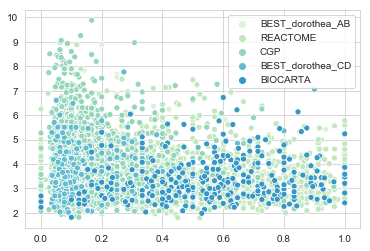

In [396]:
activities=pd.Series()
similiarities=pd.Series()
dset_names=[]
for dname in dnames:
    activity=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname,rnd_fil,abs_type),
                     sep=',',header=0,index_col=0).abs().max()
    if dname1<dname:
        fname=dname1+rnd_fil+'_'+dname+rnd_fil+'_'+sim_type+'.csv'
    else:
        fname=dname+rnd_fil+'_'+dname1+rnd_fil+'_'+sim_type+'.csv'
    similarity=pd.read_csv('../results/similarity/'+fname,sep=',',header=0,index_col=0)
    if dname1<dname:
        similarity=similarity.max(0)
    else:
        similarity=similarity.max(1)
    sets=list(set(activity.index)&set(similarity.index))    
    activities=pd.concat([activities,activity[sets]])   
    similiarities=pd.concat([similiarities,similarity[sets]])
    dset_names+=[dname]*len(sets)
    
    
    

    

sns.scatterplot(similiarities,activities,hue=dset_names)
print(scor(activities,similiarities))

In [364]:
activities

ATF2                              6.574205
PRDM14                            4.183426
NFKB1                            10.897340
FOS                               6.469791
TAL1                              4.595871
MYCN                              5.474193
IRF1                              9.714405
FOXP1                             4.689627
AR                                6.366020
CDX2                              5.079162
CEBPA                             5.034081
E2F2                              5.493856
HIF1A                            11.240504
STAT2                            10.000782
STAT5A                            6.382211
CREB1                             3.871012
FOXL2                             9.806265
JUN                               9.092632
FOSL1                             7.414426
USF2                              3.847374
TCF3                              3.484746
SREBF2                            3.267412
TFAP2C                            7.733686
SREBF1     

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.201694  0.040339  2.917655  0.034970
dd_to      1.0  0.047078  0.047078  3.405075  0.077911
Residual  23.0  0.317993  0.013826       NaN       NaN

Intercept                 0.002384
to[T.BEST_dorothea_CD]    0.488029
to[T.BIOCARTA]            0.038510
to[T.CGP]                 0.018720
to[T.KEGG]                0.163918
to[T.REACTOME]            0.022101
dtype: float64

Intercept                 0.194410
to[T.BEST_dorothea_CD]   -0.057027
to[T.BIOCARTA]           -0.177296
to[T.CGP]                -0.204197
to[T.KEGG]               -0.116272
to[T.REACTOME]           -0.198142
dtype: float64


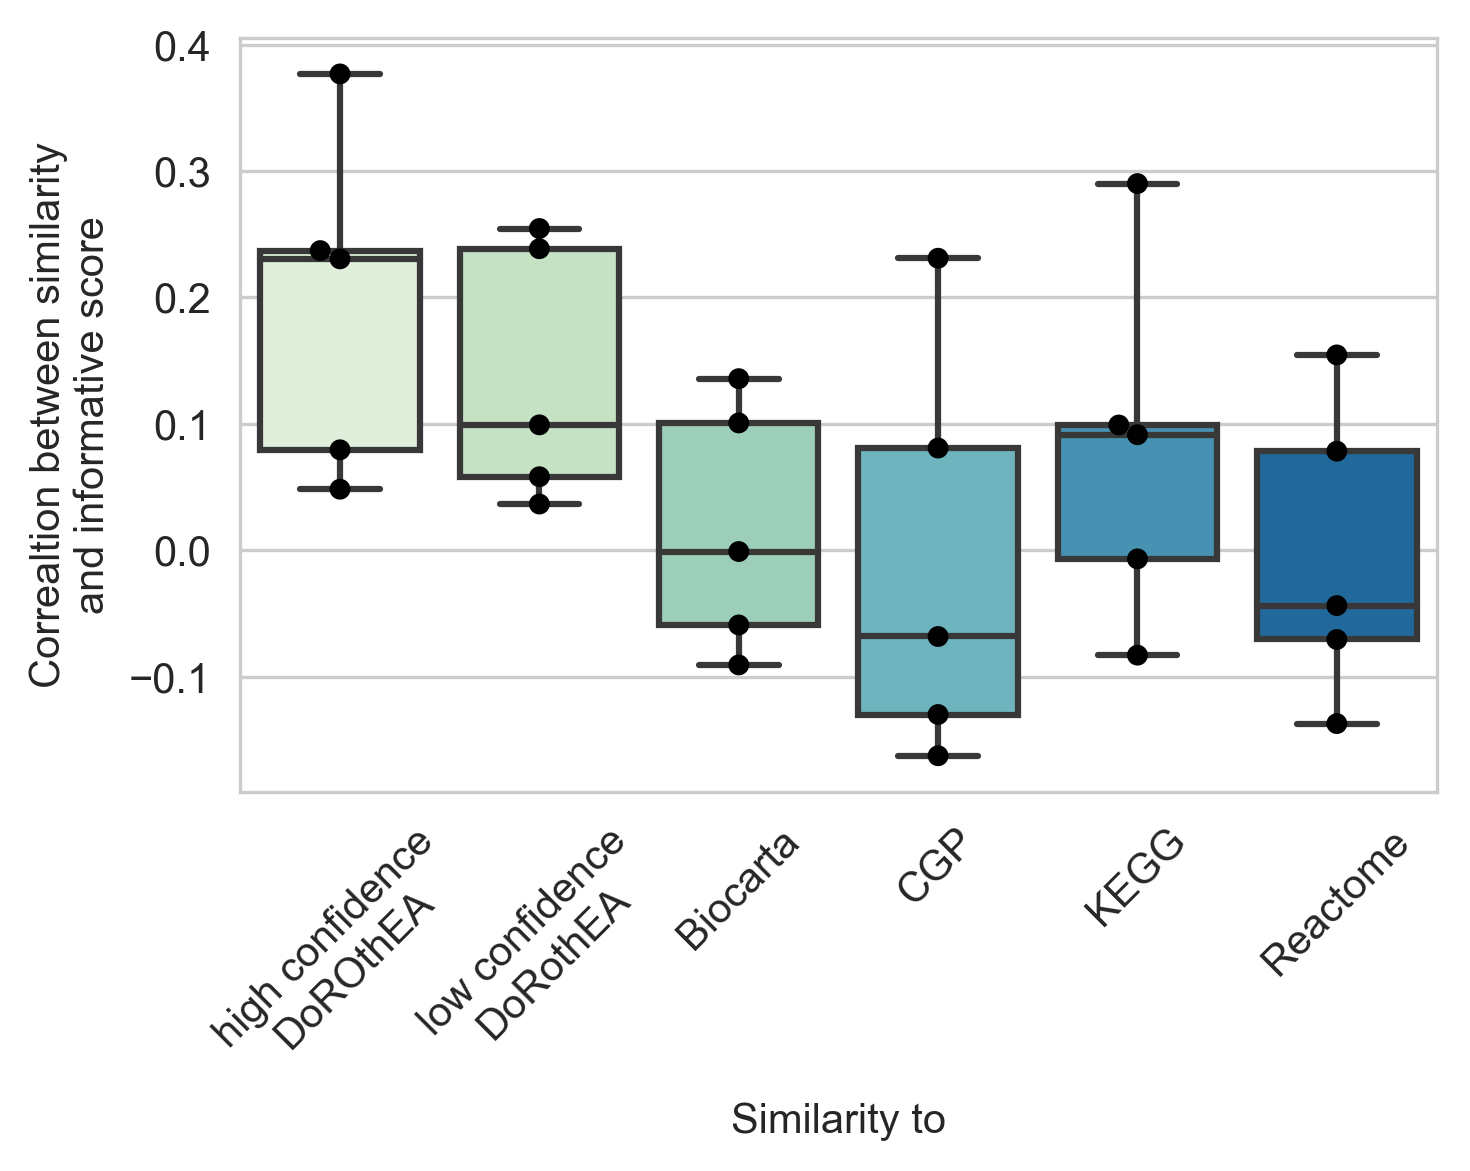

In [15]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='jaccard')
#plt.savefig('../figures/raw/Fig4C.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.077017  0.015403  1.111900  0.381460
dd_to      1.0  0.083902  0.083902  6.056533  0.021784
Residual  23.0  0.318624  0.013853       NaN       NaN

Intercept                 6.790083e-07
to[T.BEST_dorothea_CD]    1.458904e-01
to[T.BIOCARTA]            5.215336e-01
to[T.CGP]                 5.759356e-01
to[T.KEGG]                3.376099e-03
to[T.REACTOME]            5.697377e-03
dtype: float64

Intercept                 0.316471
to[T.BEST_dorothea_CD]   -0.100914
to[T.BIOCARTA]           -0.043678
to[T.CGP]                -0.038074
to[T.KEGG]               -0.218425
to[T.REACTOME]           -0.203839
dtype: float64


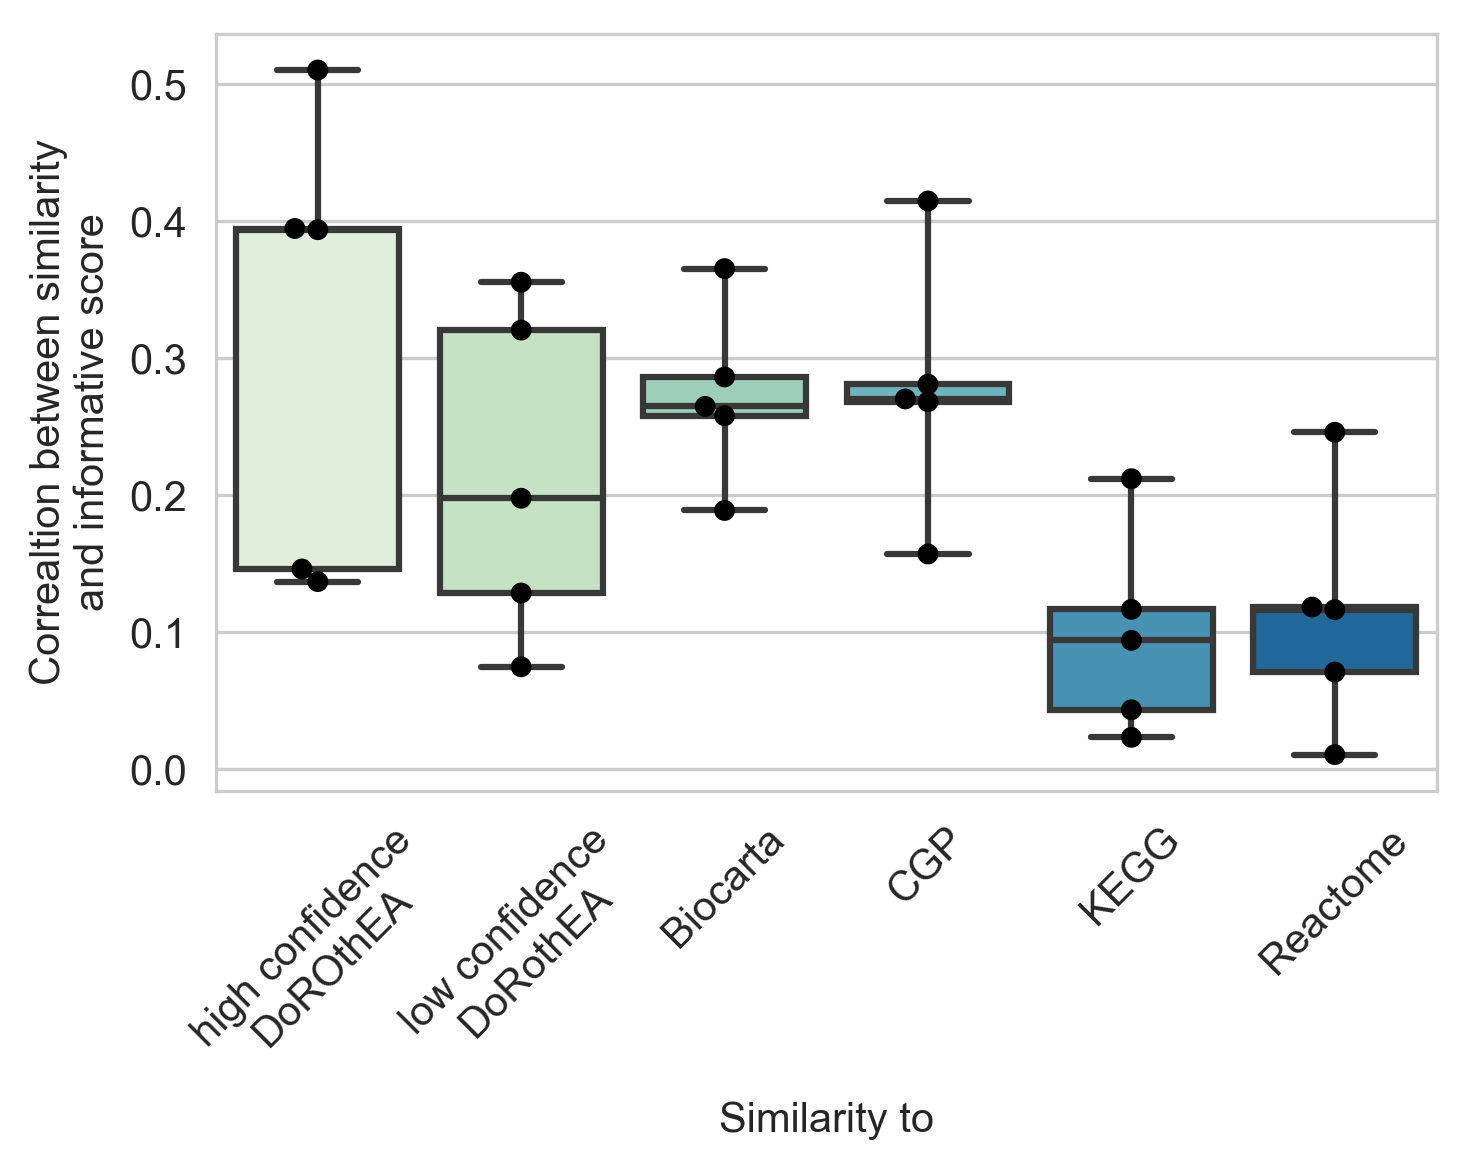

In [152]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6A.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.107250  0.021450  1.768922  0.159191
dd_to      1.0  0.035920  0.035920  2.962224  0.098657
Residual  23.0  0.278897  0.012126       NaN       NaN

Intercept                 0.011480
to[T.BEST_dorothea_CD]    0.410558
to[T.BIOCARTA]            0.399731
to[T.CGP]                 0.426423
to[T.KEGG]                0.469174
to[T.REACTOME]            0.079341
dtype: float64

Intercept                 0.140582
to[T.BEST_dorothea_CD]   -0.060831
to[T.BIOCARTA]           -0.062271
to[T.CGP]                 0.058764
to[T.KEGG]               -0.053419
to[T.REACTOME]           -0.133084
dtype: float64


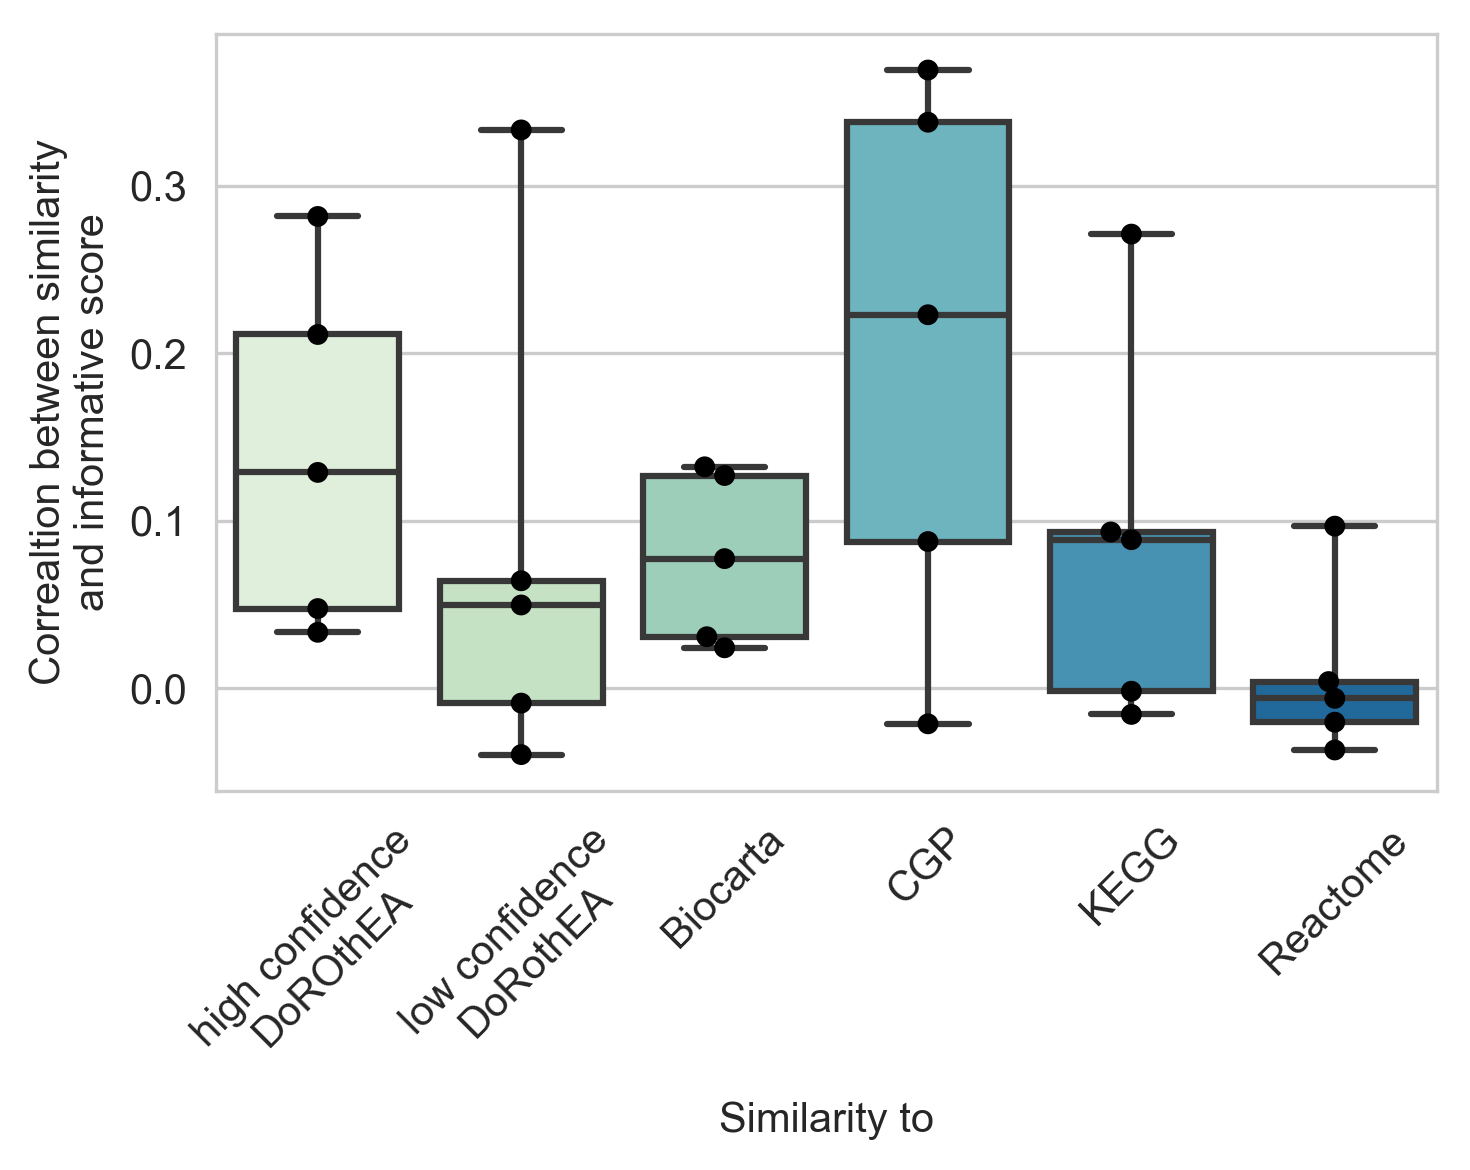

In [153]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6B.pdf')

            df    sum_sq   mean_sq         F   PR(>F)
of         5.0  0.079456  0.015891  1.776282  0.15762
dd_to      1.0  0.048896  0.048896  5.465447  0.02846
Residual  23.0  0.205765  0.008946       NaN      NaN

Intercept                 0.000011
to[T.BEST_dorothea_CD]    0.201111
to[T.BIOCARTA]            0.775569
to[T.CGP]                 0.488627
to[T.KEGG]                0.009825
to[T.REACTOME]            0.021707
dtype: float64

Intercept                 0.216350
to[T.BEST_dorothea_CD]   -0.072649
to[T.BIOCARTA]           -0.015936
to[T.CGP]                 0.038871
to[T.KEGG]               -0.155002
to[T.REACTOME]           -0.135696
dtype: float64


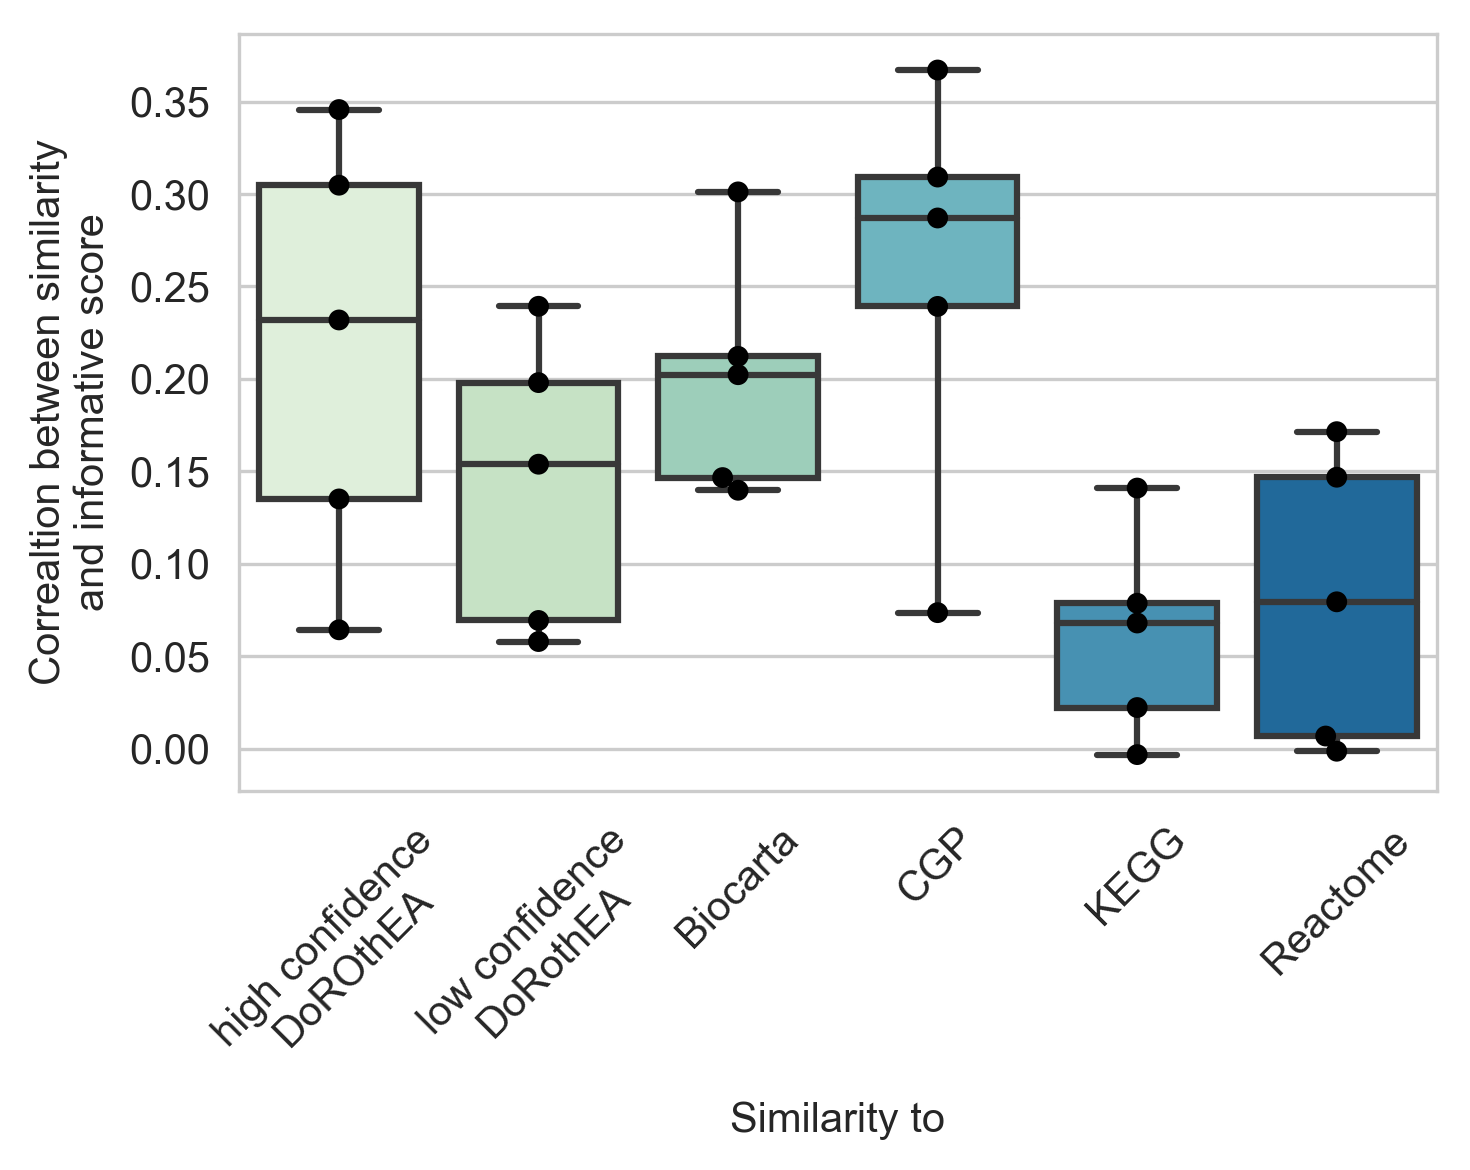

In [154]:
results=analyse_pairwise_correaltions(abs_type='',bname='progeny',sim_type='overlap')
plt.savefig('../figures/raw/SFig6C.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.152562  0.030512  2.741758  0.043824
dd_to      1.0  0.050847  0.050847  4.568960  0.043412
Residual  23.0  0.255961  0.011129       NaN       NaN

Intercept                 0.000616
to[T.BEST_dorothea_CD]    0.460654
to[T.BIOCARTA]            0.075047
to[T.CGP]                 0.039132
to[T.KEGG]                0.065345
to[T.REACTOME]            0.052692
dtype: float64

Intercept                 0.211831
to[T.BEST_dorothea_CD]   -0.057043
to[T.BIOCARTA]           -0.141573
to[T.CGP]                -0.165998
to[T.KEGG]               -0.146922
to[T.REACTOME]           -0.155060
dtype: float64


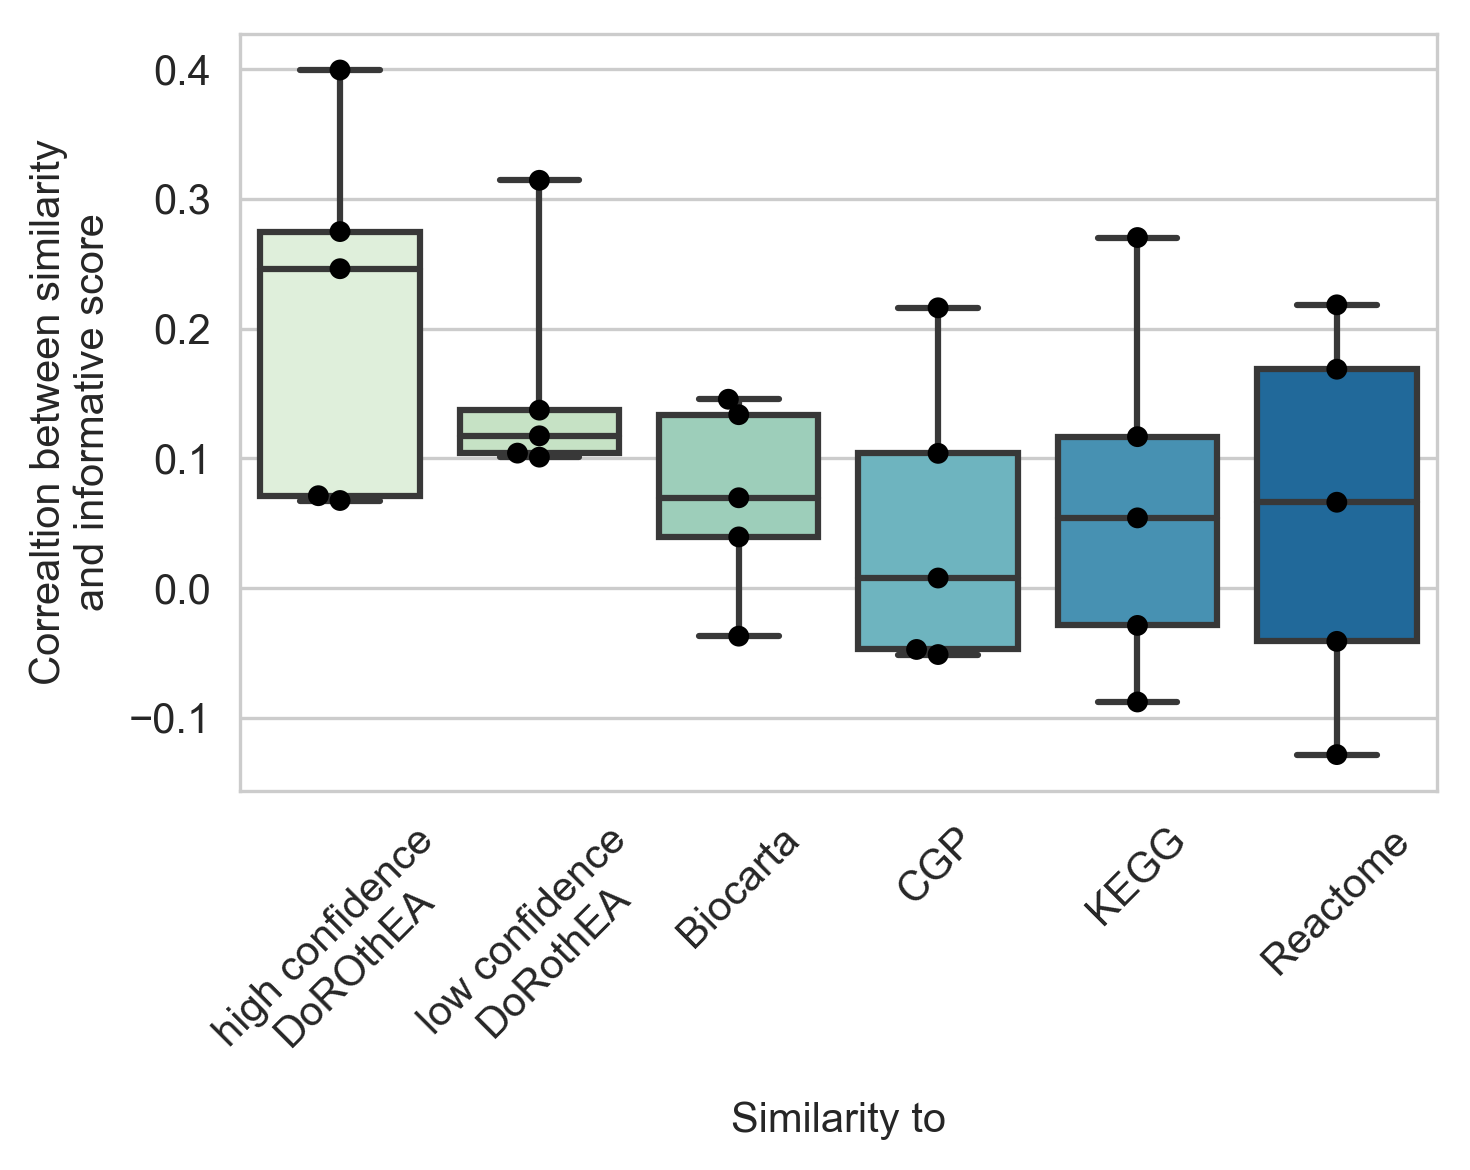

In [155]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6D.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.140079  0.028016  4.838764  0.003612
dd_to      1.0  0.034005  0.034005  5.873180  0.023647
Residual  23.0  0.133167  0.005790       NaN       NaN

Intercept                 0.011084
to[T.BEST_dorothea_CD]    0.408276
to[T.BIOCARTA]            0.068727
to[T.CGP]                 0.195974
to[T.KEGG]                0.126438
to[T.REACTOME]            0.012046
dtype: float64

Intercept                 0.119508
to[T.BEST_dorothea_CD]   -0.051681
to[T.BIOCARTA]           -0.117019
to[T.CGP]                -0.081674
to[T.KEGG]               -0.097220
to[T.REACTOME]           -0.166791
dtype: float64


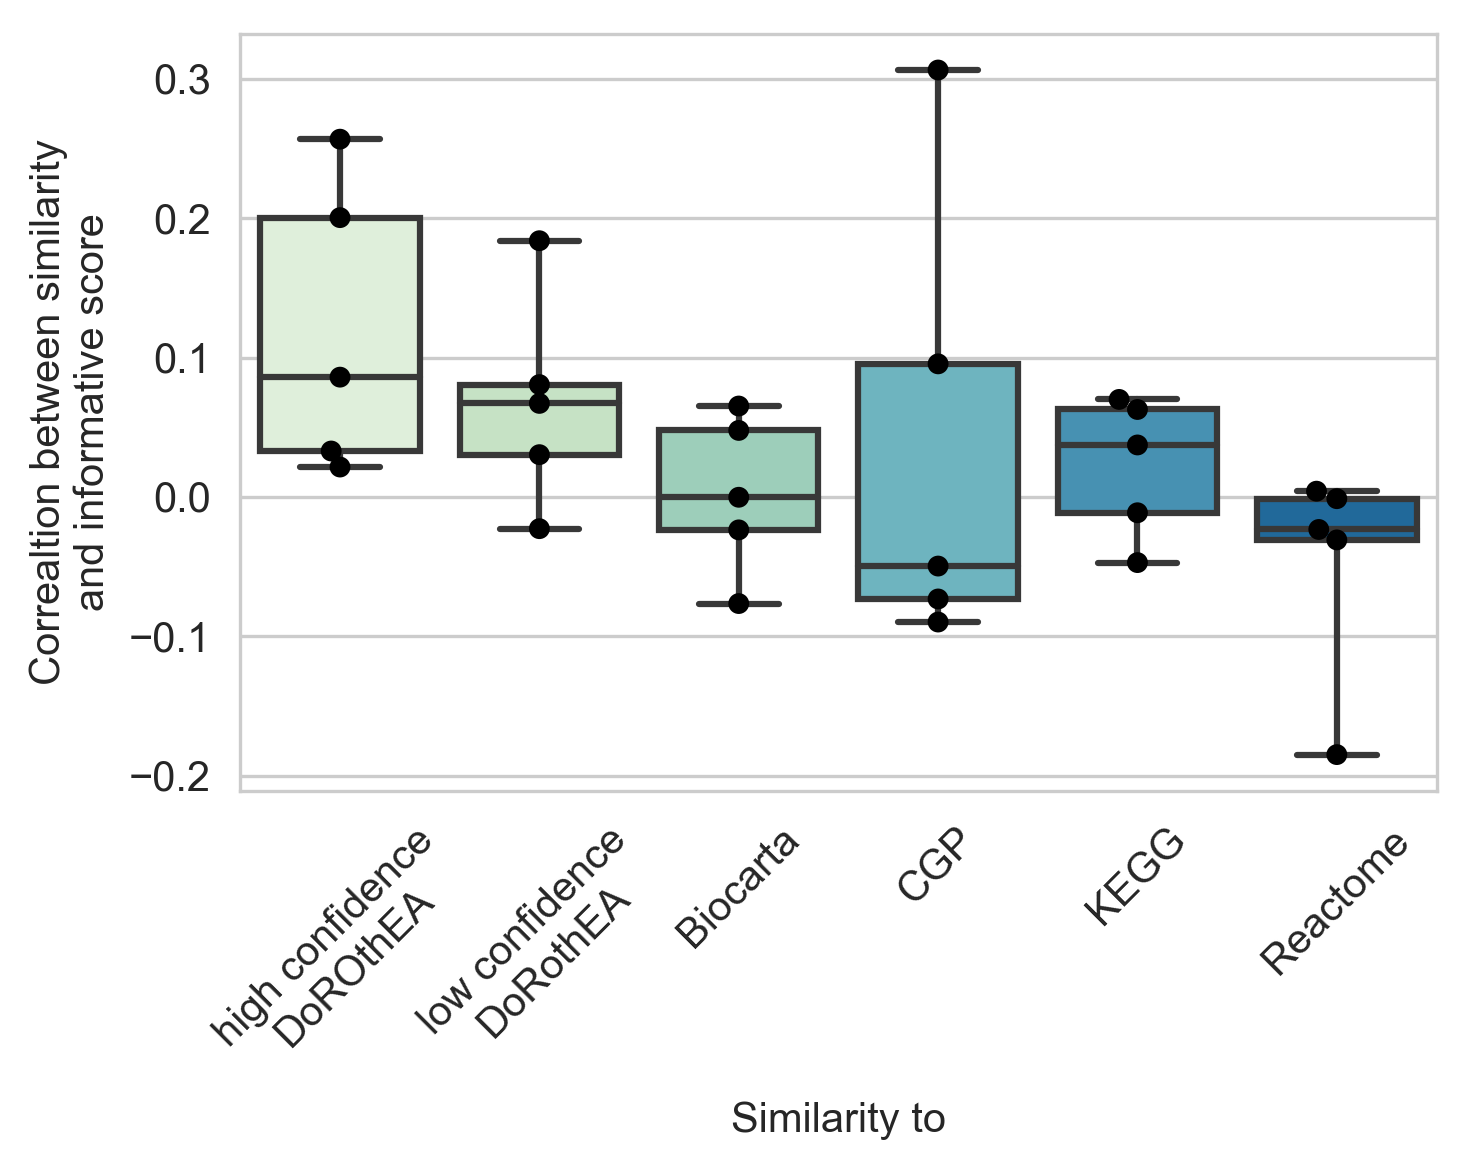

In [156]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='jaccard')
plt.savefig('../figures/raw/SFig6E.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.074326  0.014865  2.328308  0.075273
dd_to      1.0  0.023156  0.023156  3.626955  0.069433
Residual  23.0  0.146844  0.006385       NaN       NaN

Intercept                 0.002756
to[T.BEST_dorothea_CD]    0.156766
to[T.BIOCARTA]            0.253358
to[T.CGP]                 0.123217
to[T.KEGG]                0.065872
to[T.REACTOME]            0.005153
dtype: float64

Intercept                 0.126361
to[T.BEST_dorothea_CD]   -0.078297
to[T.BIOCARTA]           -0.062685
to[T.CGP]                -0.085570
to[T.KEGG]               -0.103225
to[T.REACTOME]           -0.164860
dtype: float64


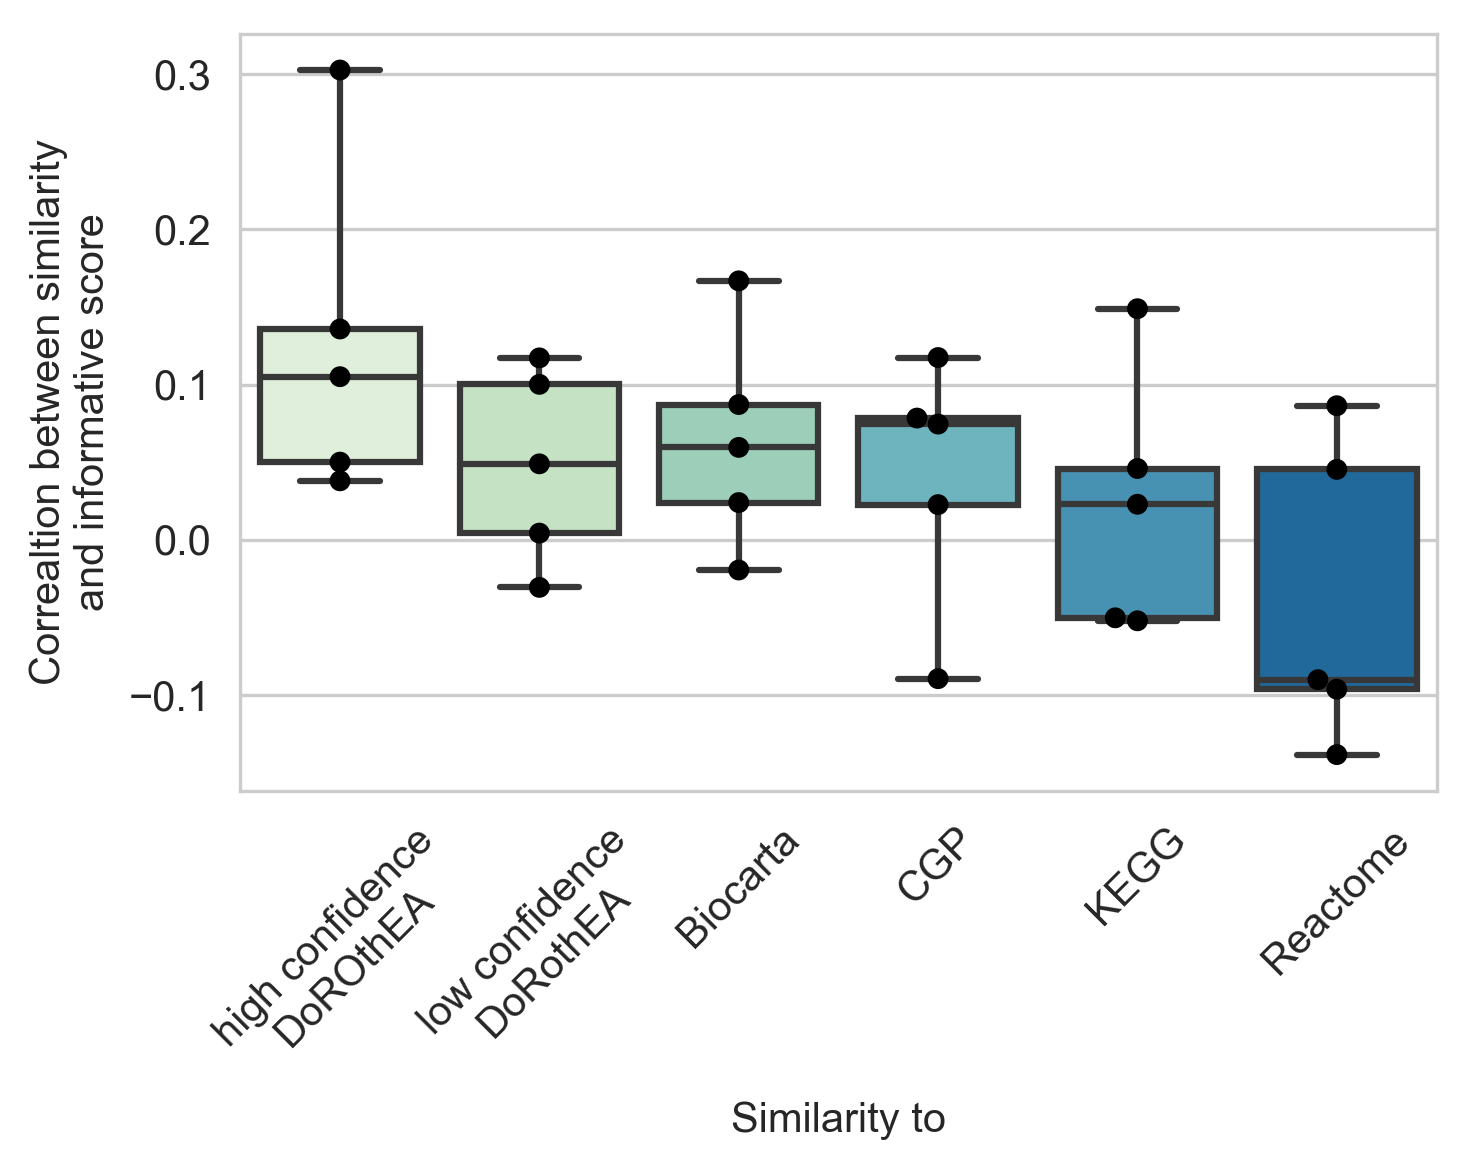

In [157]:
results=analyse_pairwise_correaltions(abs_type='',bname='gdsc',sim_type='overlap')
plt.savefig('../figures/raw/SFig6F.pdf')

            df    sum_sq   mean_sq         F    PR(>F)
of         5.0  0.013324  0.002665  2.363460  0.071853
dd_to      1.0  0.000285  0.000285  0.252708  0.619955
Residual  23.0  0.025933  0.001128       NaN       NaN

Intercept                 0.479926
to[T.BEST_dorothea_CD]    0.533319
to[T.BIOCARTA]            0.998178
to[T.CGP]                 0.031422
to[T.KEGG]                0.367380
to[T.REACTOME]            0.128597
dtype: float64

Intercept                 0.011257
to[T.BEST_dorothea_CD]   -0.014022
to[T.BIOCARTA]            0.000051
to[T.CGP]                -0.050699
to[T.KEGG]               -0.020381
to[T.REACTOME]           -0.034916
dtype: float64


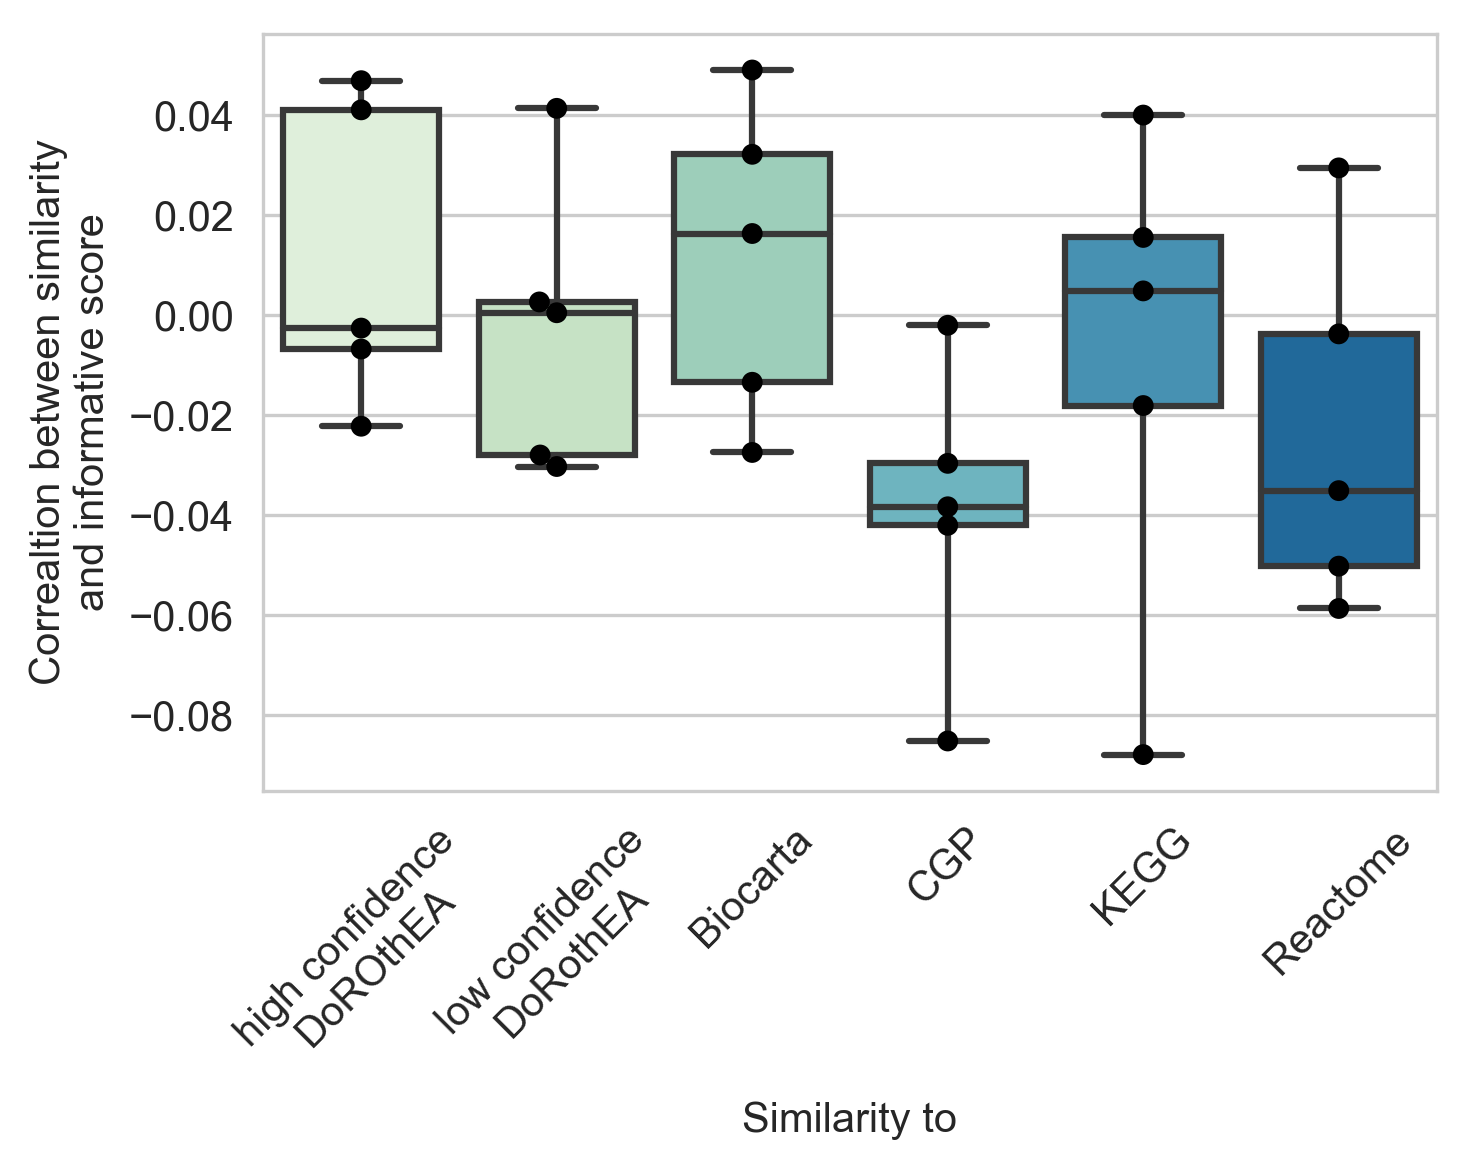

In [16]:
results=analyse_pairwise_correaltions(abs_type='_abs',bname='progeny',sim_type='jaccard',rnd_fil='_random')
plt.savefig('../figures/raw/SFig7B.pdf')

In [17]:
def plot_overlap(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs',rtype='_filtered'):
    good1=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname1,rtype,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname2,rtype,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_overlap_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname1,dname2,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s_filtered_minus_%s_filtered%s.csv' % (bname,dname2,dname1,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname1,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s_filtered%s.csv' % (bname,dname2,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
    
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    
    results=pd.DataFrame(index=range(len(score_overlap)))
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s%s.csv' % (dname1,rtype)sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s%s.csv' % (dname2,rtype),sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s%a_overlap_%s%s.csv' % (dname1,rtype,dname2,rtype),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_overlap_%s%s.csv' % (dname2,rtype,dname1,rtype),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_minus_%s%s.csv' % (dname1,rtype,dname2,rtype),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_minus_%s%s.csv' % (dname2,rtype,dname1,rtype),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    print(dname1,mwu(results[dname1],results[dname1+' - '+dname2]))
    print(dname1,np.median(results[dname1]),np.median(results[dname1+' - '+dname2]))
    
    print(dname2,mwu(results[dname2],results[dname2+' - '+dname1]))
    print(dname2,np.median(results[dname2]),np.median(results[dname2+' - '+dname1]))
    #print(mwu(results[dname1+' - '+dname2],results[dname2+' - '+dname1]))
    #print(mwu(results[dname1],results[dname2]))
    #print(mwu(results_genesets[dname1+' - '+dname2],results_genesets[dname2+' - '+dname1]))
    results=pd.melt(results)
    results.columns=['Gene set','Informative score']
    results_genesets=pd.melt(results_genesets)
    results_genesets.columns=['Gene set','Size']
    return results

In [18]:
dname1='BEST_dorothea_AB'
dname2='BIOCARTA'
results=plot_overlap(dname1=dname1,dname2=dname2,bname='progeny',atype='_abs')

BEST_dorothea_AB MannwhitneyuResult(statistic=31166.0, pvalue=6.574327063028165e-05)
BEST_dorothea_AB 7.534790336442037 7.369807153572293
BIOCARTA MannwhitneyuResult(statistic=9976.0, pvalue=1.2717163210201903e-51)
BIOCARTA 6.840521003452102 4.780324912794391


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


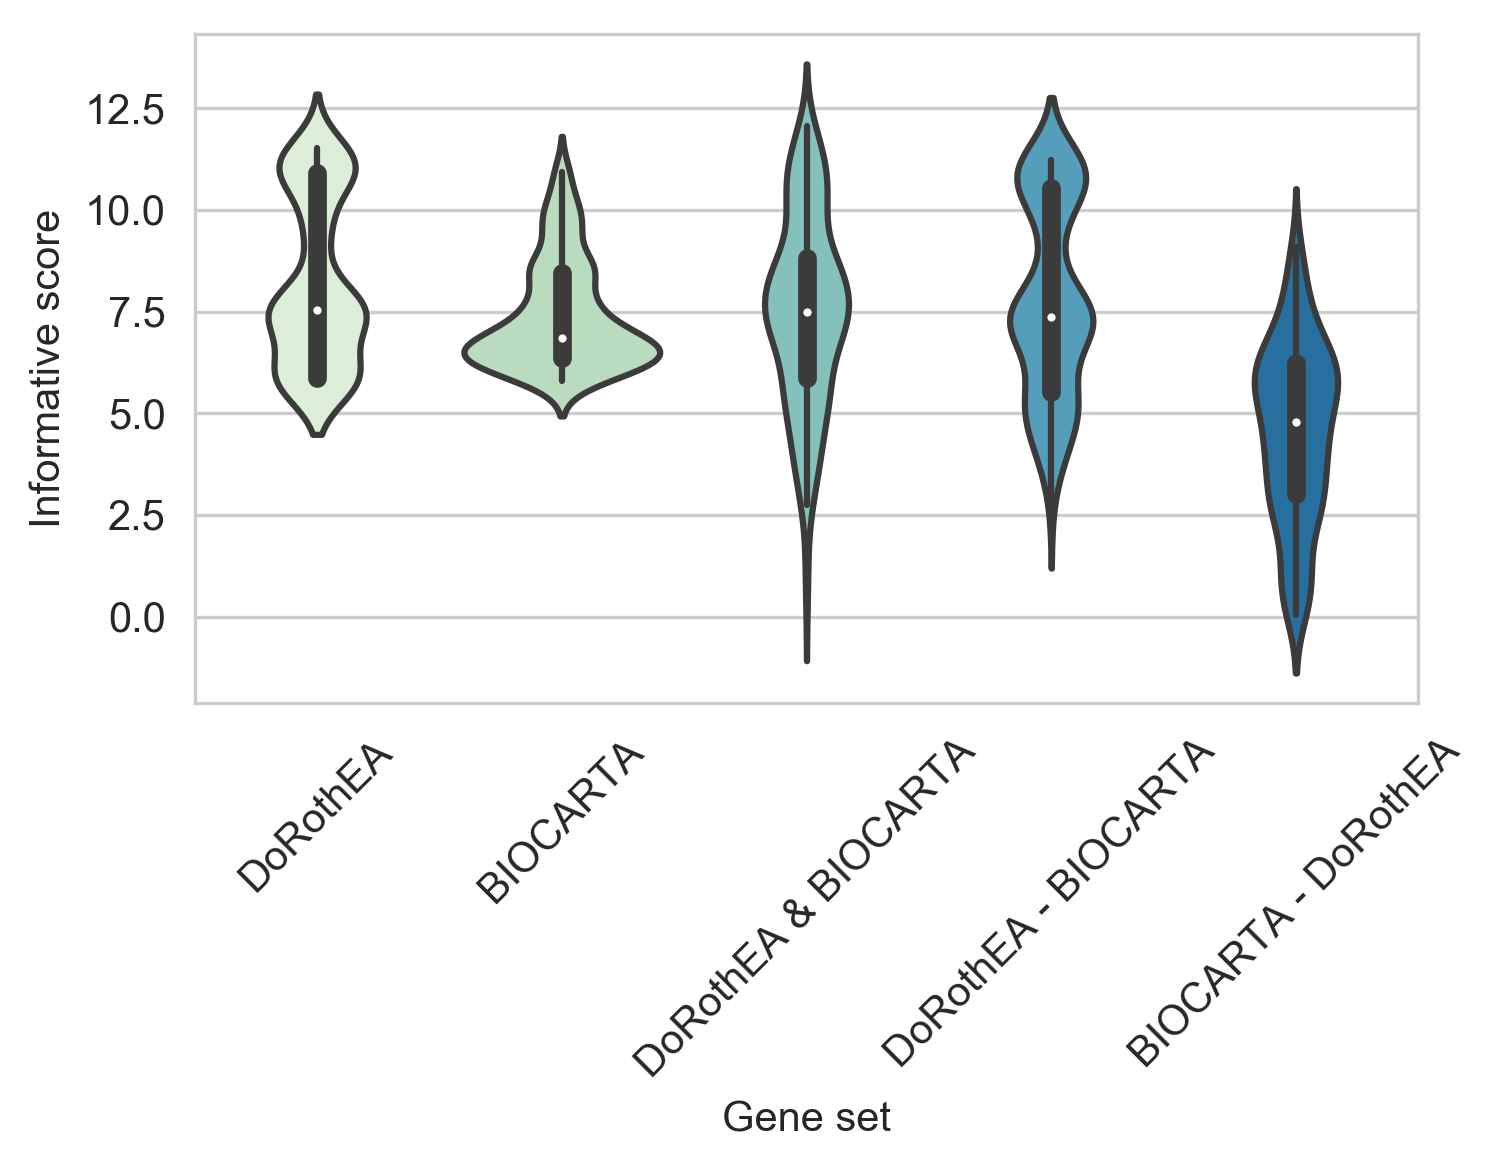

In [19]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',5)
sns.violinplot(x='Gene set',y='Informative score',data=results)
plt.xticks(rotation=45)
plt.xticks([0,1,2,3,4],['DoRothEA','BIOCARTA','DoRothEA & BIOCARTA','DoRothEA - BIOCARTA','BIOCARTA - DoRothEA'])
plt.tight_layout()
plt.savefig('../figures/raw/Fig5A.pdf')

In [39]:
all_size=pd.DataFrame(columns=['Set','Size'])
all_scores=pd.DataFrame(columns=['Set','Score'])
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
for geneset in datasets:
    size=pd.read_csv('../results/genesets/single/csvs/'+geneset+'_filtered.csv',sep=',',header=0,index_col=0)['Set'].value_counts()
    size=pd.DataFrame(size)
    size['X']=geneset
    size.columns=['Size','Set']
    size=size[['Set','Size']]
    all_size=pd.concat([all_size,size])
    score=pd.read_csv('../results/benchmark/z_scores/gdsc/single/'+geneset+'_filtered_abs.csv',
                   sep=',',header=0,index_col=0).abs().max()
    score=pd.DataFrame(score)
    score['X']=geneset
    score.columns=['Score','Set']
    score=score[['Set','Score']]
    all_scores=pd.concat([all_scores,score])
    
all_size=all_size.loc[all_scores.index]
all_size=all_size.iloc[::-1,]
all_scores=all_scores.iloc[::-1,]

In [40]:
all_scores['Size']=all_size['Size'].astype(float)
all_scores['logSize']=np.log10(all_scores['Size'])

(0.13029348512935182, 4.174684651733344e-21)
CGP (0.14086132959248235, 2.0216685899508705e-14)
REACTOME (0.032489696217365895, 0.21725320586663438)
BIOCARTA (-0.0046332561100958375, 0.9374904537479178)
KEGG (0.06467440087685468, 0.3870481747209613)
BEST_dorothea_CD (-0.056271493162841635, 0.3765979233693769)
BEST_dorothea_AB (0.05097408191016266, 0.5986158990603003)


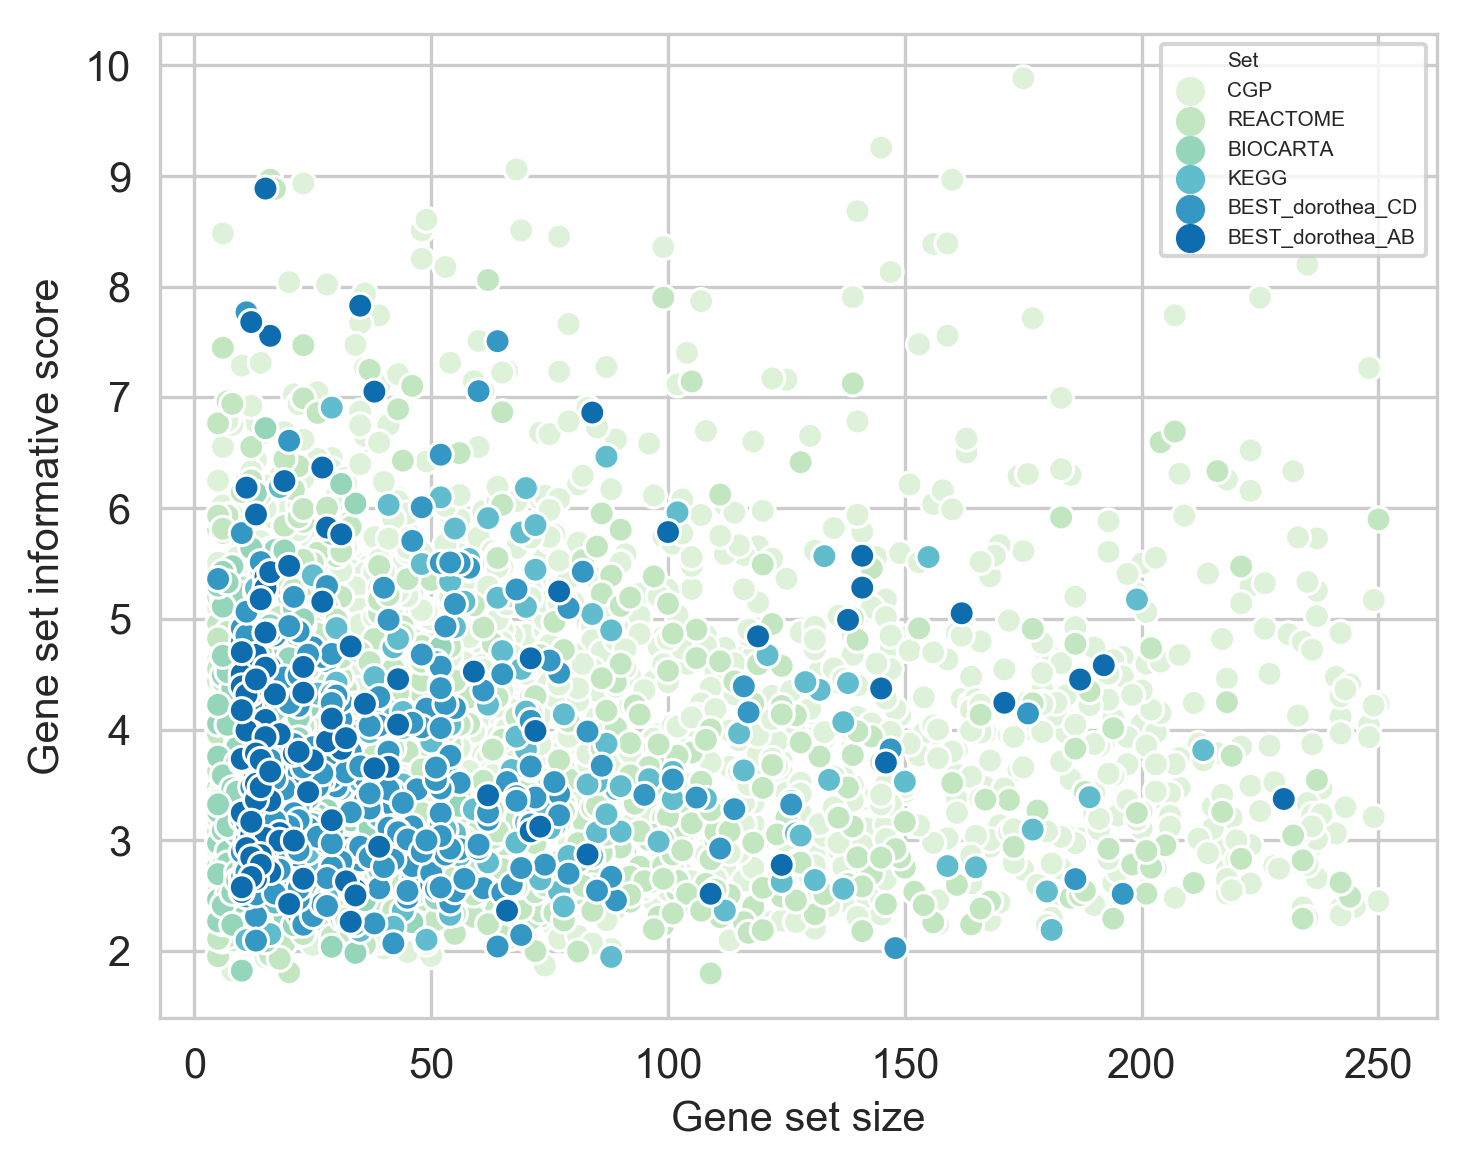

In [41]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',6)
sns.scatterplot(all_size['Size'],all_scores['Score'],hue=all_scores['Set'])
plt.xlabel('Gene set size')
plt.ylabel('Gene set informative score')
plt.legend(prop={"size":5})
print(pcor(all_size['Size'],all_scores['Score']))
for s in all_scores['Set'].unique():
    fil=all_scores['Set']==s
    print(s,pcor(all_size['Size'][fil],all_scores['Score'][fil]))
plt.tight_layout()
plt.savefig('../figures/raw/SFig7A.pdf')

In [315]:
def calc_everything(dname1='BEST_dorothea_AB',dname2='BIOCARTA',bname='progeny',atype='_abs',rtype='_filtered'):
    good1=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname1,rtype,atype),
                 sep=',',header=0,index_col=0)
    good2=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname2,rtype,atype),
                 sep=',',header=0,index_col=0)
    pathways=[]
    good1set=[]
    good2set=[]
    for s1 in good1.columns:
        good_pathways=good1.index[good1[s1]==1]
        for pw in good_pathways:
            good2.columns[good2.loc[pw]==1]
            for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
    goods=pd.DataFrame(index=range(len(pathways)))
    goods[dname1]=good1set
    goods[dname2]=good2set
    goods['Group']=pathways
    
    if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
    else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
    if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_overlap_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
    else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_overlap_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
    score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
    score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rtype,atype),
                      sep=',',header=0,index_col=0).abs()
    score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rtype,atype),
                      sep=',',header=0,index_col=0).abs()
    all_sets=list(set(score_overlap.columns)&set(score_1minus2.columns)&set(score_2minus1.columns)&set(goods['Name']))
    score_overlap=score_overlap[all_sets]
    score_1minus2=score_1minus2[all_sets]
    score_2minus1=score_2minus1[all_sets]
    fil=np.in1d(goods['Name'],all_sets)
    goods=goods[fil]
   
    row_index=pd.Series(range(len(score_overlap.index)),index=score_overlap.index)
    col_index=pd.Series(range(len(score_overlap.columns)),index=score_overlap.columns)
    score_overlap=score_overlap.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_1minus2.index)),index=score_1minus2.index)
    col_index=pd.Series(range(len(score_1minus2.columns)),index=score_1minus2.columns)
    score_1minus2=score_1minus2.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score_2minus1.index)),index=score_2minus1.index)
    col_index=pd.Series(range(len(score_2minus1.columns)),index=score_2minus1.columns)
    score_2minus1=score_2minus1.values[list(row_index[goods['Group']].values),list(col_index[goods['Name']].values)]

    row_index=pd.Series(range(len(score1.index)),index=score1.index)
    col_index=pd.Series(range(len(score1.columns)),index=score1.columns)
    score1=score1.values[list(row_index[goods['Group']].values),list(col_index[goods[dname1]].values)]

    row_index=pd.Series(range(len(score2.index)),index=score2.index)
    col_index=pd.Series(range(len(score2.columns)),index=score2.columns)
    score2=score2.values[list(row_index[goods['Group']].values),list(col_index[goods[dname2]].values)]
    results=pd.DataFrame(index=range(len(score_overlap)))
    
    results[dname1]=score1
    results[dname2]=score2
    results[dname1+' & '+dname2]=score_overlap
    results[dname1+' - '+dname2]=score_1minus2
    results[dname2+' - '+dname1]=score_2minus1
    
    geneset1=pd.read_csv('../results/genesets/single/csvs/%s%s.csv' % (dname1,rtype),sep=',',header=0,index_col=0)
    geneset2=pd.read_csv('../results/genesets/single/csvs/%s%s.csv' % (dname2,rtype),sep=',',header=0,index_col=0)
    if dname1 < dname2:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_overlap_%s%s.csv' % (dname1,rtype,dname2,rtype),
                                   sep=',',header=0,index_col=0)
    else:
        geneset_overlap=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_overlap_%s%s.csv' % (dname2,rtype,dname1,rtype),
                                   sep=',',header=0,index_col=0)
    geneset_1minus2=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_minus_%s%s.csv' % (dname1,rtype,dname2,rtype),
                                sep=',',header=0,index_col=0)
    geneset_2minus1=pd.read_csv('../results/genesets/overlap/csvs_final/%s%s_minus_%s%s.csv' % (dname2,rtype,dname1,rtype),
                                sep=',',header=0,index_col=0)
    geneset1=geneset1['Set'].value_counts()
    geneset2=geneset2['Set'].value_counts()
    geneset_overlap=geneset_overlap['Set'].value_counts()
    geneset_1minus2=geneset_1minus2['Set'].value_counts()
    geneset_2minus1=geneset_2minus1['Set'].value_counts()
    geneset1=geneset1[goods[dname1]].values
    geneset2=geneset2[goods[dname2]].values
    geneset_overlap=geneset_overlap[goods['Name']].values
   
    geneset_1minus2=geneset_1minus2[goods['Name']].values
    geneset_2minus1=geneset_2minus1[goods['Name']].values
    results_genesets=pd.DataFrame(index=range(len(geneset_overlap)))
    
    results_genesets[dname1]=geneset1
    results_genesets[dname2]=geneset2
    results_genesets[dname1+' & '+dname2]=geneset_overlap
    results_genesets[dname1+' - '+dname2]=geneset_1minus2
    results_genesets[dname2+' - '+dname1]=geneset_2minus1
    
    score1= results[dname1+' - '+dname2] - results[dname1]
    score2= results[dname2+' - '+dname1] - results[dname2]
    
    size1= results_genesets[dname1]
    size2= results_genesets[dname2]
    
    return score1,score2,size1,size2

In [4]:
dname1='BEST_dorothea_AB'
dname2='BIOCARTA'
bname='progeny'
atype='_abs'
rtype='_filtered'

In [5]:
good1=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname1,rtype,atype),
                 sep=',',header=0,index_col=0)
good2=pd.read_csv('../results/genesets/good/%s/%s%s%s.csv' % (bname,dname2,rtype,atype),
                 sep=',',header=0,index_col=0)

In [9]:

pathways=[]
good1set=[]
good2set=[]
for s1 in good1.columns:
    good_pathways=good1.index[good1[s1]==1]
    for pw in good_pathways:
        good2.columns[good2.loc[pw]==1]
        for pw in good_pathways:
                s2=list(good2.columns[good2.loc[pw]==1])
                n=len(s2)
                pathways+=[pw]*n
                good1set+=[s1]*n
                good2set+=s2
goods=pd.DataFrame(index=range(len(pathways)))
goods[dname1]=good1set
goods[dname2]=good2set
goods['Group']=pathways

In [11]:
if dname1<dname2:
        goods['Name']=goods[dname1]+'*'+goods[dname2]
else:
        goods['Name']=goods[dname2]+'*'+goods[dname1]
if dname1<dname2:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_overlap_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
else:
        score_overlap=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_overlap_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                 sep=',',header=0,index_col=0).abs()
score1=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rtype,atype),
                      sep=',',header=0,index_col=0).abs()
score2=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rtype,atype),
                      sep=',',header=0,index_col=0).abs()

In [13]:
score_2minus1

AR*BIOCARTA_ATM_PATHWAY  AR*BIOCARTA_CARDIACEGF_PATHWAY  \
Hypoxia                  2.246082                        1.426265   
Androgen                 1.809577                        1.345023   
EGFR                     4.195339                        3.026428   
PI3K                     0.023148                        0.234168   
p53                      2.841218                        1.039046   
JAK-STAT                 2.855366                        0.370399   
MAPK                     1.263149                        1.066342   
TGFb                     1.744438                        1.653054   
NFkB                     4.841461                        0.564460   
TNFa                     6.001598                        4.035326   
VEGF                     0.307957                        2.341759   
Trail                    1.768802                        0.807571   
WNT                      1.991631                        0.316672   
Estrogen                 1.427857                        1.202802   

          AR*BIOCARTA_ERK_PATHWAY  AR*BIOCARTA_KERATINOCYTE_PATHWAY  \
Hypoxia                  1.572997                          3.349939   
Androgen                 1.261386                          0.862288   
EGFR                     1.510167                          0.664230   
PI3K                     4.132668                          1.697317   
p53                      0.836994                          1.138986   
JAK-STAT                 3.475732                          1.495601   
MAPK                     3.681759                          0.813837   
TGFb                     1.197944                          0.714785   
NFkB                     2.131382                          5.718300   
TNFa                     1.765863                          6.240163   
VEGF                     0.870713                          0.311623   
Trail                    1.821729                          0.503665   
WNT                      0.765509                          0.249935   
Estrogen                 2.317306                          2.872942   

          AR*BIOCARTA_P53HYPOXIA_PATHWAY  AR*BIOCARTA_PPARA_PATHWAY  \
Hypoxia                         1.196070                   4.824667   
Androgen                        1.290477                   0.333188   
EGFR                            1.286356                   1.880230   
PI3K                            2.893460                   0.369825   
p53                             5.596075                   2.678273   
JAK-STAT                        2.823857                   2.641108   
MAPK                            2.583854                   2.194574   
TGFb                            1.293852                   0.084146   
NFkB                            2.376763                   5.229213   
TNFa                            1.337546                   2.049116   
VEGF                            0.921122                   0.861547   
Trail                           0.660740                   1.738070   
WNT                             1.169854                   0.238158   
Estrogen                        0.562097                   2.301154   

          AR*BIOCARTA_TEL_PATHWAY  ATF2*BIOCARTA_G1_PATHWAY  \
Hypoxia                  0.554621                  0.822509   
Androgen                 1.891397                  1.343205   
EGFR                     0.227688                  1.408233   
PI3K                     0.108202                  0.381668   
p53                      1.940675                  1.756004   
JAK-STAT                 1.450089                  4.058988   
MAPK                     0.878201                  4.835984   
TGFb                     0.885791                  2.283693   
NFkB                     0.561948                  2.387650   
TNFa                     3.103066                  0.331722   
VEGF                     1.857826                  2.114457   
Trail                    0.445615                  0.945865   
WNT                    

In [32]:
a,b,c,d=calc_everything('BEST_dorothea_AB','Biocarta',bname='progeny',atype='_abs',rtype='_random')

In [316]:
results=pd.DataFrame(columns=['Remaining','Removed','Score','Size_orig','Size_removed'])
datasets=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','BIOCARTA','REACTOME','CGP']
for dname1 in datasets:
    for dname2 in datasets:
        print(dname1,dname2)
        if dname1<dname2:
            score1,score2,size1,size2=calc_everything(dname1,dname2,bname='progeny',atype='_abs',rtype='_filtered')
            results1=pd.DataFrame(index=range(len(score1)))
            results1['Remaining']=dname1
            results1['Removed']=dname2
            results1['Score']=score1
            results1['Size_orig']=size1
            results1['Size_removed']=size2

            results2=pd.DataFrame(index=range(len(score2)))
            results2['Remaining']=dname2
            results2['Removed']=dname1
            results2['Score']=score2
            results2['Size_orig']=size2
            results2['Size_removed']=size1

            results=pd.concat([results,results1,results2])

BEST_dorothea_AB BEST_dorothea_AB
BEST_dorothea_AB BEST_dorothea_CD
BEST_dorothea_AB KEGG
BEST_dorothea_AB BIOCARTA
BEST_dorothea_AB REACTOME
BEST_dorothea_AB CGP
BEST_dorothea_CD BEST_dorothea_AB
BEST_dorothea_CD BEST_dorothea_CD
BEST_dorothea_CD KEGG
BEST_dorothea_CD BIOCARTA
BEST_dorothea_CD REACTOME
BEST_dorothea_CD CGP
KEGG BEST_dorothea_AB
KEGG BEST_dorothea_CD
KEGG KEGG
KEGG BIOCARTA
KEGG REACTOME
KEGG CGP
BIOCARTA BEST_dorothea_AB
BIOCARTA BEST_dorothea_CD
BIOCARTA KEGG
BIOCARTA BIOCARTA
BIOCARTA REACTOME
BIOCARTA CGP
REACTOME BEST_dorothea_AB
REACTOME BEST_dorothea_CD
REACTOME KEGG
REACTOME BIOCARTA
REACTOME REACTOME
REACTOME CGP
CGP BEST_dorothea_AB
CGP BEST_dorothea_CD
CGP KEGG


/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


CGP BIOCARTA
CGP REACTOME
CGP CGP


In [317]:
results.shape

(25366, 5)

In [288]:
results['Size_orig']=results['Size_orig'].astype(float)
results['Size_removed']=results['Size_removed'].astype(float)
results.index=range(len(results))

In [289]:
results['DD_orig']=False
fil=np.in1d(results['Remaining'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
results.loc[results.index[fil],'DD_orig']=True

results['DD_rem']=False
fil=np.in1d(results['Removed'],['BEST_dorothea_AB','BEST_dorothea_CD','CGP'])
results.loc[results.index[fil],'DD_rem']=True
results=results.sort_values(['Remaining','Removed'])

In [290]:
model=ols('Score ~ Remaining + Removed + Size_removed + Size_orig',data=results).fit()

In [253]:
model=ols('Score ~  Removed + Remaining',data=results).fit()

In [310]:
model=ols('Score ~  Removed + Remaining',data=results).fit()

In [311]:
print(sm.stats.anova_lm(model))

                 df        sum_sq      mean_sq            F  PR(>F)
Removed         5.0    730.142300   146.028460   385.084613     0.0
Remaining       5.0   5866.808743  1173.361749  3094.215707     0.0
Residual   252471.0  95739.871458     0.379211          NaN     NaN


In [312]:
model.pvalues

Intercept                         0.000000e+00
Removed[T.BEST_dorothea_CD]       1.272633e-37
Removed[T.BIOCARTA]               3.584231e-40
Removed[T.CGP]                   2.741399e-268
Removed[T.KEGG]                   1.694867e-76
Removed[T.REACTOME]               4.773162e-30
Remaining[T.BEST_dorothea_CD]     0.000000e+00
Remaining[T.BIOCARTA]            3.838685e-138
Remaining[T.CGP]                  0.000000e+00
Remaining[T.KEGG]                 9.483712e-11
Remaining[T.REACTOME]            1.431206e-191
dtype: float64

In [313]:
model.params

Intercept                       -0.532567
Removed[T.BEST_dorothea_CD]     -0.105915
Removed[T.BIOCARTA]              0.140287
Removed[T.CGP]                   0.213916
Removed[T.KEGG]                 -0.113939
Removed[T.REACTOME]             -0.062895
Remaining[T.BEST_dorothea_CD]   -0.431133
Remaining[T.BIOCARTA]           -0.264663
Remaining[T.CGP]                 0.278288
Remaining[T.KEGG]               -0.039844
Remaining[T.REACTOME]           -0.163171
dtype: float64

In [257]:
model=ols('Score ~ DD_orig  + DD_rem + Size_removed * Size_orig',data=results).fit()

In [283]:
model=ols('Score ~ Remaining',data=results).fit()

In [284]:
print(sm.stats.anova_lm(model))

                 df        sum_sq     mean_sq            F  PR(>F)
Remaining       5.0   4334.174268  866.834854  2233.153904     0.0
Residual   252476.0  98002.648233    0.388166          NaN     NaN


In [285]:
model.pvalues

Intercept                         0.000000e+00
Remaining[T.BEST_dorothea_CD]     0.000000e+00
Remaining[T.BIOCARTA]             0.000000e+00
Remaining[T.CGP]                  2.407896e-58
Remaining[T.KEGG]                 1.513051e-17
Remaining[T.REACTOME]            4.552386e-109
dtype: float64

In [286]:
model.params

Intercept                       -0.408984
Remaining[T.BEST_dorothea_CD]   -0.429021
Remaining[T.BIOCARTA]           -0.408378
Remaining[T.CGP]                 0.087909
Remaining[T.KEGG]               -0.052785
Remaining[T.REACTOME]           -0.122885
dtype: float64

In [100]:
results.tail()

Remaining Removed     Score  Size_orig  Size_removed  DD_orig  DD_rem
65573  REACTOME    KEGG -0.380000       54.0         150.0    False   False
65574  REACTOME    KEGG -0.110901      207.0         150.0    False   False
65575  REACTOME    KEGG  0.046481       86.0         150.0    False   False
65576  REACTOME    KEGG  1.095150       21.0         150.0    False   False
65577  REACTOME    KEGG  0.229142      119.0         150.0    False   False

In [67]:
rename=pd.Series(['low confidence\nDoRothEA','Biocarta','CGP','KEGG','Reactome','high confidence\nDoRothEA'],
                index=['BEST_dorothea_CD','BIOCARTA','CGP','KEGG','REACTOME','BEST_dorothea_AB'])

In [68]:
results['Removed']=rename[results['Removed']].values
results['Remaining']=rename[results['Remaining']].values

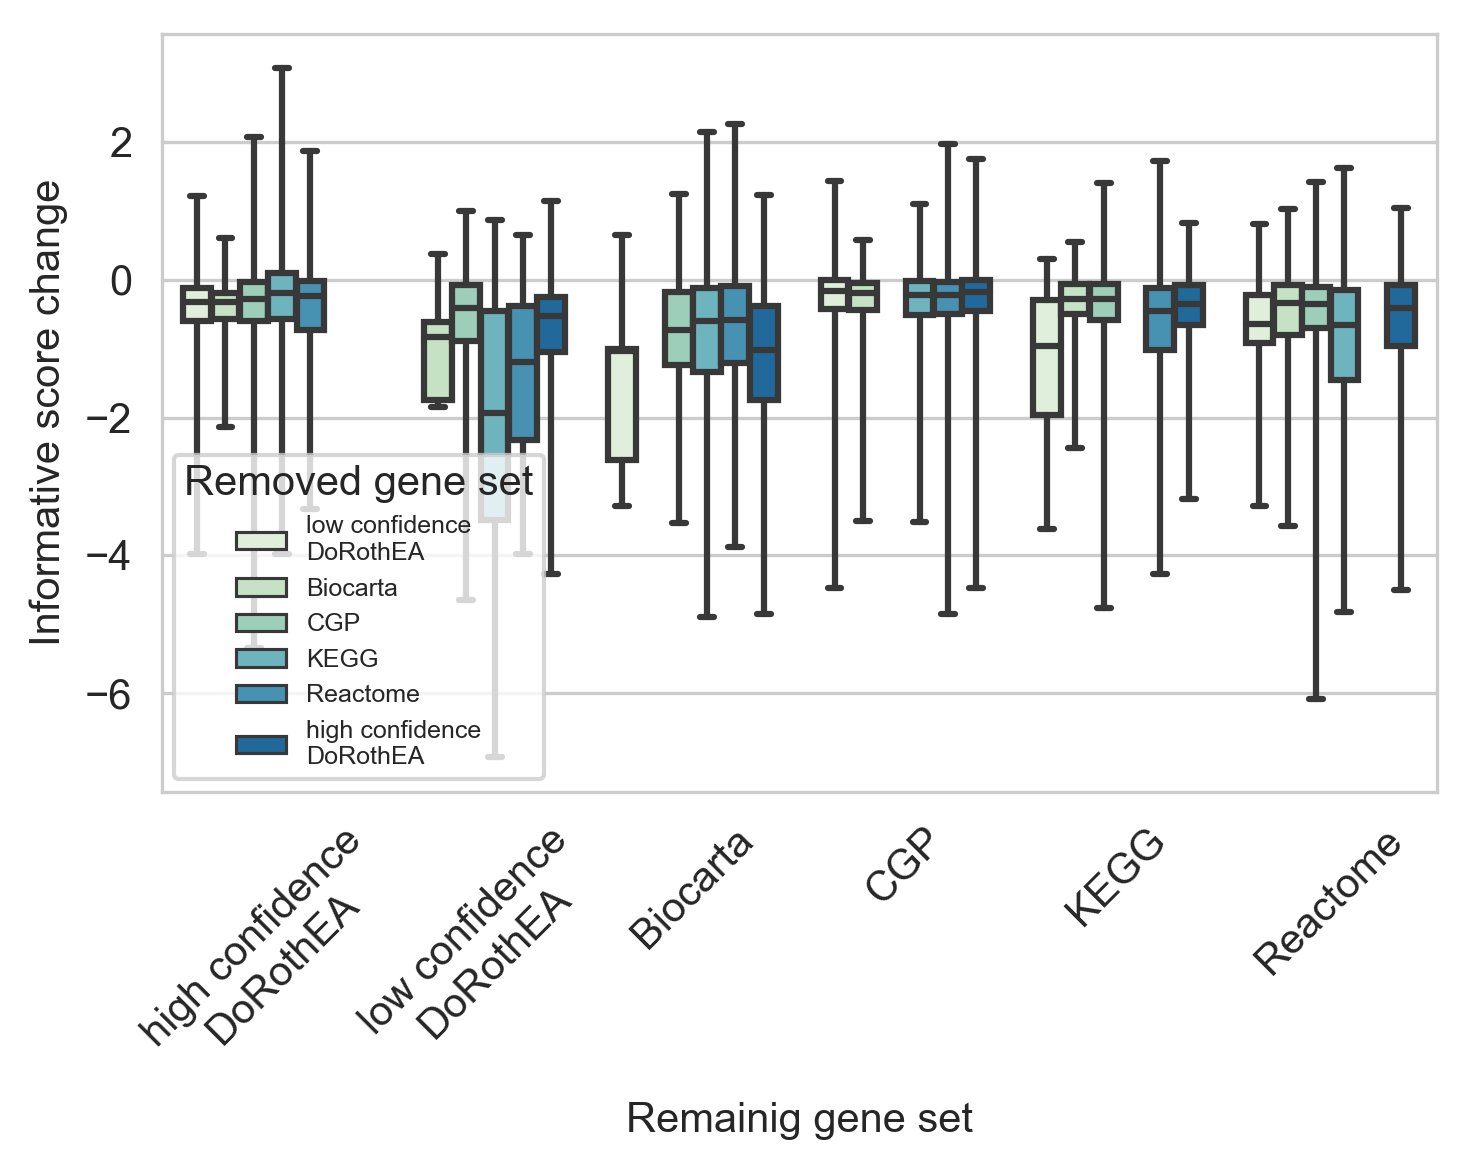

In [69]:
plt.figure(figsize=(5,4),dpi=300)
sns.set_palette('GnBu',6)
sns.boxplot(hue='Removed',y='Score',x='Remaining',data=results,whis=100)
plt.xticks(rotation=45)
plt.ylabel('Informative score change')
plt.xlabel('Remainig gene set')
plt.legend(loc=3,prop={'size': 6},title='Removed gene set')
plt.tight_layout()
plt.savefig('../figures/raw/Fig5C.pdf')

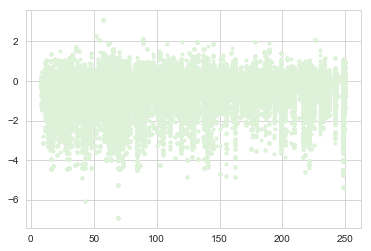

In [131]:
plt.plot(results['Size_removed'],results['Score'],'.')

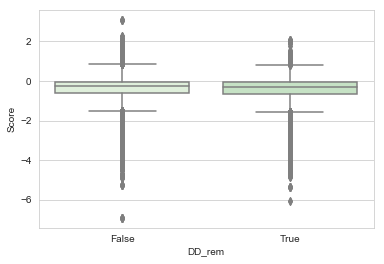

In [140]:
sns.boxplot(y=results['Score'],x=results['DD_rem'])

In [193]:
fil=results['DD_rem']

In [194]:
np.mean(results['Score'][~fil])

-0.4300880146455889

In [195]:
np.mean(results['Score'][fil])

-0.4556010585704714